## Setup


In [1]:
# Modules
import numpy as np
import matplotlib.pyplot as plt
import colorcet as cc
import pandas as pd
import datetime

import sys
sys.path.append('/home/amunozj/git_repos/butterfly_diagram_data')

from bfly_400_data.utils.utils import calculate_observed_fraction

figDPI = 100

# Color definitions
ClrS = (0.74, 0.00, 0.00)
ClrN = (0.20, 0.56, 1.00)

# Colormap for Bfly coverage
colors = [(0.65, 0.5, 0.35), (0.60, 0.60, 0.4), (0.42, 0.5, 0.56), (0.5, 0.5, 0.5)]
color0 = (0.61, 0.38, 0.38)

Clr = [
    (0.00, 0.00, 0.00),
    (0.31, 0.24, 0.00),
    (0.43, 0.16, 0.49),
    (0.32, 0.70, 0.30),
    (0.45, 0.70, 0.90),
    (1.00, 0.82, 0.67),
]

colorsMsk = [(0.65, 0.5, 0.35), (0.60, 0.60, 0.4), (0.42, 0.5, 0.56), (0.5, 0.5, 0.5)]

# Area limit for modern data
ALim = 10

# Marker Size
MZ = 10

# Font size
FZ = 30

# Font Size

font = {"family": "sans-serif", "weight": "normal", "size": 30}

plt.rc("font", **font)


In [2]:
DATA_FOLDER = "/home/amunozj/git_repos/butterfly_diagram_data/data/"
OUTPUT_FOLDER = "/home/amunozj/git_repos/butterfly_diagram_data/data/output_data/"
FIGURE_FOLDER = "/home/amunozj/git_repos/butterfly_diagram_data/figures/"

# Reading group numbers

In [3]:
GN = {}

# --------------------------------------------------------------------------------------------
# Svalgaard

GN["Svalgaard"] = pd.read_table(
    DATA_FOLDER + "input_data/GNbb2_y.txt",
    delimiter=r"\s+",
    engine="python"
)
GN["Svalgaard"]

,Year,GN,GNE
0,1610.5,2.64,0.92
1,1611.5,5.28,1.85
2,1612.5,10.56,3.70
3,1613.5,7.92,2.77
4,1614.5,7.04,2.46
...,...,...,...
401,2011.5,4.80,0.18
402,2012.5,5.09,0.19
403,2013.5,5.78,0.22
404,2014.5,6.63,0.25


In [4]:
GN["Usoskin"] = pd.read_table(
    DATA_FOLDER + "input_data/GNiu_y2.txt",
    delimiter=r"\s+",
    engine="python"
)
GN["Usoskin"]

,Year,GN,GNE,NOBS,OFS
0,1749.5,7.017,0.797,55,-0.062
1,1750.5,6.043,0.878,30,-0.049
2,1751.5,4.500,1.558,7,0.142
3,1752.5,2.970,0.453,48,0.039
4,1753.5,3.227,0.823,9,-0.006
...,...,...,...,...,...
242,1991.5,12.085,0.058,365,0.000
243,1992.5,7.939,0.043,366,0.000
244,1993.5,4.452,0.023,365,0.000
245,1994.5,2.952,0.023,365,0.000


### Define funcions for bad lines


In [5]:
def bad_line_printer(x):
    print(x)
    return x

def bad_line_ignore(x):
    return x

### Add Historical observations


In [6]:
Columns_to_keep = [
        "LocalDate",
        "UTCDate",
        "DateUncertainty",
        "FractionalYear",
        "Site",
        "GeoLatDeg",
        "GeoLatMin",
        "GeoLonDeg",
        "GeoLonMin",
        "Ordinal",
        "Year",
        "Month",
        "Day",
        "Hour",
        "Minute",
        "Lat",
        "LatError",
        "CarringtonLon",
        "LonFromDiskCenter",
        "LonError",
        "DegreesFromDiskCenter",
        "PlacementUncertainty",
        "OrientationUncertainty",        
        "RawGroupArea",
        "RawSpotArea",
        "RawSpotAreaUmbral",
        "SpotID",
        "GroupID",
        "Source",
        "Cycle",
        "CycleName",
        "Origin",
        "Reference"
    ]

In [7]:
Bfly = {}

Bfly["Harriot"] = {}

Method1 = pd.read_table(
    DATA_FOLDER + "input_data/1610_1613_Harriot_11207_2020_1604_MOESM2_ESM.txt",
    delimiter=r"\t+",
    skiprows=32,
    engine="python",
    encoding="unicode_escape",
    on_bad_lines=bad_line_printer,
)

Bfly["Harriot"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1610_1613_Harriot_11207_2020_1604_MOESM3_ESM.txt",
    delimiter=r"\t+",
    skiprows=30,
    engine="python",
    encoding="unicode_escape",
    on_bad_lines=bad_line_printer,
)

# Overwrite timestamps from method 2 and use method 1's instead
Bfly["Harriot"]["DF"]["YYYY"] = Method1["YYYY"]
Bfly["Harriot"]["DF"]["MM"] = Method1["MM"]
Bfly["Harriot"]["DF"]["DD"] = Method1["DD"]
Bfly["Harriot"]["DF"]["HH"] = Method1["HH"]
Bfly["Harriot"]["DF"]["MI"] = Method1["MI"]

# Clean entries without latitude
Bfly["Harriot"]["DF"] = Bfly["Harriot"]["DF"].loc[np.isfinite(Bfly["Harriot"]["DF"]["LLL.LL"]), :]


Bfly["Harriot"]["DF"]["Ordinal"] = Bfly["Harriot"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Harriot"]["DF"]["FractionalYear"] = Bfly["Harriot"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(x["YYYY"], x["MM"], x["DD"]).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["YYYY"] + 1, 1, 1).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    ),
    axis=1,
)

# Temporary variables to create date timestamps
Bfly["Harriot"]["DF"]["tmpHH"] = Bfly["Harriot"]["DF"]["HH"]
Bfly["Harriot"]["DF"].loc[np.isnan(Bfly["Harriot"]["DF"]["HH"]), "tmpHH"] = 12

Bfly["Harriot"]["DF"]["tmpMI"] = Bfly["Harriot"]["DF"]["MI"]
Bfly["Harriot"]["DF"].loc[np.isnan(Bfly["Harriot"]["DF"]["MI"]), "tmpMI"] = 00

Bfly["Harriot"]["DF"]["UTCDate"] = Bfly["Harriot"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["tmpHH"]), int(x["tmpMI"]), 0
    ),
    axis=1,
)

Bfly["Harriot"]["DF"]["LocalDate"] = ''
Bfly["Harriot"]["DF"]["DateUncertainty"] = 1
Bfly["Harriot"]["DF"]["Site"] = Bfly["Harriot"]["DF"]["Place"]
Bfly["Harriot"]["DF"]["GeoLatDeg"] = 51
Bfly["Harriot"]["DF"]["GeoLatMin"] = 29
Bfly["Harriot"]["DF"]["GeoLonDeg"] = 0
Bfly["Harriot"]["DF"]["GeoLonMin"] = -19
Bfly["Harriot"]["DF"]["Year"] = Bfly["Harriot"]["DF"]["YYYY"]
Bfly["Harriot"]["DF"]["Month"] = Bfly["Harriot"]["DF"]["MM"]
Bfly["Harriot"]["DF"]["Day"] = Bfly["Harriot"]["DF"]["DD"]  
Bfly["Harriot"]["DF"]["Hour"] = Bfly["Harriot"]["DF"]["HH"].astype(int)
Bfly["Harriot"]["DF"]["Minute"] = Bfly["Harriot"]["DF"]["MI"].astype(int)
Bfly["Harriot"]["DF"]["Lat"] = Bfly["Harriot"]["DF"]["BBB.BB"]
Bfly["Harriot"]["DF"]["LatError"] = np.nan
Bfly["Harriot"]["DF"]["CarringtonLon"] = Bfly["Harriot"]["DF"]["LLL.LL"]
Bfly["Harriot"]["DF"]["LonFromDiskCenter"] = Bfly["Harriot"]["DF"]["LLL.LL"]-Bfly["Harriot"]["DF"]["L0"]
Bfly["Harriot"]["DF"]["LonError"] = np.nan
Bfly["Harriot"]["DF"]["DegreesFromDiskCenter"] = Bfly["Harriot"]["DF"]["alpha"]
Bfly["Harriot"]["DF"]["PlacementUncertainty"] = 2
Bfly["Harriot"]["DF"]["OrientationUncertainty"] = 2
Bfly["Harriot"]["DF"]["RawGroupArea"] = np.nan
Bfly["Harriot"]["DF"]["RawSpotArea"] = Bfly["Harriot"]["DF"]["Area"]
Bfly["Harriot"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Harriot"]["DF"]["SpotID"] = Bfly["Harriot"]["DF"]["Sp"].astype(int)
Bfly["Harriot"]["DF"]["GroupID"] = Bfly["Harriot"]["DF"]["G"].astype(int)
Bfly["Harriot"]["DF"]["Source"] = "Harriot"
Bfly["Harriot"]["DF"]["Cycle"] = np.nan
Bfly["Harriot"]["DF"]["CycleName"] = ''
Bfly["Harriot"]["DF"]["Origin"] = 'Vokhmyanin2020'
Bfly["Harriot"]["DF"]["Reference"] = "https://doi.org/10.1007/s11207-020-01604-4"

# TODO: verified
Bfly["Harriot"]["DF"] = Bfly["Harriot"]["DF"].loc[:,Columns_to_keep]
Bfly["Harriot"]["DF"]

['NaN', 'Syon', '1611', '1', '29', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Harriot observed, but did not saw spots']
['NaN', 'Syon', '1611', '12', '14', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', '9.5', 'NaN', 'Harriot saw sunspots, but weather conditions are not allowed to make a drawing']
['6', 'Syon', '1611', '12', '21', '10', '0', '11', '17', '1.52', '75.53', '-2.35', '40.67', '7.18', '25.3', '-18.12', '10.71', '152.74', '1243', '35.07', '9.5', '10', 'Harriot noted: Â«I thought that sometimes I saw the two which were seen on mondy nere the midle but obscurly & for no time therefore could not note there position.Â»']
['repeat of 45', 'London', '1612', '2', '22', '7', '32', '41', '77', '15.75', '325.74', '-7.19', '292.42', '-20.27', '15.71', '-35.97', '3.79', '111.92', '693', '40.19', '7.5', '7.75', 'There are two drawings of February 22 1612']

/tmp/ipykernel_1152165/1165351765.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  Method1 = pd.read_table(


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,,1610-12-18 09:15:00,1,1610.961644,Syon,51,29,0,-19,588027,...,NaN,1126.0,NaN,1,1,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
1,,1610-12-18 09:15:00,1,1610.961644,Syon,51,29,0,-19,588027,...,NaN,1098.0,NaN,2,2,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
2,,1610-12-18 09:15:00,1,1610.961644,Syon,51,29,0,-19,588027,...,NaN,826.0,NaN,3,3,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
4,,1611-12-11 09:59:00,1,1611.942466,Syon,51,29,0,-19,588385,...,NaN,793.0,NaN,4,4,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
5,,1611-12-11 09:59:00,1,1611.942466,Syon,51,29,0,-19,588385,...,NaN,718.0,NaN,5,5,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,,1613-01-28 09:18:00,1,1613.073973,Syon,51,29,0,-19,588799,...,NaN,54.0,NaN,750,289,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
1805,,1613-01-28 09:18:00,1,1613.073973,Syon,51,29,0,-19,588799,...,NaN,75.0,NaN,751,289,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
1806,,1613-01-28 09:18:00,1,1613.073973,Syon,51,29,0,-19,588799,...,NaN,117.0,NaN,747,291,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
1807,,1613-01-28 09:18:00,1,1613.073973,Syon,51,29,0,-19,588799,...,NaN,102.0,NaN,752,292,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4


In [8]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Scheiner
Bfly["Scheiner"] = {}
Bfly["Scheiner"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1611_1631_scheiner_v1.1_20160707.txt",
    delimiter=r"\s+",
    engine="python",
    on_bad_lines=bad_line_printer,
)

Bfly["Scheiner"]["DF"]["Ordinal"] = Bfly["Scheiner"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Scheiner"]["DF"]["FractionalYear"] = Bfly["Scheiner"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(x["YYYY"], x["MM"], x["DD"]).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["YYYY"] + 1, 1, 1).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Scheiner"]["DF"]["LocalDate"] = Bfly["Scheiner"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["HH"]), int(x["MI"]), 0
    ),
    axis=1,
)

Bfly["Scheiner"]["DF"]["UTCDate"] = ''
Bfly["Scheiner"]["DF"]["DateUncertainty"] = 1
Bfly["Scheiner"]["DF"].loc[:,"Site"] = "Ingolstadt"
Bfly["Scheiner"]["DF"]["GeoLatDeg"] = 48
Bfly["Scheiner"]["DF"]["GeoLatMin"] = 46
Bfly["Scheiner"]["DF"]["GeoLonDeg"] = 11
Bfly["Scheiner"]["DF"]["GeoLonMin"] = 25
Bfly["Scheiner"]["DF"]["Year"] = Bfly["Scheiner"]["DF"]["YYYY"]
Bfly["Scheiner"]["DF"]["Month"] = Bfly["Scheiner"]["DF"]["MM"]
Bfly["Scheiner"]["DF"]["Day"] = Bfly["Scheiner"]["DF"]["DD"]  
Bfly["Scheiner"]["DF"]["Hour"] = Bfly["Scheiner"]["DF"]["HH"].astype(int)
Bfly["Scheiner"]["DF"]["Minute"] = Bfly["Scheiner"]["DF"]["MI"].astype(int)
Bfly["Scheiner"]["DF"]["Lat"] = Bfly["Scheiner"]["DF"]["BBB.B"]
Bfly["Scheiner"]["DF"]["LatError"] = np.nan
Bfly["Scheiner"]["DF"]["CarringtonLon"] = Bfly["Scheiner"]["DF"]["LLL.L"]
Bfly["Scheiner"]["DF"]["LonFromDiskCenter"] = Bfly["Scheiner"]["DF"]["CMD"]
Bfly["Scheiner"]["DF"]["LonError"] = np.nan
Bfly["Scheiner"]["DF"]["DegreesFromDiskCenter"] = Bfly["Scheiner"]["DF"]["DELTA"]
Bfly["Scheiner"]["DF"]["PlacementUncertainty"] = 4.0
Bfly["Scheiner"]["DF"]["OrientationUncertainty"] = 4.5
Bfly["Scheiner"]["DF"]["RawGroupArea"] = np.nan
Bfly["Scheiner"]["DF"]["RawSpotArea"] = np.nan
Bfly["Scheiner"]["DF"]["RawSpotAreaUmbral"] = Bfly["Scheiner"]["DF"]["UMB"]
Bfly["Scheiner"]["DF"]["SpotID"] = np.nan
Bfly["Scheiner"]["DF"]["GroupID"] = Bfly["Scheiner"]["DF"]["GROUP"].astype(int)
Bfly["Scheiner"]["DF"]["Source"] = "Scheiner"
Bfly["Scheiner"]["DF"]["Cycle"] = np.nan
Bfly["Scheiner"]["DF"]["CycleName"] = ''
Bfly["Scheiner"]["DF"]["Origin"] = 'Arlt2016'
Bfly["Scheiner"]["DF"]["Reference"] = "https://doi.org/10.1051/0004-6361/201629000"

# TODO: Check site
# Early Scheiner
Bfly["Scheiner"]["DF"].loc[Bfly["Scheiner"]["DF"]["Year"]<1617,"PlacementUncertainty"] = 2.5
Bfly["Scheiner"]["DF"].loc[Bfly["Scheiner"]["DF"]["Year"]<1617,"OrientationUncertainty"] = 2.5

Bfly["Scheiner"]["DF"] = Bfly["Scheiner"]["DF"].loc[:,Columns_to_keep]
Bfly["Scheiner"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1611-10-21 09:30:00,,1,1611.802740,Ingolstadt,48,46,11,25,588334,...,NaN,NaN,67.0,NaN,281,Scheiner,NaN,,Arlt2016,https://doi.org/10.1051/0004-6361/201629000
1,1611-10-21 09:30:00,,1,1611.802740,Ingolstadt,48,46,11,25,588334,...,NaN,NaN,67.0,NaN,281,Scheiner,NaN,,Arlt2016,https://doi.org/10.1051/0004-6361/201629000
2,1611-10-21 09:30:00,,1,1611.802740,Ingolstadt,48,46,11,25,588334,...,NaN,NaN,14.0,NaN,281,Scheiner,NaN,,Arlt2016,https://doi.org/10.1051/0004-6361/201629000
3,1611-10-21 09:30:00,,1,1611.802740,Ingolstadt,48,46,11,25,588334,...,NaN,NaN,94.0,NaN,281,Scheiner,NaN,,Arlt2016,https://doi.org/10.1051/0004-6361/201629000
4,1611-10-21 09:30:00,,1,1611.802740,Ingolstadt,48,46,11,25,588334,...,NaN,NaN,6.0,NaN,282,Scheiner,NaN,,Arlt2016,https://doi.org/10.1051/0004-6361/201629000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,1631-06-20 09:53:00,,1,1631.465753,Ingolstadt,48,46,11,25,595516,...,NaN,NaN,134.0,NaN,673,Scheiner,NaN,,Arlt2016,https://doi.org/10.1051/0004-6361/201629000
8163,1631-06-21 07:15:00,,1,1631.468493,Ingolstadt,48,46,11,25,595517,...,NaN,NaN,4.0,NaN,673,Scheiner,NaN,,Arlt2016,https://doi.org/10.1051/0004-6361/201629000
8164,1631-06-21 07:15:00,,1,1631.468493,Ingolstadt,48,46,11,25,595517,...,NaN,NaN,4.0,NaN,673,Scheiner,NaN,,Arlt2016,https://doi.org/10.1051/0004-6361/201629000
8165,1631-06-21 07:15:00,,1,1631.468493,Ingolstadt,48,46,11,25,595517,...,NaN,NaN,88.0,NaN,673,Scheiner,NaN,,Arlt2016,https://doi.org/10.1051/0004-6361/201629000


In [9]:
Bfly["Cigioli"] = {}

Method1 = pd.read_table(
    DATA_FOLDER + "input_data/1612_cigioli_position_vokhmyanin_2021.txt",
    delimiter=r"\t+",
    skiprows=31,
    engine="python",
    encoding="unicode_escape",
    on_bad_lines=bad_line_printer,
)

Bfly["Cigioli"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1612_cigioli_position_vokhmyanin_2021_m2.txt",
    delimiter=r"\t+",
    skiprows=31,
    engine="python",
    on_bad_lines=bad_line_printer,
)


# Overwrite timestamps from method 2 and use method 1's instead
Bfly["Cigioli"]["DF"]["YYYY"] = Method1["YYYY"]
Bfly["Cigioli"]["DF"]["MM"] = Method1["MM"]
Bfly["Cigioli"]["DF"]["DD"] = Method1["DD"]
Bfly["Cigioli"]["DF"]["HH"] = Method1["HH"]
Bfly["Cigioli"]["DF"]["MI"] = Method1["MI"]

# Clean entries without latitude
Bfly["Cigioli"]["DF"] = Bfly["Cigioli"]["DF"].loc[np.isfinite(Bfly["Cigioli"]["DF"]["LLL.LL"]), :]


Bfly["Cigioli"]["DF"]["Ordinal"] = Bfly["Cigioli"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Cigioli"]["DF"]["FractionalYear"] = Bfly["Cigioli"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(x["YYYY"], x["MM"], x["DD"]).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["YYYY"] + 1, 1, 1).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    ),
    axis=1,
)

# Temporary variables to create date timestamps
Bfly["Cigioli"]["DF"]["tmpHH"] = Bfly["Cigioli"]["DF"]["HH"]
Bfly["Cigioli"]["DF"].loc[np.isnan(Bfly["Cigioli"]["DF"]["HH"]), "tmpHH"] = 12

Bfly["Cigioli"]["DF"]["tmpMI"] = Bfly["Cigioli"]["DF"]["MI"]
Bfly["Cigioli"]["DF"].loc[np.isnan(Bfly["Cigioli"]["DF"]["MI"]), "tmpMI"] = 00

Bfly["Cigioli"]["DF"]["UTCDate"] = Bfly["Cigioli"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["tmpHH"]), int(x["tmpMI"]), 0
    ),
    axis=1,
)

# TODO: Confirm Cigioli's quality

Bfly["Cigioli"]["DF"]["LocalDate"] = ''
Bfly["Cigioli"]["DF"]["DateUncertainty"] = 1
Bfly["Cigioli"]["DF"].loc[np.isnan(Bfly["Cigioli"]["DF"]["HH"]), "DateUncertainty"] = 6
Bfly["Cigioli"]["DF"]["Site"] = Bfly["Cigioli"]["DF"]["Place"]
Bfly["Cigioli"]["DF"]["GeoLatDeg"] = 41
Bfly["Cigioli"]["DF"]["GeoLatMin"] = 54
Bfly["Cigioli"]["DF"]["GeoLonDeg"] = 12
Bfly["Cigioli"]["DF"]["GeoLonMin"] = 29
Bfly["Cigioli"]["DF"]["Year"] = Bfly["Cigioli"]["DF"]["YYYY"]
Bfly["Cigioli"]["DF"]["Month"] = Bfly["Cigioli"]["DF"]["MM"]
Bfly["Cigioli"]["DF"]["Day"] = Bfly["Cigioli"]["DF"]["DD"]  
Bfly["Cigioli"]["DF"]["Hour"] = Bfly["Cigioli"]["DF"]["HH"].astype(int)
Bfly["Cigioli"]["DF"]["Minute"] = Bfly["Cigioli"]["DF"]["MI"].astype(int)
Bfly["Cigioli"]["DF"]["Lat"] = Bfly["Cigioli"]["DF"]["BBB.BB"]
Bfly["Cigioli"]["DF"]["LatError"] = np.nan
Bfly["Cigioli"]["DF"]["CarringtonLon"] = Bfly["Cigioli"]["DF"]["LLL.LL"]
Bfly["Cigioli"]["DF"]["LonFromDiskCenter"] = Bfly["Cigioli"]["DF"]["LLL.LL"]-Bfly["Cigioli"]["DF"]["L0"]
Bfly["Cigioli"]["DF"]["LonError"] = np.nan
Bfly["Cigioli"]["DF"]["DegreesFromDiskCenter"] = Bfly["Cigioli"]["DF"]["alpha"]
Bfly["Cigioli"]["DF"]["PlacementUncertainty"] = 2.5
Bfly["Cigioli"]["DF"]["OrientationUncertainty"] = 2.5
Bfly["Cigioli"]["DF"]["RawGroupArea"] = np.nan
Bfly["Cigioli"]["DF"]["RawSpotArea"] = Bfly["Cigioli"]["DF"]["Area_w"]
Bfly["Cigioli"]["DF"]["RawSpotAreaUmbral"] = Bfly["Cigioli"]["DF"]["Area_u"]
Bfly["Cigioli"]["DF"]["SpotID"] = Bfly["Cigioli"]["DF"]["Sp"].astype(int)
Bfly["Cigioli"]["DF"]["GroupID"] = Bfly["Cigioli"]["DF"]["G"].astype(int)
Bfly["Cigioli"]["DF"]["Source"] = "Cigioli"
Bfly["Cigioli"]["DF"]["Cycle"] = np.nan
Bfly["Cigioli"]["DF"]["CycleName"] = ''
Bfly["Cigioli"]["DF"]["Origin"] = 'Vokhmyanin2020'
Bfly["Cigioli"]["DF"]["Reference"] = "https://doi.org/10.1007/s11207-020-01604-4"

# TODO: verified
Bfly["Cigioli"]["DF"] = Bfly["Cigioli"]["DF"].loc[:,Columns_to_keep]
Bfly["Cigioli"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,,1612-02-18 12:10:00,1,1612.131148,Rome,41,54,12,29,588454,...,NaN,1598.0,NaN,1,1,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
1,,1612-02-20 15:05:00,1,1612.136612,Rome,41,54,12,29,588456,...,NaN,1340.0,NaN,1,1,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
2,,1612-02-20 15:05:00,1,1612.136612,Rome,41,54,12,29,588456,...,NaN,1085.0,NaN,2,2,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
3,,1612-02-22 10:54:00,1,1612.142077,Rome,41,54,12,29,588458,...,NaN,1140.0,NaN,1,1,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
4,,1612-02-22 10:54:00,1,1612.142077,Rome,41,54,12,29,588458,...,NaN,1071.0,NaN,2,2,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,,1612-08-25 09:01:00,1,1612.647541,Rome,41,54,12,29,588643,...,NaN,13.0,NaN,219,41,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
396,,1612-08-25 09:01:00,1,1612.647541,Rome,41,54,12,29,588643,...,NaN,87.0,NaN,220,41,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
397,,1612-08-25 09:01:00,1,1612.647541,Rome,41,54,12,29,588643,...,NaN,63.0,NaN,221,41,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
398,,1612-08-25 09:01:00,1,1612.647541,Rome,41,54,12,29,588643,...,NaN,160.0,NaN,181,42,Cigioli,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4


In [10]:
Bfly["Cologna"] = {}

Method1 = pd.read_table(
    DATA_FOLDER + "input_data/1612_Cologna_position_vokhmyanin_2021.txt",
    delimiter=r"\t+",
    skiprows=31,
    engine="python",
    encoding="unicode_escape",
    on_bad_lines=bad_line_printer,
)

Bfly["Cologna"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1612_Cologna_position_vokhmyanin_2021_m2.txt",
    delimiter=r"\t+",
    skiprows=29,
    engine="python",
    on_bad_lines=bad_line_printer,
)


# Overwrite timestamps from method 2 and use method 1's instead
Bfly["Cologna"]["DF"]["YYYY"] = Method1["YYYY"]
Bfly["Cologna"]["DF"]["MM"] = Method1["MM"]
Bfly["Cologna"]["DF"]["DD"] = Method1["DD"]
Bfly["Cologna"]["DF"]["HH"] = Method1["HH"]
Bfly["Cologna"]["DF"]["MI"] = Method1["MI"]

# Clean entries without latitude
Bfly["Cologna"]["DF"] = Bfly["Cologna"]["DF"].loc[np.isfinite(Bfly["Cologna"]["DF"]["LLL.LL"]), :]


Bfly["Cologna"]["DF"]["Ordinal"] = Bfly["Cologna"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Cologna"]["DF"]["FractionalYear"] = Bfly["Cologna"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(x["YYYY"], x["MM"], x["DD"]).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["YYYY"] + 1, 1, 1).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    ),
    axis=1,
)

# Temporary variables to create date timestamps
Bfly["Cologna"]["DF"]["tmpHH"] = Bfly["Cologna"]["DF"]["HH"]
Bfly["Cologna"]["DF"].loc[np.isnan(Bfly["Cologna"]["DF"]["HH"]), "tmpHH"] = 12

Bfly["Cologna"]["DF"]["tmpMI"] = Bfly["Cologna"]["DF"]["MI"]
Bfly["Cologna"]["DF"].loc[np.isnan(Bfly["Cologna"]["DF"]["MI"]), "tmpMI"] = 00

Bfly["Cologna"]["DF"]["UTCDate"] = Bfly["Cologna"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["tmpHH"]), int(x["tmpMI"]), 0
    ),
    axis=1,
)

Bfly["Cologna"]["DF"]["LocalDate"] = ''
Bfly["Cologna"]["DF"]["DateUncertainty"] = 1
Bfly["Cologna"]["DF"].loc[np.isnan(Bfly["Cologna"]["DF"]["HH"]), "DateUncertainty"] = 6
Bfly["Cologna"]["DF"]["Site"] = Bfly["Cologna"]["DF"]["Place"]
Bfly["Cologna"]["DF"]["GeoLatDeg"] = 38
Bfly["Cologna"]["DF"]["GeoLatMin"] = 5
Bfly["Cologna"]["DF"]["GeoLonDeg"] = 13
Bfly["Cologna"]["DF"]["GeoLonMin"] = 17
Bfly["Cologna"]["DF"]["Year"] = Bfly["Cologna"]["DF"]["YYYY"]
Bfly["Cologna"]["DF"]["Month"] = Bfly["Cologna"]["DF"]["MM"]
Bfly["Cologna"]["DF"]["Day"] = Bfly["Cologna"]["DF"]["DD"]  
Bfly["Cologna"]["DF"]["Hour"] = Bfly["Cologna"]["DF"]["HH"].astype(int)
Bfly["Cologna"]["DF"]["Minute"] = Bfly["Cologna"]["DF"]["MI"].astype(int)
Bfly["Cologna"]["DF"]["Lat"] = Bfly["Cologna"]["DF"]["BBB.BB"]
Bfly["Cologna"]["DF"]["LatError"] = np.nan
Bfly["Cologna"]["DF"]["CarringtonLon"] = Bfly["Cologna"]["DF"]["LLL.LL"]
Bfly["Cologna"]["DF"]["LonFromDiskCenter"] = Bfly["Cologna"]["DF"]["LLL.LL"]-Bfly["Cologna"]["DF"]["L0"]
Bfly["Cologna"]["DF"]["LonError"] = np.nan
Bfly["Cologna"]["DF"]["DegreesFromDiskCenter"] = Bfly["Cologna"]["DF"]["alpha"]
Bfly["Cologna"]["DF"]["PlacementUncertainty"] = 2.5
Bfly["Cologna"]["DF"]["OrientationUncertainty"] = 2.5
Bfly["Cologna"]["DF"]["RawGroupArea"] = np.nan
Bfly["Cologna"]["DF"]["RawSpotArea"] = Bfly["Cologna"]["DF"]["Area"]
Bfly["Cologna"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Cologna"]["DF"]["SpotID"] = Bfly["Cologna"]["DF"]["Sp"].astype(int)
Bfly["Cologna"]["DF"]["GroupID"] = Bfly["Cologna"]["DF"]["G"].astype(int)
Bfly["Cologna"]["DF"]["Source"] = "Cologna"
Bfly["Cologna"]["DF"]["Cycle"] = np.nan
Bfly["Cologna"]["DF"]["CycleName"] = ''
Bfly["Cologna"]["DF"]["Origin"] = 'Vokhmyanin2020'
Bfly["Cologna"]["DF"]["Reference"] = "https://doi.org/10.1007/s11207-020-01604-4"

# TODO: verified
Bfly["Cologna"]["DF"] = Bfly["Cologna"]["DF"].loc[:,Columns_to_keep]
Bfly["Cologna"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,,1612-09-06 09:56:00,1,1612.680328,Monreale,38,5,13,17,588655,...,NaN,667,NaN,1,1,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
1,,1612-09-06 09:56:00,1,1612.680328,Monreale,38,5,13,17,588655,...,NaN,417,NaN,2,2,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
2,,1612-09-06 09:56:00,1,1612.680328,Monreale,38,5,13,17,588655,...,NaN,1078,NaN,3,3,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
3,,1612-09-06 09:56:00,1,1612.680328,Monreale,38,5,13,17,588655,...,NaN,416,NaN,4,3,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
4,,1612-09-06 09:56:00,1,1612.680328,Monreale,38,5,13,17,588655,...,NaN,536,NaN,5,4,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,,1612-10-09 09:05:00,1,1612.770492,Monreale,38,5,13,17,588688,...,NaN,382,NaN,64,28,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
168,,1612-10-09 09:05:00,1,1612.770492,Monreale,38,5,13,17,588688,...,NaN,213,NaN,66,28,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
169,,1612-10-09 09:05:00,1,1612.770492,Monreale,38,5,13,17,588688,...,NaN,163,NaN,67,28,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
170,,1612-10-09 09:05:00,1,1612.770492,Monreale,38,5,13,17,588688,...,NaN,246,NaN,65,29,Cologna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4


In [11]:
Bfly["Colonna"] = {}

Method1 = pd.read_table(
    DATA_FOLDER + "input_data/1612_Colonna_position_vokhmyanin_2021.txt",
    delimiter=r"\t+",
    skiprows=27,
    engine="python",
    on_bad_lines=bad_line_printer,
)

Bfly["Colonna"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1612_Colonna_position_vokhmyanin_2021_m2.txt",
    delimiter=r"\t+",
    skiprows=27,
    engine="python",
    on_bad_lines=bad_line_printer,
)


# Overwrite timestamps from method 2 and use method 1's instead
Bfly["Colonna"]["DF"]["YYYY"] = Method1["YYYY"]
Bfly["Colonna"]["DF"]["MM"] = Method1["MM"]
Bfly["Colonna"]["DF"]["DD"] = Method1["DD"]
Bfly["Colonna"]["DF"]["HH"] = Method1["HH"]
Bfly["Colonna"]["DF"]["MI"] = Method1["MI"]

# Clean entries without latitude
Bfly["Colonna"]["DF"] = Bfly["Colonna"]["DF"].loc[np.isfinite(Bfly["Colonna"]["DF"]["LLL.LL"]), :]


Bfly["Colonna"]["DF"]["Ordinal"] = Bfly["Colonna"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Colonna"]["DF"]["FractionalYear"] = Bfly["Colonna"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(x["YYYY"], x["MM"], x["DD"]).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["YYYY"] + 1, 1, 1).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    ),
    axis=1,
)

# Temporary variables to create date timestamps
Bfly["Colonna"]["DF"]["tmpHH"] = Bfly["Colonna"]["DF"]["HH"]
Bfly["Colonna"]["DF"].loc[np.isnan(Bfly["Colonna"]["DF"]["HH"]), "tmpHH"] = 12

Bfly["Colonna"]["DF"]["tmpMI"] = Bfly["Colonna"]["DF"]["MI"]
Bfly["Colonna"]["DF"].loc[np.isnan(Bfly["Colonna"]["DF"]["MI"]), "tmpMI"] = 00

Bfly["Colonna"]["DF"]["UTCDate"] = Bfly["Colonna"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["tmpHH"]), int(x["tmpMI"]), 0
    ),
    axis=1,
)

Bfly["Colonna"]["DF"]["LocalDate"] = ''
Bfly["Colonna"]["DF"]["DateUncertainty"] = 1
Bfly["Colonna"]["DF"].loc[np.isnan(Bfly["Colonna"]["DF"]["HH"]), "DateUncertainty"] = 6
Bfly["Colonna"]["DF"]["Site"] = Bfly["Colonna"]["DF"]["Place"]
Bfly["Colonna"]["DF"]["GeoLatDeg"] = 40
Bfly["Colonna"]["DF"]["GeoLatMin"] = 51
Bfly["Colonna"]["DF"]["GeoLonDeg"] = 14
Bfly["Colonna"]["DF"]["GeoLonMin"] = 15
Bfly["Colonna"]["DF"]["Year"] = Bfly["Colonna"]["DF"]["YYYY"]
Bfly["Colonna"]["DF"]["Month"] = Bfly["Colonna"]["DF"]["MM"]
Bfly["Colonna"]["DF"]["Day"] = Bfly["Colonna"]["DF"]["DD"]  
Bfly["Colonna"]["DF"]["Hour"] = Bfly["Colonna"]["DF"]["HH"].astype(int)
Bfly["Colonna"]["DF"]["Minute"] = Bfly["Colonna"]["DF"]["MI"].astype(int)
Bfly["Colonna"]["DF"]["Lat"] = Bfly["Colonna"]["DF"]["BBB.BB"]
Bfly["Colonna"]["DF"]["LatError"] = np.nan
Bfly["Colonna"]["DF"]["CarringtonLon"] = Bfly["Colonna"]["DF"]["LLL.LL"]
Bfly["Colonna"]["DF"]["LonFromDiskCenter"] = Bfly["Colonna"]["DF"]["LLL.LL"]-Bfly["Colonna"]["DF"]["L0"]
Bfly["Colonna"]["DF"]["LonError"] = np.nan
Bfly["Colonna"]["DF"]["DegreesFromDiskCenter"] = Bfly["Colonna"]["DF"]["alpha"]
Bfly["Colonna"]["DF"]["PlacementUncertainty"] = 2.5
Bfly["Colonna"]["DF"]["OrientationUncertainty"] = 2.5
Bfly["Colonna"]["DF"]["RawGroupArea"] = np.nan
Bfly["Colonna"]["DF"]["RawSpotArea"] = Bfly["Colonna"]["DF"]["Area"]
Bfly["Colonna"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Colonna"]["DF"]["SpotID"] = Bfly["Colonna"]["DF"]["Sp"].astype(int)
Bfly["Colonna"]["DF"]["GroupID"] = Bfly["Colonna"]["DF"]["G"].astype(int)
Bfly["Colonna"]["DF"]["Source"] = "Colonna"
Bfly["Colonna"]["DF"]["Cycle"] = np.nan
Bfly["Colonna"]["DF"]["CycleName"] = ''
Bfly["Colonna"]["DF"]["Origin"] = 'Vokhmyanin2020'
Bfly["Colonna"]["DF"]["Reference"] = "https://doi.org/10.1007/s11207-020-01604-4"

Bfly["Scheiner_vt"] = Bfly["Colonna"].copy()
Bfly["Scheiner_vt"]["DF"] = Bfly["Scheiner_vt"]["DF"].loc[
    Bfly["Scheiner_vt"]["DF"]["Site"] == "Ingolstadt ", :
]
Bfly["Scheiner_vt"]["DF"].loc[:,"Source"] = "Scheiner"
Bfly["Scheiner_vt"]["DF"].loc[:,"Site"] = "Ingolstadt"

Bfly["Scheiner_vt"]["DF"].loc[:,"GeoLatDeg"] = 48
Bfly["Scheiner_vt"]["DF"].loc[:,"GeoLatMin"] = 46
Bfly["Scheiner_vt"]["DF"].loc[:,"GeoLonDeg"] = 11
Bfly["Scheiner_vt"]["DF"].loc[:,"GeoLonMin"] = 25

# TODO: verified
Bfly["Colonna"]["DF"] = Bfly["Colonna"]["DF"].loc[Bfly["Colonna"]["DF"]["Site"] != "Ingolstadt ", :]

Bfly["Colonna"]["DF"] = Bfly["Colonna"]["DF"].loc[:,Columns_to_keep]
Bfly["Scheiner_vt"]["DF"] = Bfly["Scheiner_vt"]["DF"].loc[:,Columns_to_keep]
Bfly["Colonna"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
15,,1613-08-01 14:44:00,1,1613.580822,Naples,40,51,14,15,588984,...,NaN,132,NaN,3,2,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
16,,1613-08-01 14:44:00,1,1613.580822,Naples,40,51,14,15,588984,...,NaN,97,NaN,4,2,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
17,,1613-08-01 14:44:00,1,1613.580822,Naples,40,51,14,15,588984,...,NaN,204,NaN,5,2,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
18,,1613-08-01 14:44:00,1,1613.580822,Naples,40,51,14,15,588984,...,NaN,139,NaN,8,4,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
19,,1613-08-01 14:44:00,1,1613.580822,Naples,40,51,14,15,588984,...,NaN,283,NaN,10,5,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,,1614-10-03 12:41:00,1,1614.753425,Naples,40,51,14,15,589412,...,NaN,210,NaN,289,54,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
715,,1614-10-03 12:41:00,1,1614.753425,Naples,40,51,14,15,589412,...,NaN,202,NaN,290,55,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
716,,1614-10-03 12:41:00,1,1614.753425,Naples,40,51,14,15,589412,...,NaN,174,NaN,291,55,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
717,,1614-10-03 12:41:00,1,1614.753425,Naples,40,51,14,15,589412,...,NaN,518,NaN,292,56,Colonna,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4


In [12]:
Bfly["Galilei"] = {}

Method1 = pd.read_table(
    DATA_FOLDER + "input_data/1612_Galilei_position_vokhmyanin_2021.txt",
    delimiter=r"\t+",
    skiprows=34,
    engine="python",
    on_bad_lines=bad_line_printer,
)

Bfly["Galilei"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1612_Galilei_position_vokhmyanin_2021_m2.txt",
    delimiter=r"\t+",
    skiprows=32,
    engine="python",
    on_bad_lines=bad_line_printer,
)


# Overwrite timestamps from method 2 and use method 1's instead
Bfly["Galilei"]["DF"]["YYYY"] = Method1["YYYY"]
Bfly["Galilei"]["DF"]["MM"] = Method1["MM"]
Bfly["Galilei"]["DF"]["DD"] = Method1["DD"]
Bfly["Galilei"]["DF"]["HH"] = Method1["HH"]
Bfly["Galilei"]["DF"]["MI"] = Method1["MI"]

# Clean entries without latitude
Bfly["Galilei"]["DF"] = Bfly["Galilei"]["DF"].loc[np.isfinite(Bfly["Galilei"]["DF"]["LLL.LL"]), :]


Bfly["Galilei"]["DF"]["Ordinal"] = Bfly["Galilei"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Galilei"]["DF"]["FractionalYear"] = Bfly["Galilei"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(x["YYYY"], x["MM"], x["DD"]).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["YYYY"] + 1, 1, 1).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    ),
    axis=1,
)

# Temporary variables to create date timestamps
Bfly["Galilei"]["DF"]["tmpHH"] = Bfly["Galilei"]["DF"]["HH"]
Bfly["Galilei"]["DF"].loc[np.isnan(Bfly["Galilei"]["DF"]["HH"]), "tmpHH"] = 12

Bfly["Galilei"]["DF"]["tmpMI"] = Bfly["Galilei"]["DF"]["MI"]
Bfly["Galilei"]["DF"].loc[np.isnan(Bfly["Galilei"]["DF"]["MI"]), "tmpMI"] = 00

Bfly["Galilei"]["DF"]["UTCDate"] = Bfly["Galilei"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["tmpHH"]), int(x["tmpMI"]), 0
    ),
    axis=1,
)

# TODO: Confirm Galilei's period of projected vs. eyepiece

Bfly["Galilei"]["DF"]["LocalDate"] = ''
Bfly["Galilei"]["DF"]["DateUncertainty"] = 1
Bfly["Galilei"]["DF"].loc[np.isnan(Bfly["Galilei"]["DF"]["HH"]), "DateUncertainty"] = 6
Bfly["Galilei"]["DF"]["Site"] = Bfly["Galilei"]["DF"]["Place"]
Bfly["Galilei"]["DF"]["GeoLatDeg"] = 43
Bfly["Galilei"]["DF"]["GeoLatMin"] = 46
Bfly["Galilei"]["DF"]["GeoLonDeg"] = 11
Bfly["Galilei"]["DF"]["GeoLonMin"] = 5
Bfly["Galilei"]["DF"]["Year"] = Bfly["Galilei"]["DF"]["YYYY"]
Bfly["Galilei"]["DF"]["Month"] = Bfly["Galilei"]["DF"]["MM"]
Bfly["Galilei"]["DF"]["Day"] = Bfly["Galilei"]["DF"]["DD"]  
Bfly["Galilei"]["DF"]["Hour"] = Bfly["Galilei"]["DF"]["HH"].astype(int)
Bfly["Galilei"]["DF"]["Minute"] = Bfly["Galilei"]["DF"]["MI"].astype(int)
Bfly["Galilei"]["DF"]["Lat"] = Bfly["Galilei"]["DF"]["BBB.BB"]
Bfly["Galilei"]["DF"]["LatError"] = np.nan
Bfly["Galilei"]["DF"]["CarringtonLon"] = Bfly["Galilei"]["DF"]["LLL.LL"]
Bfly["Galilei"]["DF"]["LonFromDiskCenter"] = Bfly["Galilei"]["DF"]["LLL.LL"]-Bfly["Galilei"]["DF"]["L0"]
Bfly["Galilei"]["DF"]["LonError"] = np.nan
Bfly["Galilei"]["DF"]["DegreesFromDiskCenter"] = Bfly["Galilei"]["DF"]["alpha"]
Bfly["Galilei"]["DF"]["PlacementUncertainty"] = 3.5
Bfly["Galilei"]["DF"]["OrientationUncertainty"] = 3.5
Bfly["Galilei"]["DF"]["RawGroupArea"] = np.nan
Bfly["Galilei"]["DF"]["RawSpotArea"] = Bfly["Galilei"]["DF"]["Area_w"]
Bfly["Galilei"]["DF"]["RawSpotAreaUmbral"] = Bfly["Galilei"]["DF"]["Area_u"]
Bfly["Galilei"]["DF"]["SpotID"] = Bfly["Galilei"]["DF"]["Sp"].astype(int)
Bfly["Galilei"]["DF"]["GroupID"] = Bfly["Galilei"]["DF"]["G"].astype(int)
Bfly["Galilei"]["DF"]["Source"] = "Galilei"
Bfly["Galilei"]["DF"]["Cycle"] = np.nan
Bfly["Galilei"]["DF"]["CycleName"] = ''
Bfly["Galilei"]["DF"]["Origin"] = 'Vokhmyanin2018'
Bfly["Galilei"]["DF"]["Reference"] = "https://doi.org/10.1007/s11207-018-1245-1"

# TODO: verified
Bfly["Galilei"]["DF"] = Bfly["Galilei"]["DF"].loc[:,Columns_to_keep]
Bfly["Galilei"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,,1612-02-12 16:06:00,1,1612.114754,Villa delle Selve,43,46,11,5,588448,...,NaN,593.0,NaN,1,1,Galilei,NaN,,Vokhmyanin2018,https://doi.org/10.1007/s11207-018-1245-1
1,,1612-02-12 16:06:00,1,1612.114754,Villa delle Selve,43,46,11,5,588448,...,NaN,444.0,NaN,2,2,Galilei,NaN,,Vokhmyanin2018,https://doi.org/10.1007/s11207-018-1245-1
2,,1612-02-12 16:06:00,1,1612.114754,Villa delle Selve,43,46,11,5,588448,...,NaN,520.0,NaN,3,3,Galilei,NaN,,Vokhmyanin2018,https://doi.org/10.1007/s11207-018-1245-1
3,,1612-02-17 15:43:00,1,1612.128415,Villa delle Selve,43,46,11,5,588453,...,NaN,820.0,NaN,4,4,Galilei,NaN,,Vokhmyanin2018,https://doi.org/10.1007/s11207-018-1245-1
4,,1612-02-23 15:51:00,1,1612.144809,Villa delle Selve,43,46,11,5,588459,...,NaN,789.0,NaN,4,4,Galilei,NaN,,Vokhmyanin2018,https://doi.org/10.1007/s11207-018-1245-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,,1612-08-21 08:36:00,1,1612.636612,Villa delle Selve,43,46,11,5,588639,...,NaN,185.0,53.0,252,38,Galilei,NaN,,Vokhmyanin2018,https://doi.org/10.1007/s11207-018-1245-1
328,,1612-08-21 08:36:00,1,1612.636612,Villa delle Selve,43,46,11,5,588639,...,NaN,32.0,0.0,253,38,Galilei,NaN,,Vokhmyanin2018,https://doi.org/10.1007/s11207-018-1245-1
329,,1612-08-21 08:36:00,1,1612.636612,Villa delle Selve,43,46,11,5,588639,...,NaN,219.0,NaN,245,39,Galilei,NaN,,Vokhmyanin2018,https://doi.org/10.1007/s11207-018-1245-1
330,,1612-08-21 08:36:00,1,1612.636612,Villa delle Selve,43,46,11,5,588639,...,NaN,623.0,NaN,246,39,Galilei,NaN,,Vokhmyanin2018,https://doi.org/10.1007/s11207-018-1245-1


In [13]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Tarde
Bfly["Tarde"] = {}
Bfly["Tarde"]["DF"] = pd.read_excel(
    DATA_FOLDER + "input_data/1615_1617_Tarde_hh_amj.xlsx"
)

Bfly["Tarde"]["DF"]["Day"] = Bfly["Tarde"]["DF"]["Date"]

Bfly["Tarde"]["DF"]["Ordinal"] = Bfly["Tarde"]["DF"].apply(
    lambda x: datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal(),
    axis=1,
)

Bfly["Tarde"]["DF"]["FractionalYear"] = Bfly["Tarde"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(x["Year"], x["Month"], x["Day"]).toordinal()
        - datetime.date(x["Year"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["Year"] + 1, 1, 1).toordinal()
        - datetime.date(x["Year"], 1, 1).toordinal()
    ),
    axis=1,
)

# Temporary variables to create date timestamps
Bfly["Tarde"]["DF"]["tmpHH"] = Bfly["Tarde"]["DF"]["Hour"]
Bfly["Tarde"]["DF"].loc[np.isnan(Bfly["Tarde"]["DF"]["Hour"]), "tmpHH"] = 12

Bfly["Tarde"]["DF"]["tmpMI"] = Bfly["Tarde"]["DF"]["Min"]
Bfly["Tarde"]["DF"].loc[np.isnan(Bfly["Tarde"]["DF"]["Min"]), "tmpMI"] = 0

Bfly["Tarde"]["DF"]["LocalDate"] = Bfly["Tarde"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]), int(x["Month"]), int(x["Day"]), int(x["tmpHH"]), int(x["tmpMI"]), 0
    ),
    axis=1,
)


Bfly["Tarde"]["DF"]["Minute"] = Bfly["Tarde"]["DF"]["Min"]

Bfly["Tarde"]["DF"]["UTCDate"] = ''
Bfly["Tarde"]["DF"]["DateUncertainty"] = 6
Bfly["Tarde"]["DF"]["GeoLatDeg"] = Bfly["Tarde"]["DF"]["Lat_deg"]
Bfly["Tarde"]["DF"]["GeoLatMin"] = Bfly["Tarde"]["DF"]["Lat_min"]
Bfly["Tarde"]["DF"]["GeoLonDeg"] = Bfly["Tarde"]["DF"]["Lon_deg"]
Bfly["Tarde"]["DF"]["GeoLonMin"] = Bfly["Tarde"]["DF"]["Lon_min"]
Bfly["Tarde"]["DF"]["Lat"] = Bfly["Tarde"]["DF"]["latitude"]
Bfly["Tarde"]["DF"]["LatError"] = np.nan
Bfly["Tarde"]["DF"]["CarringtonLon"] = np.nan
Bfly["Tarde"]["DF"]["LonFromDiskCenter"] = Bfly["Tarde"]["DF"]["Longitude"]
Bfly["Tarde"]["DF"]["LonError"] = np.nan
Bfly["Tarde"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Tarde"]["DF"]["PlacementUncertainty"] = 3
Bfly["Tarde"]["DF"]["OrientationUncertainty"] = 3
Bfly["Tarde"]["DF"]["RawGroupArea"] = np.nan
Bfly["Tarde"]["DF"]["RawSpotArea"] = np.nan
Bfly["Tarde"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Tarde"]["DF"]["SpotID"] = np.nan
Bfly["Tarde"]["DF"]["GroupID"] = np.nan
Bfly["Tarde"]["DF"]["Source"] = "Tarde"
Bfly["Tarde"]["DF"]["Cycle"] = np.nan
Bfly["Tarde"]["DF"]["CycleName"] = ''
Bfly["Tarde"]["DF"]["Origin"] = 'Hayakawa2024'
Bfly["Tarde"]["DF"]["Reference"] = ""

# TODO: verified
Bfly["Tarde"]["DF"] = Bfly["Tarde"]["DF"].loc[:,Columns_to_keep]

Bfly["Tarde"]["DF"]

/d0/amunozj/.conda/envs/bfly400data/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1615-08-25 12:00:00,,6,1615.646575,Sarlat,44,53,1,13,589738,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Hayakawa2024,
1,1615-08-25 12:00:00,,6,1615.646575,Sarlat,44,53,1,13,589738,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Hayakawa2024,
2,1615-08-25 12:00:00,,6,1615.646575,Sarlat,44,53,1,13,589738,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Hayakawa2024,
3,1615-08-25 12:00:00,,6,1615.646575,Sarlat,44,53,1,13,589738,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Hayakawa2024,
4,1615-08-25 12:00:00,,6,1615.646575,Sarlat,44,53,1,13,589738,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Hayakawa2024,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1617-06-02 12:00:00,,6,1617.416438,Sarlat,44,53,1,13,590385,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Hayakawa2024,
64,1617-06-03 12:00:00,,6,1617.419178,Sarlat,44,53,1,13,590386,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Hayakawa2024,
65,1617-06-04 12:00:00,,6,1617.421918,Sarlat,44,53,1,13,590387,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Hayakawa2024,
66,1617-06-05 12:00:00,,6,1617.424658,Sarlat,44,53,1,13,590388,...,NaN,NaN,NaN,NaN,NaN,Tarde,NaN,,Hayakawa2024,


In [14]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Smogulecki and Tarde
Bfly["Smogulecki"] = {}
Bfly["Smogulecki"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1615_1625_Tarde-Smogulecki_group_positions.txt",
    delimiter=r"\t+",
    skiprows=10,
    engine="python",
    on_bad_lines=bad_line_printer,
)

Bfly["Smogulecki"]["DF"]["Ordinal"] = (
    Bfly["Smogulecki"]["DF"]
    .apply(
        lambda x: datetime.date(int(x["DATE"]), 1, 1).toordinal()
        + np.round((x["DATE"] - int(x["DATE"])) * 365),
        axis=1,
    )
    .astype(int)
)

Bfly["Smogulecki"]["DF"]["Year"] = Bfly["Smogulecki"]["DF"]["DATE"].astype(int)
Bfly["Smogulecki"]["DF"]["Month"] = Bfly["Smogulecki"]["DF"].apply(
    lambda x: datetime.date.fromordinal(int(x["Ordinal"])).month,
    axis=1,
)
Bfly["Smogulecki"]["DF"]["Day"] = Bfly["Smogulecki"]["DF"].apply(
    lambda x: datetime.date.fromordinal(int(x["Ordinal"])).day,
    axis=1,
)

Bfly["Smogulecki"]["DF"]["tmpHour"] = 12
Bfly["Smogulecki"]["DF"]["tmpMinute"] = 0

Bfly["Smogulecki"]["DF"]["FractionalYear"] = Bfly["Smogulecki"]["DF"]["DATE"]

Bfly["Smogulecki"]["DF"]["LocalDate"] = Bfly["Smogulecki"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["tmpHour"]),
        int(x["tmpMinute"]),
        0,
    ),
    axis=1,
)

Bfly["Smogulecki"]["DF"]["UTCDate"] = ''
Bfly["Smogulecki"]["DF"]["DateUncertainty"] = 6
Bfly["Smogulecki"]["DF"]["Site"] = ''
Bfly["Smogulecki"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Smogulecki"]["DF"]["GeoLatMin"] = np.nan
Bfly["Smogulecki"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Smogulecki"]["DF"]["GeoLonMin"] = np.nan
Bfly["Smogulecki"]["DF"]["Hour"] = np.nan
Bfly["Smogulecki"]["DF"]["Minute"] = np.nan
Bfly["Smogulecki"]["DF"]["Lat"] = Bfly["Smogulecki"]["DF"]["LATITUDE"]
Bfly["Smogulecki"]["DF"]["LatError"] = np.nan
Bfly["Smogulecki"]["DF"]["CarringtonLon"] = np.nan
Bfly["Smogulecki"]["DF"]["LonFromDiskCenter"] = np.nan
Bfly["Smogulecki"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Smogulecki"]["DF"]["LonError"] = np.nan
Bfly["Smogulecki"]["DF"]["PlacementUncertainty"] = 3
Bfly["Smogulecki"]["DF"]["OrientationUncertainty"] = 3
Bfly["Smogulecki"]["DF"]["RawGroupArea"] = np.nan
Bfly["Smogulecki"]["DF"]["RawSpotArea"] = np.nan
Bfly["Smogulecki"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Smogulecki"]["DF"]["SpotID"] = np.nan
Bfly["Smogulecki"]["DF"]["GroupID"] = np.nan
Bfly["Smogulecki"]["DF"]["Source"] = "Smogulecki"
Bfly["Smogulecki"]["DF"]["Cycle"] = np.nan
Bfly["Smogulecki"]["DF"]["CycleName"] = ''
Bfly["Smogulecki"]["DF"]["Origin"] = 'Carrasco2021a'
Bfly["Smogulecki"]["DF"]["Reference"] = "https://doi.org/10.1007/s11207-021-01905-2"

Bfly["Smogulecki"]["DF"] = Bfly["Smogulecki"]["DF"].loc[
    Bfly["Smogulecki"]["DF"]["OBSERVER"] == "SMOGULECKI"
]

# TODO: add site
Bfly["Smogulecki"]["DF"] = Bfly["Smogulecki"]["DF"].loc[:,Columns_to_keep]

Bfly["Smogulecki"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
14,1621-10-10 12:00:00,,6,1621.773630,,NaN,NaN,NaN,NaN,591976,...,NaN,NaN,NaN,NaN,NaN,Smogulecki,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
15,1621-10-28 12:00:00,,6,1621.822701,,NaN,NaN,NaN,NaN,591994,...,NaN,NaN,NaN,NaN,NaN,Smogulecki,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
16,1624-04-29 12:00:00,,6,1624.327397,,NaN,NaN,NaN,NaN,592908,...,NaN,NaN,NaN,NaN,NaN,Smogulecki,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
17,1624-04-30 12:00:00,,6,1624.328767,,NaN,NaN,NaN,NaN,592909,...,NaN,NaN,NaN,NaN,NaN,Smogulecki,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
18,1625-01-17 12:00:00,,6,1625.043836,,NaN,NaN,NaN,NaN,593171,...,NaN,NaN,NaN,NaN,NaN,Smogulecki,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
19,1625-02-17 12:00:00,,6,1625.128219,,NaN,NaN,NaN,NaN,593202,...,NaN,NaN,NaN,NaN,NaN,Smogulecki,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
20,1625-06-05 12:00:00,,6,1625.425571,,NaN,NaN,NaN,NaN,593310,...,NaN,NaN,NaN,NaN,NaN,Smogulecki,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
21,1625-06-05 12:00:00,,6,1625.423562,,NaN,NaN,NaN,NaN,593310,...,NaN,NaN,NaN,NaN,NaN,Smogulecki,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
22,1625-08-13 12:00:00,,6,1625.613394,,NaN,NaN,NaN,NaN,593379,...,NaN,NaN,NaN,NaN,NaN,Smogulecki,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2
23,1625-08-17 12:00:00,,6,1625.624658,,NaN,NaN,NaN,NaN,593383,...,NaN,NaN,NaN,NaN,NaN,Smogulecki,NaN,,Carrasco2021a,https://doi.org/10.1007/s11207-021-01905-2


In [15]:
# --------------------------------------------------------------------------------------------
# Gassendi, Marcgraf and Malapert

Bfly["Gassendi"] = {}
Bfly["Gassendi"]["DF"] = pd.read_csv(
    DATA_FOLDER + "input_data/1618_1626_Gassendi_Malapert_Marcgraf.csv"
)

Bfly["Gassendi"]["DF"]["Ordinal"] = (
    Bfly["Gassendi"]["DF"]
    .apply(
        lambda x: datetime.date(int(x["Year"]), 1, 1).toordinal()
        + np.round((x["Year"] - int(x["Year"])) * 365),
        axis=1,
    )
    .astype(int)
)

Bfly["Gassendi"]["DF"]["Year"] = Bfly["Gassendi"]["DF"]["Year"].astype(int)
Bfly["Gassendi"]["DF"]["Month"] = Bfly["Gassendi"]["DF"].apply(
    lambda x: datetime.date.fromordinal(int(x["Ordinal"])).month,
    axis=1,
)
Bfly["Gassendi"]["DF"]["Day"] = Bfly["Gassendi"]["DF"].apply(
    lambda x: datetime.date.fromordinal(int(x["Ordinal"])).day,
    axis=1,
)

Bfly["Gassendi"]["DF"]["tmpHour"] = 12
Bfly["Gassendi"]["DF"]["tmpMinute"] = 0


Bfly["Gassendi"]["DF"]["FractionalYear"] = Bfly["Gassendi"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(x["Year"], x["Month"], x["Day"]).toordinal()
        - datetime.date(x["Year"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["Year"] + 1, 1, 1).toordinal()
        - datetime.date(x["Year"], 1, 1).toordinal()
    ),
    axis=1,
)


Bfly["Gassendi"]["DF"]["LocalDate"] = Bfly["Gassendi"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["tmpHour"]),
        int(x["tmpMinute"]),
        0,
    ),
    axis=1,
)

Bfly["Gassendi"]["DF"]["UTCDate"] = ''
Bfly["Gassendi"]["DF"]["DateUncertainty"] = 6
Bfly["Gassendi"]["DF"]["Site"] = ''
Bfly["Gassendi"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Gassendi"]["DF"]["GeoLatMin"] = np.nan
Bfly["Gassendi"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Gassendi"]["DF"]["GeoLonMin"] = np.nan
Bfly["Gassendi"]["DF"]["Hour"] = np.nan
Bfly["Gassendi"]["DF"]["Minute"] = np.nan
Bfly["Gassendi"]["DF"]["Lat"] = Bfly["Gassendi"]["DF"]["Lat"]
Bfly["Gassendi"]["DF"]["LatError"] = np.nan
Bfly["Gassendi"]["DF"]["CarringtonLon"] = np.nan
Bfly["Gassendi"]["DF"]["LonFromDiskCenter"] = np.nan
Bfly["Gassendi"]["DF"]["LonError"] = np.nan
Bfly["Gassendi"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Gassendi"]["DF"]["PlacementUncertainty"] = 3.5
Bfly["Gassendi"]["DF"]["OrientationUncertainty"] = 3.5
Bfly["Gassendi"]["DF"]["RawGroupArea"] = np.nan
Bfly["Gassendi"]["DF"]["RawSpotArea"] = np.nan
Bfly["Gassendi"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Gassendi"]["DF"]["SpotID"] = np.nan
Bfly["Gassendi"]["DF"]["GroupID"] = np.nan
Bfly["Gassendi"]["DF"]["Source"] = "Gassendi"
Bfly["Gassendi"]["DF"]["Cycle"] = np.nan
Bfly["Gassendi"]["DF"]["CycleName"] = ''
Bfly["Gassendi"]["DF"]["Origin"] = 'Vaquero2019'
Bfly["Gassendi"]["DF"]["Reference"] = "https://doi.org/10.1038/s41550-018-0638-2"


Bfly["Marcgraf"] = Bfly["Gassendi"].copy()
Bfly["Marcgraf"]["DF"] = Bfly["Marcgraf"]["DF"].loc[
    Bfly["Marcgraf"]["DF"]["OBSERVER"] == "Marcgraf"
]
Bfly["Marcgraf"]["DF"].loc[:,"Source"] = "Marcgraf"

Bfly["Marcgraf"]["DF"].loc[:,"Site"] = 'Leiden'
Bfly["Marcgraf"]["DF"].loc[:,"GeoLatDeg"] = 52
Bfly["Marcgraf"]["DF"].loc[:,"GeoLatMin"] = 19
Bfly["Marcgraf"]["DF"].loc[:,"GeoLonDeg"] = 4
Bfly["Marcgraf"]["DF"].loc[:,"GeoLonMin"] = 30


Bfly["Malapert"] = Bfly["Gassendi"].copy()
Bfly["Malapert"]["DF"] = Bfly["Malapert"]["DF"].loc[
    Bfly["Malapert"]["DF"]["OBSERVER"] == "Malapert"
]
Bfly["Malapert"]["DF"].loc[:,"Source"] = "Malapert"

Bfly["Malapert"]["DF"].loc[:,"PlacementUncertainty"] = 3.5
Bfly["Malapert"]["DF"].loc[:,"OrientationUncertainty"] = 3.5

Bfly["Malapert"]["DF"].loc[:,"Site"] = 'Douai'
Bfly["Malapert"]["DF"].loc[:,"GeoLatDeg"] = 50
Bfly["Malapert"]["DF"].loc[:,"GeoLatMin"] = 22
Bfly["Malapert"]["DF"].loc[:,"GeoLonDeg"] = 3
Bfly["Malapert"]["DF"].loc[:,"GeoLonMin"] = 5


Bfly["Gassendi"]["DF"] = Bfly["Gassendi"]["DF"].loc[
    Bfly["Gassendi"]["DF"]["OBSERVER"] == "Gassendi"
]

Bfly["Gassendi"]["DF"].loc[:,"Site"] = 'Diniae'
Bfly["Gassendi"]["DF"].loc[:,"GeoLatDeg"] = 44
Bfly["Gassendi"]["DF"].loc[:,"GeoLatMin"] = 5
Bfly["Gassendi"]["DF"].loc[:,"GeoLonDeg"] = 6
Bfly["Gassendi"]["DF"].loc[:,"GeoLonMin"] = 14

mask = np.logical_and(Bfly["Gassendi"]["DF"]["FractionalYear"] > 1934, Bfly["Gassendi"]["DF"]["FractionalYear"] < 1935.2)
Bfly["Gassendi"]["DF"].loc[mask,"Site"] = 'Aquas-Sextias'
Bfly["Gassendi"]["DF"].loc[mask,"GeoLatDeg"] = 43
Bfly["Gassendi"]["DF"].loc[mask,"GeoLatMin"] = 32
Bfly["Gassendi"]["DF"].loc[mask,"GeoLonDeg"] = 5
Bfly["Gassendi"]["DF"].loc[mask,"GeoLonMin"] = 27



Bfly["Gassendi"]["DF"] = Bfly["Gassendi"]["DF"].loc[:,Columns_to_keep]
Bfly["Malapert"]["DF"] = Bfly["Malapert"]["DF"].loc[:,Columns_to_keep]
Bfly["Marcgraf"]["DF"] = Bfly["Marcgraf"]["DF"].loc[:,Columns_to_keep]

# TODO: verified
Bfly["Marcgraf"]["DF"]


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
342,1637-06-11 12:00:00,,6,1637.441096,Leiden,52.0,19.0,4.0,30.0,597699,...,NaN,NaN,NaN,NaN,NaN,Marcgraf,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
343,1637-06-12 12:00:00,,6,1637.443836,Leiden,52.0,19.0,4.0,30.0,597700,...,NaN,NaN,NaN,NaN,NaN,Marcgraf,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
344,1637-06-13 12:00:00,,6,1637.446575,Leiden,52.0,19.0,4.0,30.0,597701,...,NaN,NaN,NaN,NaN,NaN,Marcgraf,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
345,1637-06-14 12:00:00,,6,1637.449315,Leiden,52.0,19.0,4.0,30.0,597702,...,NaN,NaN,NaN,NaN,NaN,Marcgraf,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
346,1637-09-22 12:00:00,,6,1637.723288,Leiden,52.0,19.0,4.0,30.0,597802,...,NaN,NaN,NaN,NaN,NaN,Marcgraf,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
347,1637-09-25 12:00:00,,6,1637.731507,Leiden,52.0,19.0,4.0,30.0,597805,...,NaN,NaN,NaN,NaN,NaN,Marcgraf,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
348,1637-09-26 12:00:00,,6,1637.734247,Leiden,52.0,19.0,4.0,30.0,597806,...,NaN,NaN,NaN,NaN,NaN,Marcgraf,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
349,1637-09-22 12:00:00,,6,1637.723288,Leiden,52.0,19.0,4.0,30.0,597802,...,NaN,NaN,NaN,NaN,NaN,Marcgraf,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
350,1637-09-25 12:00:00,,6,1637.731507,Leiden,52.0,19.0,4.0,30.0,597805,...,NaN,NaN,NaN,NaN,NaN,Marcgraf,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2
351,1637-09-26 12:00:00,,6,1637.734247,Leiden,52.0,19.0,4.0,30.0,597806,...,NaN,NaN,NaN,NaN,NaN,Marcgraf,NaN,,Vaquero2019,https://doi.org/10.1038/s41550-018-0638-2


In [16]:
# --------------------------------------------------------------------------------------------
# Mogling

Bfly["Mogling"] = {}
Bfly["Mogling"]["DF"] = pd.read_excel(
    DATA_FOLDER + "input_data/1626_1629_mogling_sunspot_position.xlsx"
)

Bfly["Mogling"]["DF"]["Ordinal"] = Bfly["Mogling"]["DF"].apply(
    lambda x: datetime.date(
        int(x["Year"]), int(x["Month"]), int(x["Day"])
    ).toordinal(),
    axis=1,
)

Bfly["Mogling"]["DF"]["FractionalYear"] = Bfly["Mogling"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["Year"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Mogling"]["DF"]["TmpHour"] = 12
Bfly["Mogling"]["DF"]["TmpMinute"] = 0

Bfly["Mogling"]["DF"]["LocalDate"] = Bfly["Mogling"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["TmpHour"]),
        int(x["TmpMinute"]),
        0,
    ),
    axis=1,
)

Bfly["Mogling"]["DF"]["UTCDate"] = ''
Bfly["Mogling"]["DF"]["DateUncertainty"] = 6
Bfly["Mogling"]["DF"]["Site"] = 'Butzbach'
Bfly["Mogling"]["DF"]["GeoLatDeg"] = 50
Bfly["Mogling"]["DF"]["GeoLatMin"] = 26
Bfly["Mogling"]["DF"]["GeoLonDeg"] = 8
Bfly["Mogling"]["DF"]["GeoLonMin"] = 40
Bfly["Mogling"]["DF"]["Hour"] = np.nan
Bfly["Mogling"]["DF"]["Minute"] = np.nan
Bfly["Mogling"]["DF"]["LatError"] = np.nan
Bfly["Mogling"]["DF"]["CarringtonLon"] = np.nan
Bfly["Mogling"]["DF"]["LonFromDiskCenter"] = Bfly["Mogling"]["DF"]["Lon"]
Bfly["Mogling"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Mogling"]["DF"]["LonError"] = np.nan
Bfly["Mogling"]["DF"]["PlacementUncertainty"] = 3
Bfly["Mogling"]["DF"]["OrientationUncertainty"] = 3
Bfly["Mogling"]["DF"]["RawGroupArea"] = np.nan
Bfly["Mogling"]["DF"]["RawSpotArea"] = np.nan
Bfly["Mogling"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Mogling"]["DF"]["SpotID"] = np.nan
Bfly["Mogling"]["DF"]["GroupID"] = np.nan
Bfly["Mogling"]["DF"]["Source"] = "Mogling"
Bfly["Mogling"]["DF"]["Cycle"] = np.nan
Bfly["Mogling"]["DF"]["CycleName"] = ''
Bfly["Mogling"]["DF"]["Origin"] = 'Hayakawa2021a'
Bfly["Mogling"]["DF"]["Reference"] = "https://doi.org/10.3847/1538-4357/abdd34"

# TODO: Verified
Bfly["Mogling"]["DF"] = Bfly["Mogling"]["DF"].loc[:,Columns_to_keep]
Bfly["Mogling"]["DF"]

/d0/amunozj/.conda/envs/bfly400data/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1626-07-03 12:00:00,,6,1626.501370,Butzbach,50,26,8,40,593703,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34
1,1626-07-04 12:00:00,,6,1626.504110,Butzbach,50,26,8,40,593704,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34
2,1626-07-06 12:00:00,,6,1626.509589,Butzbach,50,26,8,40,593706,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34
3,1626-07-07 12:00:00,,6,1626.512329,Butzbach,50,26,8,40,593707,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34
4,1626-07-08 12:00:00,,6,1626.515068,Butzbach,50,26,8,40,593708,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,1629-06-08 12:00:00,,6,1629.432877,Butzbach,50,26,8,40,594774,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34
135,1629-06-10 12:00:00,,6,1629.438356,Butzbach,50,26,8,40,594776,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34
136,1629-06-11 12:00:00,,6,1629.441096,Butzbach,50,26,8,40,594777,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34
137,1629-06-25 12:00:00,,6,1629.479452,Butzbach,50,26,8,40,594791,...,NaN,NaN,NaN,NaN,NaN,Mogling,NaN,,Hayakawa2021a,https://doi.org/10.3847/1538-4357/abdd34


In [17]:
# Bfly = {}

# --------------------------------------------------------------------------------------------
# Hevelius
Bfly["Hevelius"] = {}
Bfly["Hevelius"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1642_1644_Hevelius_positions_v1.0_20180412.txt",
    delimiter=r"\s+",
    skiprows=23,
    engine="python",
    on_bad_lines=bad_line_printer,
)

Bfly["Hevelius"]["DF"]["Ordinal"] = Bfly["Hevelius"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Hevelius"]["DF"]["FractionalYear"] = Bfly["Hevelius"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YYYY"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Hevelius"]["DF"]["tmpHH"] = Bfly["Hevelius"]["DF"]["HH"]
Bfly["Hevelius"]["DF"]["tmpMI"] = Bfly["Hevelius"]["DF"]["MI"]

Bfly["Hevelius"]["DF"].loc[np.isnan(Bfly["Hevelius"]["DF"].loc[:, "tmpHH"]), "tmpHH"] = 12
Bfly["Hevelius"]["DF"].loc[np.isnan(Bfly["Hevelius"]["DF"].loc[:, "tmpMI"]), "tmpMI"] = 0

Bfly["Hevelius"]["DF"]["LocalDate"] = Bfly["Hevelius"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["tmpHH"]), int(x["tmpMI"]), 0
    ),
    axis=1,
)

Bfly["Hevelius"]["DF"]["UTCDate"] = ''
Bfly["Hevelius"]["DF"]["DateUncertainty"] = 1
Bfly["Hevelius"]["DF"]["Site"] = 'Danzig'
Bfly["Hevelius"]["DF"]["GeoLatDeg"] = 54
Bfly["Hevelius"]["DF"]["GeoLatMin"] = 21
Bfly["Hevelius"]["DF"]["GeoLonDeg"] = 18
Bfly["Hevelius"]["DF"]["GeoLonMin"] = 39
Bfly["Hevelius"]["DF"]["Year"] = Bfly["Hevelius"]["DF"]["YYYY"]
Bfly["Hevelius"]["DF"]["Month"] = Bfly["Hevelius"]["DF"]["MM"]
Bfly["Hevelius"]["DF"]["Day"] = Bfly["Hevelius"]["DF"]["DD"]
Bfly["Hevelius"]["DF"]["Hour"] = Bfly["Hevelius"]["DF"]["HH"]
Bfly["Hevelius"]["DF"]["Minute"] = Bfly["Hevelius"]["DF"]["MI"]
Bfly["Hevelius"]["DF"]["Lat"] = Bfly["Hevelius"]["DF"]["BBB.B"]
Bfly["Hevelius"]["DF"]["LatError"] = np.nan
Bfly["Hevelius"]["DF"]["CarringtonLon"] = Bfly["Hevelius"]["DF"]["LLL.L"]
Bfly["Hevelius"]["DF"]["LonFromDiskCenter"] = Bfly["Hevelius"]["DF"]["CMD"]
Bfly["Hevelius"]["DF"]["LonError"] = np.nan
Bfly["Hevelius"]["DF"]["DegreesFromDiskCenter"] = Bfly["Hevelius"]["DF"]["DELTA"]
Bfly["Hevelius"]["DF"]["PlacementUncertainty"] = 4
Bfly["Hevelius"]["DF"]["OrientationUncertainty"] = 4.5
Bfly["Hevelius"]["DF"]["RawGroupArea"] = np.nan
Bfly["Hevelius"]["DF"]["RawSpotArea"] = np.nan
Bfly["Hevelius"]["DF"]["RawSpotAreaUmbral"] = Bfly["Hevelius"]["DF"]["UMSH"]
Bfly["Hevelius"]["DF"]["SpotID"] = np.nan
Bfly["Hevelius"]["DF"]["GroupID"] = Bfly["Hevelius"]["DF"]["GROUP"]
Bfly["Hevelius"]["DF"]["Source"] = "Hevelius"
Bfly["Hevelius"]["DF"]["Cycle"] = np.nan
Bfly["Hevelius"]["DF"]["CycleName"] = ''
Bfly["Hevelius"]["DF"]["Origin"] = 'Carrasco2019'
Bfly["Hevelius"]["DF"]["Reference"] = "https://doi.org/10.3847/1538-4357/ab4ade"

# TODO: Verified
Bfly["Hevelius"]["DF"] = Bfly["Hevelius"]["DF"].loc[:,Columns_to_keep]
Bfly["Hevelius"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1642-10-28 10:28:00,,1,1642.821918,Danzig,54,21,18,39,599664,...,NaN,NaN,199.6,NaN,1,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade
1,1642-10-31 09:20:00,,1,1642.830137,Danzig,54,21,18,39,599667,...,NaN,NaN,42.8,NaN,1,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade
2,1642-10-31 09:20:00,,1,1642.830137,Danzig,54,21,18,39,599667,...,NaN,NaN,12.9,NaN,1,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade
3,1642-11-01 09:23:00,,1,1642.832877,Danzig,54,21,18,39,599668,...,NaN,NaN,55.8,NaN,1,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade
4,1642-11-01 09:23:00,,1,1642.832877,Danzig,54,21,18,39,599668,...,NaN,NaN,21.2,NaN,1,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,1644-10-02 11:49:00,,1,1644.751366,Danzig,54,21,18,39,600369,...,NaN,NaN,12.6,NaN,80,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade
975,1644-10-04 08:16:00,,1,1644.756831,Danzig,54,21,18,39,600371,...,NaN,NaN,6.1,NaN,80,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade
976,1644-10-04 08:16:00,,1,1644.756831,Danzig,54,21,18,39,600371,...,NaN,NaN,12.9,NaN,79,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade
977,1644-10-05 08:55:00,,1,1644.759563,Danzig,54,21,18,39,600372,...,NaN,NaN,14.9,NaN,79,Hevelius,NaN,,Carrasco2019,https://doi.org/10.3847/1538-4357/ab4ade


In [18]:
# --------------------------------------------------------------------------------------------
# Ribes

Bfly["Ribes"] = {}
Bfly["Ribes"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1671_1719_Sunspot_Latitudes_Ribes.txt",
    delimiter=r"\t+",
    skiprows=13,
    engine="python",
    on_bad_lines=bad_line_printer,
    encoding="unicode_escape",
)

Bfly["Ribes"]["DF"]["Ordinal"] = Bfly["Ribes"]["DF"].apply(
    lambda x: datetime.date(int(x["Date"]), 1, 1).toordinal()
    + np.round((x["Date"] - int(x["Date"])) * 365),
    axis=1,
)

Bfly["Ribes"]["DF"]["Year"] = Bfly["Ribes"]["DF"]["Date"].astype(int)
Bfly["Ribes"]["DF"]["Month"] = Bfly["Ribes"]["DF"].apply(
    lambda x: datetime.date.fromordinal(int(x["Ordinal"])).month,
    axis=1,
)
Bfly["Ribes"]["DF"]["Day"] = Bfly["Ribes"]["DF"].apply(
    lambda x: datetime.date.fromordinal(int(x["Ordinal"])).day,
    axis=1,
)

Bfly["Ribes"]["DF"]["Hour"] = 12
Bfly["Ribes"]["DF"]["Minute"] = 0

Bfly["Ribes"]["DF"]["FractionalYear"] = Bfly["Ribes"]["DF"]["Date"]

Bfly["Ribes"]["DF"]["UTCDate"] = Bfly["Ribes"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["Hour"]),
        int(x["Minute"]),
        0,
    ),
    axis=1,
)

Bfly["Ribes"]["DF"]["LocalDate"] = ''
Bfly["Ribes"]["DF"]["DateUncertainty"] = 30*3*24
Bfly["Ribes"]["DF"]["Site"] = ''
Bfly["Ribes"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Ribes"]["DF"]["GeoLatMin"] = np.nan
Bfly["Ribes"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Ribes"]["DF"]["GeoLonMin"] = np.nan
Bfly["Ribes"]["DF"]["Lat"] = Bfly["Ribes"]["DF"]["latitude"]
Bfly["Ribes"]["DF"]["LatError"] = 1.5
Bfly["Ribes"]["DF"]["CarringtonLon"] = np.nan
Bfly["Ribes"]["DF"]["LonFromDiskCenter"] = np.nan
Bfly["Ribes"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Ribes"]["DF"]["LonError"] = 1.5
Bfly["Ribes"]["DF"]["PlacementUncertainty"] = 2
Bfly["Ribes"]["DF"]["OrientationUncertainty"] = 2
Bfly["Ribes"]["DF"]["RawGroupArea"] = np.nan
Bfly["Ribes"]["DF"]["RawSpotArea"] = np.nan
Bfly["Ribes"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Ribes"]["DF"]["SpotID"] = np.nan
Bfly["Ribes"]["DF"]["GroupID"] = np.nan
Bfly["Ribes"]["DF"]["Source"] = Bfly["Ribes"]["DF"]["Source"]
Bfly["Ribes"]["DF"]["Cycle"] = np.nan
Bfly["Ribes"]["DF"]["CycleName"] = ''
Bfly["Ribes"]["DF"]["Origin"] = 'Vaquero2015'
Bfly["Ribes"]["DF"]["Reference"] = "https://dx.doi.org/10.1016/j.asr.2015.01.006"

mask = Bfly["Ribes"]["DF"]["Source"] == "Ribes"
Bfly["Ribes"]["DF"].loc[mask, "Site"] = "Paris"
Bfly["Ribes"]["DF"].loc[mask, "GeoLatDeg"] = 48
Bfly["Ribes"]["DF"].loc[mask, "GeoLatMin"] = 50
Bfly["Ribes"]["DF"].loc[mask, "GeoLonDeg"] = 2
Bfly["Ribes"]["DF"].loc[mask, "GeoLonMin"] = 20

# Remove Spoerer1889
Bfly["Ribes"]["DF"] = Bfly["Ribes"]["DF"].loc[mask, :]

# TODO: Verified
Bfly["Ribes"]["DF"] = Bfly["Ribes"]["DF"].loc[:,Columns_to_keep]
Bfly["Ribes"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
64,,1671-07-29 12:00:00,2160,1671.573919,Paris,48.0,50.0,2.0,20.0,610165.0,...,NaN,NaN,NaN,NaN,NaN,Ribes,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006
65,,1672-10-07 12:00:00,2160,1672.765938,Paris,48.0,50.0,2.0,20.0,610601.0,...,NaN,NaN,NaN,NaN,NaN,Ribes,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006
66,,1676-07-09 12:00:00,2160,1676.520351,Paris,48.0,50.0,2.0,20.0,611972.0,...,NaN,NaN,NaN,NaN,NaN,Ribes,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006
67,,1676-08-08 12:00:00,2160,1676.601609,Paris,48.0,50.0,2.0,20.0,612002.0,...,NaN,NaN,NaN,NaN,NaN,Ribes,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006
68,,1676-08-12 12:00:00,2160,1676.614005,Paris,48.0,50.0,2.0,20.0,612006.0,...,NaN,NaN,NaN,NaN,NaN,Ribes,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,,1719-02-11 12:00:00,2160,1719.113515,Paris,48.0,50.0,2.0,20.0,627528.0,...,NaN,NaN,NaN,NaN,NaN,Ribes,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006
273,,1719-03-06 12:00:00,2160,1719.174803,Paris,48.0,50.0,2.0,20.0,627551.0,...,NaN,NaN,NaN,NaN,NaN,Ribes,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006
274,,1719-03-26 12:00:00,2160,1719.229894,Paris,48.0,50.0,2.0,20.0,627571.0,...,NaN,NaN,NaN,NaN,NaN,Ribes,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006
275,,1719-04-01 12:00:00,2160,1719.245732,Paris,48.0,50.0,2.0,20.0,627577.0,...,NaN,NaN,NaN,NaN,NaN,Ribes,NaN,,Vaquero2015,https://dx.doi.org/10.1016/j.asr.2015.01.006


In [19]:
# --------------------------------------------------------------------------------------------
# Eimmart

Bfly["Eimmart"] = {}
Bfly["Eimmart"]["DF"] = pd.read_excel(
    DATA_FOLDER + "input_data/1684_1718_eimmart_sunspot_data.xlsx"
)

Bfly["Eimmart"]["DF"]["Year"] = Bfly["Eimmart"]["DF"]["YEAR"]
Bfly["Eimmart"]["DF"]["Month"] = Bfly["Eimmart"]["DF"]["MONTH"]
Bfly["Eimmart"]["DF"]["Day"] = Bfly["Eimmart"]["DF"]["DAY"]

Bfly["Eimmart"]["DF"]["Ordinal"] = Bfly["Eimmart"]["DF"].apply(
    lambda x: datetime.date(
        int(x["Year"]), int(x["Month"]), int(x["Day"])
    ).toordinal(),
    axis=1,
)

Bfly["Eimmart"]["DF"]["FractionalYear"] = Bfly["Eimmart"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["Year"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Eimmart"]["DF"]["tmpHour"] = 12
Bfly["Eimmart"]["DF"]["tmpMinute"] = 0
Bfly["Eimmart"]["DF"]["OBSERVER"] = Bfly["Eimmart"]["DF"][
    "OBSERVER"
].str.capitalize()

Bfly["Eimmart"]["DF"]["LocalDate"] = Bfly["Eimmart"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["tmpHour"]),
        int(x["tmpMinute"]),
        0,
    ),
    axis=1,
)

Bfly["Eimmart"]["DF"]["Hour"] = np.nan
Bfly["Eimmart"]["DF"]["Minute"] = np.nan
Bfly["Eimmart"]["DF"]["UTCDate"] = ''
Bfly["Eimmart"]["DF"]["DateUncertainty"] = 6
Bfly["Eimmart"]["DF"]["Site"] = ''
Bfly["Eimmart"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Eimmart"]["DF"]["GeoLatMin"] = np.nan
Bfly["Eimmart"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Eimmart"]["DF"]["GeoLonMin"] = np.nan
Bfly["Eimmart"]["DF"]["Lat"] = Bfly["Eimmart"]["DF"]["Heliographic Latitude"]
Bfly["Eimmart"]["DF"]["LatError"] = np.nan
Bfly["Eimmart"]["DF"]["CarringtonLon"] = Bfly["Eimmart"]["DF"]["L"]
Bfly["Eimmart"]["DF"]["LonFromDiskCenter"] = np.nan
Bfly["Eimmart"]["DF"]["LonError"] = np.nan
Bfly["Eimmart"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Eimmart"]["DF"]["PlacementUncertainty"] = 2.5
Bfly["Eimmart"]["DF"]["OrientationUncertainty"] = 2.5
Bfly["Eimmart"]["DF"]["RawGroupArea"] = np.nan
Bfly["Eimmart"]["DF"]["RawSpotArea"] = Bfly["Eimmart"]["DF"]["AREAMSH"]
Bfly["Eimmart"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Eimmart"]["DF"]["SpotID"] = np.nan
Bfly["Eimmart"]["DF"]["GroupID"] = np.nan
Bfly["Eimmart"]["DF"]["Source"] = Bfly["Eimmart"]["DF"]["OBSERVER"]
Bfly["Eimmart"]["DF"]["Cycle"] = np.nan
Bfly["Eimmart"]["DF"]["CycleName"] = ''
Bfly["Eimmart"]["DF"]["Origin"] = 'Hayakawa2021b'
Bfly["Eimmart"]["DF"]["Reference"] = "https://doi.org/10.3847/1538-4357/abd949"


mask = Bfly["Eimmart"]["DF"]["Source"] == "Eimmart"
Bfly["Eimmart"]["DF"].loc[mask, "Source"] = "GCEimmart"
Bfly["Eimmart"]["DF"].loc[mask, "Site"] = 'Nurnberg Castle'
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatDeg"] = 49
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatMin"] = 27
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonDeg"] = 11
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonMin"] = 5

mask = Bfly["Eimmart"]["DF"]["Source"] == "Hoffmann"
Bfly["Eimmart"]["DF"].loc[mask, "Site"] = 'Berlin Observatory'
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatDeg"] = 52
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatMin"] = 31
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonDeg"] = 13
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonMin"] = 22

mask = Bfly["Eimmart"]["DF"]["Source"] == "Muller_enmrt"
Bfly["Eimmart"]["DF"].loc[mask, "Source"] = "JHMuller"
Bfly["Eimmart"]["DF"].loc[mask, "Site"] = 'Nurnberg Castle'
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatDeg"] = 49
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatMin"] = 27
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonDeg"] = 11
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonMin"] = 5

mask = Bfly["Eimmart"]["DF"]["Source"] == "Muller_alfdort"
Bfly["Eimmart"]["DF"].loc[mask, "Source"] = "JHMuller"
Bfly["Eimmart"]["DF"].loc[mask, "Site"] = 'Altdorf'
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatDeg"] = 48
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatMin"] = 33
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonDeg"] = 12
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonMin"] = 6

mask = Bfly["Eimmart"]["DF"]["Source"] == "Wideburg"
Bfly["Eimmart"]["DF"].loc[mask, "Site"] = 'Helmstedt'
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatDeg"] = 52
Bfly["Eimmart"]["DF"].loc[mask, "GeoLatMin"] = 12
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonDeg"] = 11
Bfly["Eimmart"]["DF"].loc[mask, "GeoLonMin"] = 1

# TODO: Verified
Bfly["Eimmart"]["DF"] = Bfly["Eimmart"]["DF"].loc[:,Columns_to_keep]
Bfly["Eimmart"]["DF"]

/d0/amunozj/.conda/envs/bfly400data/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1684-07-03 12:00:00,,6,1684.502732,Nurnberg Castle,49.0,27.0,11.0,5.0,614888,...,NaN,181.547694,NaN,NaN,NaN,GCEimmart,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949
1,1684-07-04 12:00:00,,6,1684.505464,Nurnberg Castle,49.0,27.0,11.0,5.0,614889,...,NaN,62.602369,NaN,NaN,NaN,GCEimmart,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949
2,1684-07-05 12:00:00,,6,1684.508197,Nurnberg Castle,49.0,27.0,11.0,5.0,614890,...,NaN,252.860127,NaN,NaN,NaN,GCEimmart,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949
3,1684-07-06 12:00:00,,6,1684.510929,Nurnberg Castle,49.0,27.0,11.0,5.0,614891,...,NaN,83.180181,NaN,NaN,NaN,GCEimmart,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949
4,1684-07-07 12:00:00,,6,1684.513661,Nurnberg Castle,49.0,27.0,11.0,5.0,614892,...,NaN,13.182043,NaN,NaN,NaN,GCEimmart,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1709-01-07 12:00:00,,6,1709.016438,Helmstedt,52.0,12.0,11.0,1.0,623841,...,NaN,182.150123,NaN,NaN,NaN,Wideburg,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949
106,1709-01-09 12:00:00,,6,1709.021918,Helmstedt,52.0,12.0,11.0,1.0,623843,...,NaN,150.887258,NaN,NaN,NaN,Wideburg,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949
107,1709-01-10 12:00:00,,6,1709.024658,Helmstedt,52.0,12.0,11.0,1.0,623844,...,NaN,368.679064,NaN,NaN,NaN,Wideburg,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949
108,1709-01-31 12:00:00,,6,1709.082192,Helmstedt,52.0,12.0,11.0,1.0,623865,...,NaN,165.752363,NaN,NaN,NaN,Wideburg,NaN,,Hayakawa2021b,https://doi.org/10.3847/1538-4357/abd949


In [20]:
# --------------------------------------------------------------------------------------------
# Siverus

Bfly["Siverus"] = {}
Bfly["Siverus"]["DF"] = pd.read_excel(
    DATA_FOLDER + "input_data/1671_Siverus_Cassini_hh.xlsx"
)

Bfly["Siverus"]["DF"]["Ordinal"] = Bfly["Siverus"]["DF"].apply(
    lambda x: datetime.date(
        int(x["YearG"]), int(x["MonthG"]), int(x["DayG"])
    ).toordinal(),
    axis=1,
)

Bfly["Siverus"]["DF"]["FractionalYear"] = Bfly["Siverus"]["DF"].apply(
    lambda x: x["YearG"]
    + (
        datetime.date(int(x["YearG"]), int(x["MonthG"]), int(x["DayG"])).toordinal()
        - datetime.date(int(x["YearG"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YearG"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YearG"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Siverus"]["DF"]["Minute"] = Bfly["Siverus"]["DF"]["Min"]

Bfly["Siverus"]["DF"]["LocalDate"] = Bfly["Siverus"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YearG"]),
        int(x["MonthG"]),
        int(x["DayG"]),
        int(x["Hour"]),
        int(x["Minute"]),
        0,
    ),
    axis=1,
)

Bfly["Siverus"]["DF"]["Year"] = Bfly["Siverus"]["DF"]["YearG"]
Bfly["Siverus"]["DF"]["Month"] = Bfly["Siverus"]["DF"]["MonthG"]
Bfly["Siverus"]["DF"]["Day"] = Bfly["Siverus"]["DF"]["DayG"]
Bfly["Siverus"]["DF"]["Hour"] = np.nan
Bfly["Siverus"]["DF"]["Minute"] = np.nan
Bfly["Siverus"]["DF"]["UTCDate"] = ''
Bfly["Siverus"]["DF"]["DateUncertainty"] = 1
Bfly["Siverus"]["DF"]["Site"] = "Paris"
Bfly["Siverus"]["DF"]["GeoLatDeg"] = 48
Bfly["Siverus"]["DF"]["GeoLatMin"] = 50
Bfly["Siverus"]["DF"]["GeoLonDeg"] = 2
Bfly["Siverus"]["DF"]["GeoLonMin"] = 20
Bfly["Siverus"]["DF"]["Lat"] = Bfly["Siverus"]["DF"]["LatAverage"]
Bfly["Siverus"]["DF"]["LatError"] = np.nan
Bfly["Siverus"]["DF"]["CarringtonLon"] = np.nan
Bfly["Siverus"]["DF"]["LonFromDiskCenter"] = Bfly["Siverus"]["DF"]["LonAverage"]
Bfly["Siverus"]["DF"]["LonError"] = np.nan
Bfly["Siverus"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Siverus"]["DF"]["PlacementUncertainty"] = 2.5
Bfly["Siverus"]["DF"]["OrientationUncertainty"] = 2.5
Bfly["Siverus"]["DF"]["RawGroupArea"] = np.nan
Bfly["Siverus"]["DF"]["RawSpotArea"] = np.nan
Bfly["Siverus"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Siverus"]["DF"]["SpotID"] = np.nan
Bfly["Siverus"]["DF"]["GroupID"] = np.nan
Bfly["Siverus"]["DF"]["Source"] = Bfly["Siverus"]["DF"]["OBSERVER"]
Bfly["Siverus"]["DF"]["Cycle"] = np.nan
Bfly["Siverus"]["DF"]["CycleName"] = ''
Bfly["Siverus"]["DF"]["Origin"] = 'Hayakawa2021c'
Bfly["Siverus"]["DF"]["Reference"] = "https://doi.org/10.1093/mnras/staa2965"

mask = Bfly["Siverus"]["DF"]["Source"] == "Siverus"
Bfly["Siverus"]["DF"].loc[mask, "Site"] = 'Hamburg'
Bfly["Siverus"]["DF"].loc[mask, "GeoLatDeg"] = 53
Bfly["Siverus"]["DF"].loc[mask, "GeoLatMin"] = 33
Bfly["Siverus"]["DF"].loc[mask, "GeoLonDeg"] = 10
Bfly["Siverus"]["DF"].loc[mask, "GeoLonMin"] = 0

# TODO Verified
Bfly["Siverus"]["DF"] = Bfly["Siverus"]["DF"].loc[:,Columns_to_keep]
Bfly["Siverus"]["DF"]

/d0/amunozj/.conda/envs/bfly400data/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1671-08-11 18:00:00,,1,1671.608219,Paris,48,50,2,20,610178,...,NaN,NaN,NaN,NaN,NaN,Cassini,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
1,1671-08-12 06:30:00,,1,1671.610959,Paris,48,50,2,20,610179,...,NaN,NaN,NaN,NaN,NaN,Cassini,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
2,1671-08-12 18:00:00,,1,1671.610959,Paris,48,50,2,20,610179,...,NaN,NaN,NaN,NaN,NaN,Cassini,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
3,1671-08-13 06:30:00,,1,1671.613699,Paris,48,50,2,20,610180,...,NaN,NaN,NaN,NaN,NaN,Cassini,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
4,1671-08-18 13:00:00,,1,1671.627397,Hamburg,53,33,10,0,610185,...,NaN,NaN,NaN,NaN,NaN,Siverus,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
5,1671-08-19 06:00:00,,1,1671.630137,Hamburg,53,33,10,0,610186,...,NaN,NaN,NaN,NaN,NaN,Siverus,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
6,1671-08-20 07:00:00,,1,1671.632877,Hamburg,53,33,10,0,610187,...,NaN,NaN,NaN,NaN,NaN,Siverus,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
7,1671-09-05 08:00:00,,1,1671.676712,Hamburg,53,33,10,0,610203,...,NaN,NaN,NaN,NaN,NaN,Siverus,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
8,1671-09-06 13:00:00,,1,1671.679452,Hamburg,53,33,10,0,610204,...,NaN,NaN,NaN,NaN,NaN,Siverus,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965
9,1671-09-07 13:00:00,,1,1671.682192,Hamburg,53,33,10,0,610205,...,NaN,NaN,NaN,NaN,NaN,Siverus,NaN,,Hayakawa2021c,https://doi.org/10.1093/mnras/staa2965


In [21]:
# --------------------------------------------------------------------------------------------
# Becker

Bfly["Becker"] = {}
Bfly["Becker"]["DF"] = pd.read_excel(
    DATA_FOLDER + "input_data/1708-_additional_arlt_becker_hh.xlsx"
)

Bfly["Becker"]["DF"]["Day"] = Bfly["Becker"]["DF"]["Date"]

Bfly["Becker"]["DF"]["Ordinal"] = Bfly["Becker"]["DF"].apply(
    lambda x: datetime.date(
        int(x["Year"]), int(x["Month"]), int(x["Day"])
    ).toordinal(),
    axis=1,
)

Bfly["Becker"]["DF"]["FractionalYear"] = Bfly["Becker"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["Year"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Becker"]["DF"]["Minute"] = Bfly["Becker"]["DF"]["Min"]

Bfly["Becker"]["DF"]["LocalDate"] = Bfly["Becker"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["Hour"]),
        int(x["Minute"]),
        0,
    ),
    axis=1,
)

Bfly["Becker"]["DF"]["UTCDate"] = ''
Bfly["Becker"]["DF"]["DateUncertainty"] = 1
Bfly["Becker"]["DF"]["Site"] = 'Rostock'
Bfly["Becker"]["DF"]["GeoLatDeg"] = 54
Bfly["Becker"]["DF"]["GeoLatMin"] = 5
Bfly["Becker"]["DF"]["GeoLonDeg"] = 12
Bfly["Becker"]["DF"]["GeoLonMin"] = 9
Bfly["Becker"]["DF"]["Lat"] = Bfly["Becker"]["DF"]["Latitude"]
Bfly["Becker"]["DF"]["LatError"] = np.nan
Bfly["Becker"]["DF"]["CarringtonLon"] = np.nan
Bfly["Becker"]["DF"]["LonFromDiskCenter"] = Bfly["Becker"]["DF"]["Longitude (CMD)"]
Bfly["Becker"]["DF"]["LonError"] = np.nan
Bfly["Becker"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Becker"]["DF"]["PlacementUncertainty"] = 3
Bfly["Becker"]["DF"]["OrientationUncertainty"] = 3
Bfly["Becker"]["DF"]["RawGroupArea"] = np.nan
Bfly["Becker"]["DF"]["RawSpotArea"] = np.nan
Bfly["Becker"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Becker"]["DF"]["SpotID"] = np.nan
Bfly["Becker"]["DF"]["GroupID"] = np.nan
Bfly["Becker"]["DF"]["Source"] = "Becker"
Bfly["Becker"]["DF"]["Cycle"] = np.nan
Bfly["Becker"]["DF"]["CycleName"] = ''
Bfly["Becker"]["DF"]["Origin"] = 'Neuhauser2015'
Bfly["Becker"]["DF"]["Reference"] = "https://doi.org/10.1002/asna.201512203"

# TODO Verified
Bfly["Becker"]["DF"] = Bfly["Becker"]["DF"].loc[:,Columns_to_keep]
Bfly["Becker"]["DF"]

/d0/amunozj/.conda/envs/bfly400data/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1708-09-10 10:00:00,,1,1708.691257,Rostock,54,5,12,9,623722,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,Neuhauser2015,https://doi.org/10.1002/asna.201512203
1,1708-09-11 11:16:00,,1,1708.693989,Rostock,54,5,12,9,623723,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,Neuhauser2015,https://doi.org/10.1002/asna.201512203
2,1708-12-01 12:00:00,,1,1708.915301,Rostock,54,5,12,9,623804,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,Neuhauser2015,https://doi.org/10.1002/asna.201512203
3,1708-12-01 12:00:00,,1,1708.915301,Rostock,54,5,12,9,623804,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,Neuhauser2015,https://doi.org/10.1002/asna.201512203
4,1708-12-01 12:00:00,,1,1708.915301,Rostock,54,5,12,9,623804,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,Neuhauser2015,https://doi.org/10.1002/asna.201512203
5,1709-01-05 11:10:00,,1,1709.010959,Rostock,54,5,12,9,623839,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,Neuhauser2015,https://doi.org/10.1002/asna.201512203
6,1709-01-05 11:10:00,,1,1709.010959,Rostock,54,5,12,9,623839,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,Neuhauser2015,https://doi.org/10.1002/asna.201512203
7,1709-01-06 11:10:00,,1,1709.013699,Rostock,54,5,12,9,623840,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,Neuhauser2015,https://doi.org/10.1002/asna.201512203
8,1709-01-06 11:10:00,,1,1709.013699,Rostock,54,5,12,9,623840,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,Neuhauser2015,https://doi.org/10.1002/asna.201512203
9,1709-01-07 09:12:00,,1,1709.016438,Rostock,54,5,12,9,623841,...,NaN,NaN,NaN,NaN,NaN,Becker,NaN,,Neuhauser2015,https://doi.org/10.1002/asna.201512203


In [22]:
# --------------------------------------------------------------------------------------------
# Muller

Bfly["Muller"] = {}
Bfly["Muller"]["DF"] = pd.read_excel(
    DATA_FOLDER + "input_data/1719_1720_JCM_data_210711.xlsx"
)

Bfly["Muller"]["DF"]["Ordinal"] = Bfly["Muller"]["DF"].apply(
    lambda x: datetime.date(
        int(x["Year"]), int(x["Month"]), int(x["Day"])
    ).toordinal(),
    axis=1,
)

Bfly["Muller"]["DF"]["FractionalYear"] = Bfly["Muller"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["Year"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Muller"]["DF"]["LocalDate"] = Bfly["Muller"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["Hour"]),
        int(x["Min"]),
        0,
    ),
    axis=1,
)

Bfly["Muller"]["DF"]["Minute"] = Bfly["Muller"]["DF"]["Min"]
Bfly["Muller"]["DF"]["UTCDate"] = ''
Bfly["Muller"]["DF"]["DateUncertainty"] = 1
Bfly["Muller"]["DF"]["Site"] = 'Brandeis'
Bfly["Muller"]["DF"]["GeoLatDeg"] = 53
Bfly["Muller"]["DF"]["GeoLatMin"] = 33
Bfly["Muller"]["DF"]["GeoLonDeg"] = 1
Bfly["Muller"]["DF"]["GeoLonMin"] = 0
Bfly["Muller"]["DF"]["Lat"] = Bfly["Muller"]["DF"]["Lat. Ave"]
Bfly["Muller"]["DF"]["LatError"] = np.nan
Bfly["Muller"]["DF"]["CarringtonLon"] = np.nan
Bfly["Muller"]["DF"]["LonFromDiskCenter"] = Bfly["Muller"]["DF"]["Lon. Ave (*)"]
Bfly["Muller"]["DF"]["LonError"] = np.nan
Bfly["Muller"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Muller"]["DF"]["PlacementUncertainty"] = 3.5
Bfly["Muller"]["DF"]["OrientationUncertainty"] = 4
Bfly["Muller"]["DF"]["RawGroupArea"] = np.nan
Bfly["Muller"]["DF"]["RawSpotArea"] = np.nan
Bfly["Muller"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Muller"]["DF"]["SpotID"] = np.nan
Bfly["Muller"]["DF"]["GroupID"] = np.nan
Bfly["Muller"]["DF"]["Source"] = "JCMuller"
Bfly["Muller"]["DF"]["Cycle"] = np.nan
Bfly["Muller"]["DF"]["CycleName"] = ''
Bfly["Muller"]["DF"]["Origin"] = 'Hayakawa2021d'
Bfly["Muller"]["DF"]["Reference"] = "https://doi.org/10.1007/s11207-021-01880-8"

# TODO Verified
Bfly["Muller"]["DF"] = Bfly["Muller"]["DF"].loc[:,Columns_to_keep]
Bfly["Muller"]["DF"]

/d0/amunozj/.conda/envs/bfly400data/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1719-04-20 09:00:00,,1,1719.298630,Brandeis,53,33,1,0,627596,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,Hayakawa2021d,https://doi.org/10.1007/s11207-021-01880-8
1,1719-04-20 09:00:00,,1,1719.298630,Brandeis,53,33,1,0,627596,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,Hayakawa2021d,https://doi.org/10.1007/s11207-021-01880-8
2,1719-04-20 09:00:00,,1,1719.298630,Brandeis,53,33,1,0,627596,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,Hayakawa2021d,https://doi.org/10.1007/s11207-021-01880-8
3,1719-04-21 05:45:00,,1,1719.301370,Brandeis,53,33,1,0,627597,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,Hayakawa2021d,https://doi.org/10.1007/s11207-021-01880-8
4,1719-04-21 12:00:00,,1,1719.301370,Brandeis,53,33,1,0,627597,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,Hayakawa2021d,https://doi.org/10.1007/s11207-021-01880-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1720-05-26 08:00:00,,1,1720.398907,Brandeis,53,33,1,0,627998,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,Hayakawa2021d,https://doi.org/10.1007/s11207-021-01880-8
131,1720-05-26 08:00:00,,1,1720.398907,Brandeis,53,33,1,0,627998,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,Hayakawa2021d,https://doi.org/10.1007/s11207-021-01880-8
132,1720-05-27 07:00:00,,1,1720.401639,Brandeis,53,33,1,0,627999,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,Hayakawa2021d,https://doi.org/10.1007/s11207-021-01880-8
133,1720-05-27 07:00:00,,1,1720.401639,Brandeis,53,33,1,0,627999,...,NaN,NaN,NaN,NaN,NaN,JCMuller,NaN,,Hayakawa2021d,https://doi.org/10.1007/s11207-021-01880-8


In [23]:
Bfly["Hayakawa22"] = {}
Bfly["Hayakawa22"]["DF"] = pd.read_excel(
    DATA_FOLDER + "input_data/1727_1748_Hayakawa_2022.xlsx", dtype={"LT":str}, na_values = 'NaN'
)

Bfly["Hayakawa22"]["DF"]["Day"] = Bfly["Hayakawa22"]["DF"]["Date"]

Bfly["Hayakawa22"]["DF"]["Ordinal"] = Bfly["Hayakawa22"]["DF"].apply(
    lambda x: datetime.date(
        int(x["Year"]), int(x["Month"]), int(x["Day"])
    ).toordinal(),
    axis=1,
)

Bfly["Hayakawa22"]["DF"]["FractionalYear"] = Bfly["Hayakawa22"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["Year"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    ),
    axis=1,
)



# Remove Staudach
Bfly["Hayakawa22"]["DF"] = Bfly["Hayakawa22"]["DF"].loc[Bfly["Hayakawa22"]["DF"]["Observer"]!="Staudach"]


# Combine latitudes from different observers
Bfly["Hayakawa22"]["DF"]["Latitude"] = Bfly["Hayakawa22"]["DF"]["Our Study"]
mask = np.logical_and(
    np.isnan(Bfly["Hayakawa22"]["DF"]["Latitude"]),
    np.isfinite(Bfly["Hayakawa22"]["DF"]["Wargentin"]),
)
Bfly["Hayakawa22"]["DF"].loc[mask, "Latitude"] = Bfly["Hayakawa22"]["DF"].loc[
    mask, "Wargentin"
]

# Remove days with no latitudes
Bfly["Hayakawa22"]["DF"] = Bfly["Hayakawa22"]["DF"].loc[np.isfinite(Bfly["Hayakawa22"]["DF"]["Latitude"]),:]

# Make sure midday shows as 12:00
Bfly["Hayakawa22"]["DF"].loc[:,"LT"] = Bfly["Hayakawa22"]["DF"]["LT"].astype(str)
Bfly["Hayakawa22"]["DF"].loc[Bfly["Hayakawa22"]["DF"]["LT"]=='12',"LT"] = '12:00'

Bfly["Hayakawa22"]["DF"]["Hour"] = Bfly["Hayakawa22"]["DF"].apply(lambda x: int(x["LT"].split(":")[0]) if ":" in x["LT"] else np.nan, 
    axis=1)

Bfly["Hayakawa22"]["DF"]["Minute"] = Bfly["Hayakawa22"]["DF"].apply(lambda x: int(x["LT"].split(":")[1]) if ":" in x["LT"] else np.nan, 
    axis=1)

Bfly["Hayakawa22"]["DF"]["tmpHour"] = Bfly["Hayakawa22"]["DF"]["Hour"]
Bfly["Hayakawa22"]["DF"].loc[np.isnan(Bfly["Hayakawa22"]["DF"]["tmpHour"]), "tmpHour"] = 12

Bfly["Hayakawa22"]["DF"]["tmpMinute"] = Bfly["Hayakawa22"]["DF"]["Minute"]
Bfly["Hayakawa22"]["DF"].loc[np.isnan(Bfly["Hayakawa22"]["DF"]["Minute"]), "tmpMinute"] = 0

Bfly["Hayakawa22"]["DF"]["LocalDate"] = Bfly["Hayakawa22"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["tmpHour"]),
        int(x["tmpMinute"]),
        0,
    ),
    axis=1,
)

Bfly["Hayakawa22"]["DF"]["UTCDate"] = ''
Bfly["Hayakawa22"]["DF"]["DateUncertainty"] = 6
Bfly["Hayakawa22"]["DF"]["Site"] = ''
Bfly["Hayakawa22"]["DF"]["GeoLatDeg"] = np.nan
Bfly["Hayakawa22"]["DF"]["GeoLatMin"] = np.nan
Bfly["Hayakawa22"]["DF"]["GeoLonDeg"] = np.nan
Bfly["Hayakawa22"]["DF"]["GeoLonMin"] = np.nan
Bfly["Hayakawa22"]["DF"]["Lat"] = Bfly["Hayakawa22"]["DF"]["Latitude"]
Bfly["Hayakawa22"]["DF"]["LatError"] = np.nan
Bfly["Hayakawa22"]["DF"]["CarringtonLon"] = np.nan
Bfly["Hayakawa22"]["DF"]["LonFromDiskCenter"] = Bfly["Hayakawa22"]["DF"]["Longitude"]
Bfly["Hayakawa22"]["DF"]["LonError"] = np.nan
Bfly["Hayakawa22"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Hayakawa22"]["DF"]["PlacementUncertainty"] = np.nan
Bfly["Hayakawa22"]["DF"]["OrientationUncertainty"] = np.nan
Bfly["Hayakawa22"]["DF"]["RawGroupArea"] = np.nan
Bfly["Hayakawa22"]["DF"]["RawSpotArea"] = np.nan
Bfly["Hayakawa22"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Hayakawa22"]["DF"]["SpotID"] = np.nan
Bfly["Hayakawa22"]["DF"]["GroupID"] = np.nan
Bfly["Hayakawa22"]["DF"]["Source"] = Bfly["Hayakawa22"]["DF"]["Observer"]
Bfly["Hayakawa22"]["DF"]["Cycle"] = np.nan
Bfly["Hayakawa22"]["DF"]["CycleName"] = ''
Bfly["Hayakawa22"]["DF"]["Origin"] = 'Hayakawa22'
Bfly["Hayakawa22"]["DF"]["Reference"] = "https://doi.org/10.3847/1538-4357/ac6671"

mask = Bfly["Hayakawa22"]["DF"]["Source"]=='Beyer'
Bfly["Hayakawa22"]["DF"].loc[mask, "Site"] = 'Hamburg'
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatDeg"] = 53
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatMin"] = 33
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonDeg"] = 10
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonMin"] = 0
Bfly["Hayakawa22"]["DF"].loc[mask, "PlacementUncertainty"] = 3
Bfly["Hayakawa22"]["DF"].loc[mask, "OrientationUncertainty"] = 3

mask = Bfly["Hayakawa22"]["DF"]["Source"]=='Carbone'
# Bfly["Hayakawa22"]["DF"].loc[mask, "Site"] = 'Verona'
# Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatDeg"] = 45
# Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatMin"] = 26
# Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonDeg"] = 11
# Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonMin"] = 0
Bfly["Hayakawa22"]["DF"].loc[mask, "PlacementUncertainty"] = 3
Bfly["Hayakawa22"]["DF"].loc[mask, "OrientationUncertainty"] = 3
Bfly["Hayakawa22"]["DF"].loc[mask, "Site"] = 'Rome'
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatDeg"] = 41
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatMin"] = 54
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonDeg"] = 12
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonMin"] = 29

mask = Bfly["Hayakawa22"]["DF"]["Source"]=='Cassini de Thury'
Bfly["Hayakawa22"]["DF"].loc[mask, "Site"] = 'Paris'
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatDeg"] = 48
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatMin"] = 50
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonDeg"] = 2
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonMin"] = 20
Bfly["Hayakawa22"]["DF"].loc[mask, "PlacementUncertainty"] = 3
Bfly["Hayakawa22"]["DF"].loc[mask, "OrientationUncertainty"] = 3

mask = Bfly["Hayakawa22"]["DF"]["Source"]=='Dûclos'
Bfly["Hayakawa22"]["DF"].loc[mask, "Source"] = 'Duclos'
Bfly["Hayakawa22"]["DF"].loc[mask, "Site"] = 'Lyon'
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatDeg"] = 45
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatMin"] = 46
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonDeg"] = 4
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonMin"] = 50
Bfly["Hayakawa22"]["DF"].loc[mask, "PlacementUncertainty"] = 2
Bfly["Hayakawa22"]["DF"].loc[mask, "OrientationUncertainty"] = 2

mask = Bfly["Hayakawa22"]["DF"]["Source"]=='Eustachio Zanotti'
Bfly["Hayakawa22"]["DF"].loc[mask, "Source"] = 'Zanotti'
Bfly["Hayakawa22"]["DF"].loc[mask, "Site"] = 'Bononia'
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatDeg"] = 44
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatMin"] = 30
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonDeg"] = 11
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonMin"] = 21
Bfly["Hayakawa22"]["DF"].loc[mask, "PlacementUncertainty"] = 2
Bfly["Hayakawa22"]["DF"].loc[mask, "OrientationUncertainty"] = 2

mask = Bfly["Hayakawa22"]["DF"]["Source"]=='Eustachio Zanotti'
Bfly["Hayakawa22"]["DF"].loc[mask, "Source"] = 'Zanotti'
Bfly["Hayakawa22"]["DF"].loc[mask, "Site"] = 'Bononia'
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatDeg"] = 44
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatMin"] = 30
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonDeg"] = 11
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonMin"] = 21
Bfly["Hayakawa22"]["DF"].loc[mask, "PlacementUncertainty"] = 2.5
Bfly["Hayakawa22"]["DF"].loc[mask, "OrientationUncertainty"] = 2.5

mask = Bfly["Hayakawa22"]["DF"]["Source"]=='Laurent Béraud'
Bfly["Hayakawa22"]["DF"].loc[mask, "Source"] = 'Beraud'
Bfly["Hayakawa22"]["DF"].loc[mask, "Site"] = 'Lyon'
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatDeg"] = 45
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatMin"] = 46
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonDeg"] = 4
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonMin"] = 50
Bfly["Hayakawa22"]["DF"].loc[mask, "PlacementUncertainty"] = 3
Bfly["Hayakawa22"]["DF"].loc[mask, "OrientationUncertainty"] = 3

mask = Bfly["Hayakawa22"]["DF"]["Source"]=='Laurent Béraud'
Bfly["Hayakawa22"]["DF"].loc[mask, "Source"] = 'Beraud'
Bfly["Hayakawa22"]["DF"].loc[mask, "Site"] = 'Lyon'
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatDeg"] = 45
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatMin"] = 46
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonDeg"] = 4
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonMin"] = 50
Bfly["Hayakawa22"]["DF"].loc[mask, "PlacementUncertainty"] = 3
Bfly["Hayakawa22"]["DF"].loc[mask, "OrientationUncertainty"] = 3

mask = Bfly["Hayakawa22"]["DF"]["Source"]=='Manfredi'
Bfly["Hayakawa22"]["DF"].loc[mask, "Site"] = 'Bononia'
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatDeg"] = 44
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatMin"] = 30
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonDeg"] = 11
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonMin"] = 21
Bfly["Hayakawa22"]["DF"].loc[mask, "PlacementUncertainty"] = 3
Bfly["Hayakawa22"]["DF"].loc[mask, "OrientationUncertainty"] = 3

mask = Bfly["Hayakawa22"]["DF"]["Source"]=='Martin'
Bfly["Hayakawa22"]["DF"].loc[mask, "Site"] = 'Chichester'
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatDeg"] = 50
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatMin"] = 50
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonDeg"] = 0
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonMin"] = 47
Bfly["Hayakawa22"]["DF"].loc[mask, "PlacementUncertainty"] = 3
Bfly["Hayakawa22"]["DF"].loc[mask, "OrientationUncertainty"] = 3

mask = Bfly["Hayakawa22"]["DF"]["Source"]=='Muzano'
Bfly["Hayakawa22"]["DF"].loc[mask, "Site"] = 'Venice'
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatDeg"] = 45
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatMin"] = 26
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonDeg"] = 12
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonMin"] = 20
Bfly["Hayakawa22"]["DF"].loc[mask, "PlacementUncertainty"] = 3
Bfly["Hayakawa22"]["DF"].loc[mask, "OrientationUncertainty"] = 3

mask = Bfly["Hayakawa22"]["DF"]["Source"]=='Wargentin'
Bfly["Hayakawa22"]["DF"].loc[mask, "Site"] = 'Uppsala'
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatDeg"] = 59
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatMin"] = 52
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonDeg"] = 17
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonMin"] = 38
Bfly["Hayakawa22"]["DF"].loc[mask, "PlacementUncertainty"] = 2
Bfly["Hayakawa22"]["DF"].loc[mask, "OrientationUncertainty"] = 2
Bfly["Hayakawa22"]["DF"].loc[mask, "Origin"] = 'Arlt2019'
Bfly["Hayakawa22"]["DF"].loc[mask, "Reference"] = "https://doi.org/10.1002/asna.201913544"

mask = Bfly["Hayakawa22"]["DF"]["Source"]=='Weidler'
Bfly["Hayakawa22"]["DF"].loc[mask, "Site"] = 'Wittenberg'
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatDeg"] = 51
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatMin"] = 52
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonDeg"] = 12
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonMin"] = 39
Bfly["Hayakawa22"]["DF"].loc[mask, "PlacementUncertainty"] = 3
Bfly["Hayakawa22"]["DF"].loc[mask, "OrientationUncertainty"] = 3

mask = Bfly["Hayakawa22"]["DF"]["Source"]=='Winthrop'
Bfly["Hayakawa22"]["DF"].loc[mask, "Site"] = 'Cambridge,MA'
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatDeg"] = 44
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLatMin"] = 23
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonDeg"] = -71
Bfly["Hayakawa22"]["DF"].loc[mask, "GeoLonMin"] = -7
Bfly["Hayakawa22"]["DF"].loc[mask, "PlacementUncertainty"] = 2.5
Bfly["Hayakawa22"]["DF"].loc[mask, "OrientationUncertainty"] = 2.5

mask = Bfly["Hayakawa22"]["DF"]["Source"]=='van Coesfeld'
Bfly["Hayakawa22"]["DF"].loc[mask,"Site"] = 'Leiden'
Bfly["Hayakawa22"]["DF"].loc[mask,"GeoLatDeg"] = 52
Bfly["Hayakawa22"]["DF"].loc[mask,"GeoLatMin"] = 19
Bfly["Hayakawa22"]["DF"].loc[mask,"GeoLonDeg"] = 4
Bfly["Hayakawa22"]["DF"].loc[mask,"GeoLonMin"] = 30
Bfly["Hayakawa22"]["DF"].loc[mask, "PlacementUncertainty"] = 2
Bfly["Hayakawa22"]["DF"].loc[mask, "OrientationUncertainty"] = 2

# TODO Check Carbone's site, for the moment all else is fine
Bfly["Hayakawa22"]["DF"] = Bfly["Hayakawa22"]["DF"].loc[:,Columns_to_keep]
Bfly["Hayakawa22"]["DF"]


/d0/amunozj/.conda/envs/bfly400data/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
7,1727-09-14 17:26:00,,6,1727.701370,Bononia,44.0,30.0,11.0,21.0,630665,...,NaN,NaN,NaN,NaN,NaN,Manfredi,NaN,,Hayakawa22,https://doi.org/10.3847/1538-4357/ac6671
8,1727-09-14 17:26:00,,6,1727.701370,Bononia,44.0,30.0,11.0,21.0,630665,...,NaN,NaN,NaN,NaN,NaN,Manfredi,NaN,,Hayakawa22,https://doi.org/10.3847/1538-4357/ac6671
9,1727-09-14 17:26:00,,6,1727.701370,Bononia,44.0,30.0,11.0,21.0,630665,...,NaN,NaN,NaN,NaN,NaN,Manfredi,NaN,,Hayakawa22,https://doi.org/10.3847/1538-4357/ac6671
10,1727-09-14 17:26:00,,6,1727.701370,Bononia,44.0,30.0,11.0,21.0,630665,...,NaN,NaN,NaN,NaN,NaN,Manfredi,NaN,,Hayakawa22,https://doi.org/10.3847/1538-4357/ac6671
11,1727-09-14 17:26:00,,6,1727.701370,Bononia,44.0,30.0,11.0,21.0,630665,...,NaN,NaN,NaN,NaN,NaN,Manfredi,NaN,,Hayakawa22,https://doi.org/10.3847/1538-4357/ac6671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,1748-07-25 12:00:00,,6,1748.562842,Lyon,45.0,46.0,4.0,50.0,638285,...,NaN,NaN,NaN,NaN,NaN,Beraud,NaN,,Hayakawa22,https://doi.org/10.3847/1538-4357/ac6671
784,1748-07-25 12:00:00,,6,1748.562842,Lyon,45.0,46.0,4.0,50.0,638285,...,NaN,NaN,NaN,NaN,NaN,Beraud,NaN,,Hayakawa22,https://doi.org/10.3847/1538-4357/ac6671
785,1748-07-25 12:00:00,,6,1748.562842,Lyon,45.0,46.0,4.0,50.0,638285,...,NaN,NaN,NaN,NaN,NaN,Beraud,NaN,,Hayakawa22,https://doi.org/10.3847/1538-4357/ac6671
786,1748-07-25 12:00:00,,6,1748.562842,Lyon,45.0,46.0,4.0,50.0,638285,...,NaN,NaN,NaN,NaN,NaN,Beraud,NaN,,Hayakawa22,https://doi.org/10.3847/1538-4357/ac6671


In [24]:
# --------------------------------------------------------------------------------------------
# Staudacher

Bfly["Staudacher"] = {}
Bfly["Staudacher"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1749_1796_staudacher_v1.2_20150304_groupnames.txt",
    delimiter=r"\s+",
    skiprows=30,
    engine="python",
    on_bad_lines=bad_line_ignore,
)

Bfly["Staudacher"]["DF"]["Ordinal"] = Bfly["Staudacher"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Staudacher"]["DF"]["FractionalYear"] = Bfly["Staudacher"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YYYY"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Staudacher"]["DF"].loc[
    np.isnan(Bfly["Staudacher"]["DF"].loc[:, "HH"]), "HH"
] = 12
Bfly["Staudacher"]["DF"].loc[
    np.isnan(Bfly["Staudacher"]["DF"].loc[:, "MI"]), "MI"
] = 0

Bfly["Staudacher"]["DF"]["UTCDate"] = Bfly["Staudacher"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["HH"]), int(x["MI"]), 0
    ),
    axis=1,
)

Bfly["Staudacher"]["DF"]["Year"] = Bfly["Staudacher"]["DF"]["YYYY"]
Bfly["Staudacher"]["DF"]["Month"] = Bfly["Staudacher"]["DF"]["MM"]
Bfly["Staudacher"]["DF"]["Day"] = Bfly["Staudacher"]["DF"]["DD"]
Bfly["Staudacher"]["DF"]["Hour"] = Bfly["Staudacher"]["DF"]["HH"]
Bfly["Staudacher"]["DF"]["Minute"] = Bfly["Staudacher"]["DF"]["MI"]

Bfly["Staudacher"]["DF"]["LocalDate"] = ''
Bfly["Staudacher"]["DF"]["DateUncertainty"] = 1
Bfly["Staudacher"]["DF"]["Site"] = 'Nurnberg'
Bfly["Staudacher"]["DF"]["GeoLatDeg"] = 49
Bfly["Staudacher"]["DF"]["GeoLatMin"] = 27
Bfly["Staudacher"]["DF"]["GeoLonDeg"] = 11
Bfly["Staudacher"]["DF"]["GeoLonMin"] = 5
Bfly["Staudacher"]["DF"]["Lat"] = Bfly["Staudacher"]["DF"]["BBB.B"]
Bfly["Staudacher"]["DF"]["LatError"] = np.nan
Bfly["Staudacher"]["DF"]["CarringtonLon"] = Bfly["Staudacher"]["DF"]["LLL.L"]
Bfly["Staudacher"]["DF"]["LonFromDiskCenter"] = Bfly["Staudacher"]["DF"]["CMD"]
Bfly["Staudacher"]["DF"]["LonError"] = np.nan
Bfly["Staudacher"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Staudacher"]["DF"]["PlacementUncertainty"] = 2.5
Bfly["Staudacher"]["DF"]["OrientationUncertainty"] = 2.5
Bfly["Staudacher"]["DF"]["RawGroupArea"] = np.nan
Bfly["Staudacher"]["DF"]["RawSpotArea"] = np.nan
Bfly["Staudacher"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Staudacher"]["DF"]["SpotID"] = np.nan
Bfly["Staudacher"]["DF"]["GroupID"] = Bfly["Staudacher"]["DF"]["GRP"]
Bfly["Staudacher"]["DF"]["Source"] = "Staudacher"
Bfly["Staudacher"]["DF"]["Cycle"] = np.nan
Bfly["Staudacher"]["DF"]["CycleName"] = ''
Bfly["Staudacher"]["DF"]["Origin"] = 'Arlt2008'
Bfly["Staudacher"]["DF"]["Reference"] = "https://doi.org/10.1007/s11207-007-9113-4"



# TODO Verified
Bfly["Staudacher"]["DF"] = Bfly["Staudacher"]["DF"].loc[np.abs(Bfly["Staudacher"]["DF"]["Lat"])<80,Columns_to_keep]
Bfly["Staudacher"]["DF"]

/tmp/ipykernel_1152165/3885243289.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  Bfly["Staudacher"]["DF"] = pd.read_table(


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,,1749-02-15 11:00:00,1,1749.123288,Nurnberg,49,27,11,5,638490,...,NaN,NaN,NaN,NaN,1,Staudacher,NaN,,Arlt2008,https://doi.org/10.1007/s11207-007-9113-4
1,,1749-02-15 11:00:00,1,1749.123288,Nurnberg,49,27,11,5,638490,...,NaN,NaN,NaN,NaN,2,Staudacher,NaN,,Arlt2008,https://doi.org/10.1007/s11207-007-9113-4
2,,1749-02-15 11:00:00,1,1749.123288,Nurnberg,49,27,11,5,638490,...,NaN,NaN,NaN,NaN,2,Staudacher,NaN,,Arlt2008,https://doi.org/10.1007/s11207-007-9113-4
3,,1749-02-15 11:00:00,1,1749.123288,Nurnberg,49,27,11,5,638490,...,NaN,NaN,NaN,NaN,2,Staudacher,NaN,,Arlt2008,https://doi.org/10.1007/s11207-007-9113-4
4,,1749-02-15 11:00:00,1,1749.123288,Nurnberg,49,27,11,5,638490,...,NaN,NaN,NaN,NaN,2,Staudacher,NaN,,Arlt2008,https://doi.org/10.1007/s11207-007-9113-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6825,,1797-12-02 13:00:00,1,1797.917808,Nurnberg,49,27,11,5,656312,...,NaN,NaN,NaN,NaN,3156,Staudacher,NaN,,Arlt2008,https://doi.org/10.1007/s11207-007-9113-4
6826,,1797-12-02 13:00:00,1,1797.917808,Nurnberg,49,27,11,5,656312,...,NaN,NaN,NaN,NaN,3156,Staudacher,NaN,,Arlt2008,https://doi.org/10.1007/s11207-007-9113-4
6827,,1797-12-02 13:00:00,1,1797.917808,Nurnberg,49,27,11,5,656312,...,NaN,NaN,NaN,NaN,3158,Staudacher,NaN,,Arlt2008,https://doi.org/10.1007/s11207-007-9113-4
6828,,1797-12-02 13:00:00,1,1797.917808,Nurnberg,49,27,11,5,656312,...,NaN,NaN,NaN,NaN,3158,Staudacher,NaN,,Arlt2008,https://doi.org/10.1007/s11207-007-9113-4


In [25]:
# --------------------------------------------------------------------------------------------
# Zucconi

Bfly["Zucconi"] = {}
Bfly["Zucconi"]["DF"] = pd.read_excel(
    DATA_FOLDER + "input_data/1754_1760_zucconi.xls"
)

Bfly["Zucconi"]["DF"]["Ordinal"] = Bfly["Zucconi"]["DF"].apply(
    lambda x: datetime.date(
        int(x["Year"]), int(x["Month"]), int(x["Day"])
    ).toordinal(),
    axis=1,
)

Bfly["Zucconi"]["DF"]["FractionalYear"] = Bfly["Zucconi"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(int(x["Year"]), int(x["Month"]), int(x["Day"])).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["Year"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["Year"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Zucconi"]["DF"]["tmpHour"] = 12
Bfly["Zucconi"]["DF"]["tmpMinute"] = 0

Bfly["Zucconi"]["DF"]["LocalDate"] = Bfly["Zucconi"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["tmpHour"]),
        int(x["tmpMinute"]),
        0,
    ),
    axis=1,
)

Bfly["Zucconi"]["DF"]["Hour"] = np.nan
Bfly["Zucconi"]["DF"]["Minute"] = np.nan

Bfly["Zucconi"]["DF"]["UTCDate"] = ''
Bfly["Zucconi"]["DF"]["DateUncertainty"] = 6
Bfly["Zucconi"]["DF"]["Site"] = 'Venice'
Bfly["Zucconi"]["DF"]["GeoLatDeg"] = 45
Bfly["Zucconi"]["DF"]["GeoLatMin"] = 26
Bfly["Zucconi"]["DF"]["GeoLonDeg"] = 12
Bfly["Zucconi"]["DF"]["GeoLonMin"] = 20
Bfly["Zucconi"]["DF"]["Lat"] = Bfly["Zucconi"]["DF"]["Latitude"]
Bfly["Zucconi"]["DF"]["LatError"] = np.nan
Bfly["Zucconi"]["DF"]["CarringtonLon"] = np.nan
Bfly["Zucconi"]["DF"]["LonFromDiskCenter"] = np.nan
Bfly["Zucconi"]["DF"]["LonError"] = np.nan
Bfly["Zucconi"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Zucconi"]["DF"]["PlacementUncertainty"] = 3
Bfly["Zucconi"]["DF"]["OrientationUncertainty"] = 3
Bfly["Zucconi"]["DF"]["RawGroupArea"] = np.nan
Bfly["Zucconi"]["DF"]["RawSpotArea"] = np.nan
Bfly["Zucconi"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Zucconi"]["DF"]["SpotID"] = np.nan
Bfly["Zucconi"]["DF"]["GroupID"] = np.nan
Bfly["Zucconi"]["DF"]["Source"] = "Zucconi"
Bfly["Zucconi"]["DF"]["Cycle"] = np.nan
Bfly["Zucconi"]["DF"]["CycleName"] = ''
Bfly["Zucconi"]["DF"]["Origin"] = 'Cristo2011'
Bfly["Zucconi"]["DF"]["Reference"] = "https://doi.org/10.1007/10.1016/j.jastp.2009.12.010"

# TODO Verified
Bfly["Zucconi"]["DF"] = Bfly["Zucconi"]["DF"].loc[:,Columns_to_keep]
Bfly["Zucconi"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1754-04-19 12:00:00,,6,1754.295890,Venice,45,26,12,20,640379,...,NaN,NaN,NaN,NaN,NaN,Zucconi,NaN,,Cristo2011,https://doi.org/10.1007/10.1016/j.jastp.2009.1...
1,1754-04-20 12:00:00,,6,1754.298630,Venice,45,26,12,20,640380,...,NaN,NaN,NaN,NaN,NaN,Zucconi,NaN,,Cristo2011,https://doi.org/10.1007/10.1016/j.jastp.2009.1...
2,1754-04-21 12:00:00,,6,1754.301370,Venice,45,26,12,20,640381,...,NaN,NaN,NaN,NaN,NaN,Zucconi,NaN,,Cristo2011,https://doi.org/10.1007/10.1016/j.jastp.2009.1...
3,1754-04-22 12:00:00,,6,1754.304110,Venice,45,26,12,20,640382,...,NaN,NaN,NaN,NaN,NaN,Zucconi,NaN,,Cristo2011,https://doi.org/10.1007/10.1016/j.jastp.2009.1...
4,1754-04-23 12:00:00,,6,1754.306849,Venice,45,26,12,20,640383,...,NaN,NaN,NaN,NaN,NaN,Zucconi,NaN,,Cristo2011,https://doi.org/10.1007/10.1016/j.jastp.2009.1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1760-06-18 12:00:00,,6,1760.461749,Venice,45,26,12,20,642631,...,NaN,NaN,NaN,NaN,NaN,Zucconi,NaN,,Cristo2011,https://doi.org/10.1007/10.1016/j.jastp.2009.1...
1195,1760-06-18 12:00:00,,6,1760.461749,Venice,45,26,12,20,642631,...,NaN,NaN,NaN,NaN,NaN,Zucconi,NaN,,Cristo2011,https://doi.org/10.1007/10.1016/j.jastp.2009.1...
1196,1760-06-18 12:00:00,,6,1760.461749,Venice,45,26,12,20,642631,...,NaN,NaN,NaN,NaN,NaN,Zucconi,NaN,,Cristo2011,https://doi.org/10.1007/10.1016/j.jastp.2009.1...
1197,1760-06-19 12:00:00,,6,1760.464481,Venice,45,26,12,20,642632,...,NaN,NaN,NaN,NaN,NaN,Zucconi,NaN,,Cristo2011,https://doi.org/10.1007/10.1016/j.jastp.2009.1...


In [26]:
# --------------------------------------------------------------------------------------------
# Horrebow

Bfly["Horrebow"] = {}
Bfly["Horrebow"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1761-1777_horrebow.txt",
    delimiter=r"\s+",
    engine="python",
    on_bad_lines=bad_line_printer,
    encoding="unicode_escape",
)

Bfly["Horrebow"]["DF"]["Ordinal"] = Bfly["Horrebow"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Horrebow"]["DF"]["FractionalYear"] = Bfly["Horrebow"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(x["YYYY"], x["MM"], x["DD"]).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["YYYY"] + 1, 1, 1).toordinal()
        - datetime.date(x["YYYY"], 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Horrebow"]["DF"]["LocalDate"] = Bfly["Horrebow"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["HH"]), int(x["MI"]), 0
    ),
    axis=1,
)

Bfly["Horrebow"]["DF"]["Year"] = Bfly["Horrebow"]["DF"]["YYYY"]
Bfly["Horrebow"]["DF"]["Month"] = Bfly["Horrebow"]["DF"]["MM"]
Bfly["Horrebow"]["DF"]["Day"] = Bfly["Horrebow"]["DF"]["DD"]
Bfly["Horrebow"]["DF"]["Hour"] = Bfly["Horrebow"]["DF"]["HH"]
Bfly["Horrebow"]["DF"]["Minute"] = Bfly["Horrebow"]["DF"]["MI"]

Bfly["Horrebow"]["DF"]["UTCDate"] = ''
Bfly["Horrebow"]["DF"]["DateUncertainty"] = 1
Bfly["Horrebow"]["DF"]["Site"] = 'Copenhagen'
Bfly["Horrebow"]["DF"]["GeoLatDeg"] = 55
Bfly["Horrebow"]["DF"]["GeoLatMin"] = 41
Bfly["Horrebow"]["DF"]["GeoLonDeg"] = 12
Bfly["Horrebow"]["DF"]["GeoLonMin"] = 35
Bfly["Horrebow"]["DF"]["Lat"] = Bfly["Horrebow"]["DF"]["BBB.B"]
Bfly["Horrebow"]["DF"]["LatError"] = np.nan
Bfly["Horrebow"]["DF"]["CarringtonLon"] = Bfly["Horrebow"]["DF"]["LLL.L"]
Bfly["Horrebow"]["DF"]["LonFromDiskCenter"] = Bfly["Horrebow"]["DF"]["CMD"]
Bfly["Horrebow"]["DF"]["LonError"] = np.nan
Bfly["Horrebow"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Horrebow"]["DF"]["PlacementUncertainty"] = 4.5
Bfly["Horrebow"]["DF"]["OrientationUncertainty"] = 4.5
Bfly["Horrebow"]["DF"]["RawGroupArea"] = np.nan
Bfly["Horrebow"]["DF"]["RawSpotArea"] = np.nan
Bfly["Horrebow"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Horrebow"]["DF"]["SpotID"] = np.nan
Bfly["Horrebow"]["DF"]["GroupID"] = np.nan
Bfly["Horrebow"]["DF"]["Source"] = "Horrebow"
Bfly["Horrebow"]["DF"]["Cycle"] = np.nan
Bfly["Horrebow"]["DF"]["CycleName"] = ''
Bfly["Horrebow"]["DF"]["Origin"] = 'Karoff2019'
Bfly["Horrebow"]["DF"]["Reference"] = "https://doi.org/10.1007/s11207-019-1466-y"

# TODO Verified
Bfly["Horrebow"]["DF"] = Bfly["Horrebow"]["DF"].loc[:,Columns_to_keep]
Bfly["Horrebow"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1761-05-05 10:57:00,,1,1761.339726,Copenhagen,55,41,12,35,642952,...,NaN,NaN,NaN,NaN,NaN,Horrebow,NaN,,Karoff2019,https://doi.org/10.1007/s11207-019-1466-y
1,1761-05-05 10:57:00,,1,1761.339726,Copenhagen,55,41,12,35,642952,...,NaN,NaN,NaN,NaN,NaN,Horrebow,NaN,,Karoff2019,https://doi.org/10.1007/s11207-019-1466-y
2,1761-05-05 10:57:00,,1,1761.339726,Copenhagen,55,41,12,35,642952,...,NaN,NaN,NaN,NaN,NaN,Horrebow,NaN,,Karoff2019,https://doi.org/10.1007/s11207-019-1466-y
3,1761-05-05 10:57:00,,1,1761.339726,Copenhagen,55,41,12,35,642952,...,NaN,NaN,NaN,NaN,NaN,Horrebow,NaN,,Karoff2019,https://doi.org/10.1007/s11207-019-1466-y
4,1761-05-05 10:57:00,,1,1761.339726,Copenhagen,55,41,12,35,642952,...,NaN,NaN,NaN,NaN,NaN,Horrebow,NaN,,Karoff2019,https://doi.org/10.1007/s11207-019-1466-y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6643,1777-12-08 11:11:00,,1,1777.934247,Copenhagen,55,41,12,35,649013,...,NaN,NaN,NaN,NaN,NaN,Horrebow,NaN,,Karoff2019,https://doi.org/10.1007/s11207-019-1466-y
6644,1777-12-08 11:11:00,,1,1777.934247,Copenhagen,55,41,12,35,649013,...,NaN,NaN,NaN,NaN,NaN,Horrebow,NaN,,Karoff2019,https://doi.org/10.1007/s11207-019-1466-y
6645,1777-12-08 11:11:00,,1,1777.934247,Copenhagen,55,41,12,35,649013,...,NaN,NaN,NaN,NaN,NaN,Horrebow,NaN,,Karoff2019,https://doi.org/10.1007/s11207-019-1466-y
6646,1777-12-09 10:52:00,,1,1777.936986,Copenhagen,55,41,12,35,649014,...,NaN,NaN,NaN,NaN,NaN,Horrebow,NaN,,Karoff2019,https://doi.org/10.1007/s11207-019-1466-y


In [27]:
# --------------------------------------------------------------------------------------------
# Oriani

Bfly["Oriani"] = {}
Bfly["Oriani"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1778_1779_Oriani_heliographic_coordinates.txt",
    delimiter=r"\t+",
    skiprows=13,
    engine="python",
    on_bad_lines=bad_line_printer,
    encoding="unicode_escape",
)

Bfly["Oriani"]["DF"]["Year"] = Bfly["Oriani"]["DF"]["YEAR"]
Bfly["Oriani"]["DF"]["Month"] = Bfly["Oriani"]["DF"]["MONTH"]
Bfly["Oriani"]["DF"]["Day"] = Bfly["Oriani"]["DF"]["DAY"]

Bfly["Oriani"]["DF"]["Ordinal"] = Bfly["Oriani"]["DF"].apply(
    lambda x: datetime.date(
        int(x["Year"]), int(x["Month"]), int(x["Day"])
    ).toordinal(),
    axis=1,
)

Bfly["Oriani"]["DF"]["FractionalYear"] = Bfly["Oriani"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(x["Year"], x["Month"], x["Day"]).toordinal()
        - datetime.date(x["Year"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["Year"] + 1, 1, 1).toordinal()
        - datetime.date(x["Year"], 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Oriani"]["DF"]["tmpHour"] = 12
Bfly["Oriani"]["DF"]["tmpMinute"] = 0

Bfly["Oriani"]["DF"]["LocalDate"] = Bfly["Oriani"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["tmpHour"]),
        int(x["tmpMinute"]),
        0,
    ),
    axis=1,
)

# Remove non-latitude measurements
Bfly["Oriani"]["DF"] = Bfly["Oriani"]["DF"].loc[
    Bfly["Oriani"]["DF"]["LAT"] != "-", :
]

Bfly["Oriani"]["DF"]["Hour"] = np.nan
Bfly["Oriani"]["DF"]["Minute"] = np.nan


Bfly["Oriani"]["DF"]["UTCDate"] = ''
Bfly["Oriani"]["DF"]["DateUncertainty"] = 6
Bfly["Oriani"]["DF"]["Site"] = 'Brera'
Bfly["Oriani"]["DF"]["GeoLatDeg"] = 45
Bfly["Oriani"]["DF"]["GeoLatMin"] = 28
Bfly["Oriani"]["DF"]["GeoLonDeg"] = 9
Bfly["Oriani"]["DF"]["GeoLonMin"] = 11
Bfly["Oriani"]["DF"]["Lat"] = Bfly["Oriani"]["DF"]["LAT"].astype(float)
Bfly["Oriani"]["DF"]["LatError"] = np.nan
Bfly["Oriani"]["DF"]["CarringtonLon"] = Bfly["Oriani"]["DF"]["CAR-LON"].astype(float)
Bfly["Oriani"]["DF"]["LonFromDiskCenter"] = Bfly["Oriani"]["DF"]["LON"].astype(float)
Bfly["Oriani"]["DF"]["LonError"] = np.nan
Bfly["Oriani"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Oriani"]["DF"]["PlacementUncertainty"] = 4
Bfly["Oriani"]["DF"]["OrientationUncertainty"] = 4
Bfly["Oriani"]["DF"]["RawGroupArea"] = np.nan
Bfly["Oriani"]["DF"]["RawSpotArea"] = np.nan
Bfly["Oriani"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Oriani"]["DF"]["SpotID"] = np.nan #Bfly["Oriani"]["DF"]["SUNSPOT"]
Bfly["Oriani"]["DF"]["GroupID"] = np.nan
Bfly["Oriani"]["DF"]["Source"] = "Oriani"
Bfly["Oriani"]["DF"]["Cycle"] = np.nan
Bfly["Oriani"]["DF"]["CycleName"] = ''
Bfly["Oriani"]["DF"]["Origin"] = 'Nogales2020'
Bfly["Oriani"]["DF"]["Reference"] = "https://doi.org/10.1007/s11207-020-01638-8"

# TODO Verified
Bfly["Oriani"]["DF"] = Bfly["Oriani"]["DF"].loc[:,Columns_to_keep]
Bfly["Oriani"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1778-05-02 12:00:00,,6,1778.331507,Brera,45,28,9,11,649158,...,NaN,NaN,NaN,NaN,NaN,Oriani,NaN,,Nogales2020,https://doi.org/10.1007/s11207-020-01638-8
1,1778-05-02 12:00:00,,6,1778.331507,Brera,45,28,9,11,649158,...,NaN,NaN,NaN,NaN,NaN,Oriani,NaN,,Nogales2020,https://doi.org/10.1007/s11207-020-01638-8
2,1778-05-02 12:00:00,,6,1778.331507,Brera,45,28,9,11,649158,...,NaN,NaN,NaN,NaN,NaN,Oriani,NaN,,Nogales2020,https://doi.org/10.1007/s11207-020-01638-8
3,1778-05-02 12:00:00,,6,1778.331507,Brera,45,28,9,11,649158,...,NaN,NaN,NaN,NaN,NaN,Oriani,NaN,,Nogales2020,https://doi.org/10.1007/s11207-020-01638-8
4,1778-05-03 12:00:00,,6,1778.334247,Brera,45,28,9,11,649159,...,NaN,NaN,NaN,NaN,NaN,Oriani,NaN,,Nogales2020,https://doi.org/10.1007/s11207-020-01638-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,1779-03-20 12:00:00,,6,1779.213699,Brera,45,28,9,11,649480,...,NaN,NaN,NaN,NaN,NaN,Oriani,NaN,,Nogales2020,https://doi.org/10.1007/s11207-020-01638-8
1560,1779-03-20 12:00:00,,6,1779.213699,Brera,45,28,9,11,649480,...,NaN,NaN,NaN,NaN,NaN,Oriani,NaN,,Nogales2020,https://doi.org/10.1007/s11207-020-01638-8
1561,1779-03-24 12:00:00,,6,1779.224658,Brera,45,28,9,11,649484,...,NaN,NaN,NaN,NaN,NaN,Oriani,NaN,,Nogales2020,https://doi.org/10.1007/s11207-020-01638-8
1562,1779-03-24 12:00:00,,6,1779.224658,Brera,45,28,9,11,649484,...,NaN,NaN,NaN,NaN,NaN,Oriani,NaN,,Nogales2020,https://doi.org/10.1007/s11207-020-01638-8


In [28]:
# --------------------------------------------------------------------------------------------
# Flaugergues

Bfly["Flaugergues"] = {}
Bfly["Flaugergues"]["DF"] = pd.read_csv(
    DATA_FOLDER + "input_data/1788_1830_flaugergues.csv")

Bfly["Flaugergues"]["DF"]["Year"] = Bfly["Flaugergues"]["DF"].apply(
    lambda x: int(x["date"].split('-')[0]),
    axis=1,
)

Bfly["Flaugergues"]["DF"]["Month"] = Bfly["Flaugergues"]["DF"].apply(
    lambda x: int(x["date"].split('-')[1]),
    axis=1,
)

Bfly["Flaugergues"]["DF"]["Day"] = Bfly["Flaugergues"]["DF"].apply(
    lambda x: int(x["date"].split('-')[2]),
    axis=1,
)

Bfly["Flaugergues"]["DF"]["Ordinal"] = Bfly["Flaugergues"]["DF"].apply(
    lambda x: datetime.date(
        int(x["Year"]), int(x["Month"]), int(x["Day"])
    ).toordinal(),
    axis=1,
)

Bfly["Flaugergues"]["DF"]["FractionalYear"] = Bfly["Flaugergues"]["DF"].apply(
    lambda x: x["Year"]
    + (
        datetime.date(x["Year"], x["Month"], x["Day"]).toordinal()
        - datetime.date(x["Year"], 1, 1).toordinal()
    )
    / (
        datetime.date(x["Year"] + 1, 1, 1).toordinal()
        - datetime.date(x["Year"], 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Flaugergues"]["DF"]["tmpHour"] = 12
Bfly["Flaugergues"]["DF"]["tmpMinute"] = 0

Bfly["Flaugergues"]["DF"]["LocalDate"] = Bfly["Flaugergues"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["Year"]),
        int(x["Month"]),
        int(x["Day"]),
        int(x["tmpHour"]),
        int(x["tmpMinute"]),
        0,
    ),
    axis=1,
)

Bfly["Flaugergues"]["DF"]["Hour"] = np.nan
Bfly["Flaugergues"]["DF"]["Minute"] = np.nan

Bfly["Flaugergues"]["DF"]["UTCDate"] = ''
Bfly["Flaugergues"]["DF"]["DateUncertainty"] = 6
Bfly["Flaugergues"]["DF"]["Site"] = 'Viviers'
Bfly["Flaugergues"]["DF"]["GeoLatDeg"] = 44
Bfly["Flaugergues"]["DF"]["GeoLatMin"] = 29
Bfly["Flaugergues"]["DF"]["GeoLonDeg"] = 4
Bfly["Flaugergues"]["DF"]["GeoLonMin"] = 41
Bfly["Flaugergues"]["DF"]["Lat"] = Bfly["Flaugergues"]["DF"]["lat_mean"]
Bfly["Flaugergues"]["DF"]["LatError"] = Bfly["Flaugergues"]["DF"]["lat_std"]
Bfly["Flaugergues"]["DF"]["CarringtonLon"] = Bfly["Flaugergues"]["DF"]["long_mean"]
Bfly["Flaugergues"]["DF"]["LonFromDiskCenter"] = Bfly["Flaugergues"]["DF"]["cmd_mean"]
Bfly["Flaugergues"]["DF"]["LonError"] = Bfly["Flaugergues"]["DF"]["long_std"]
Bfly["Flaugergues"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Flaugergues"]["DF"]["PlacementUncertainty"] = 4.5
Bfly["Flaugergues"]["DF"]["OrientationUncertainty"] = 4.5
Bfly["Flaugergues"]["DF"]["RawGroupArea"] = np.nan
Bfly["Flaugergues"]["DF"]["RawSpotArea"] = np.nan
Bfly["Flaugergues"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Flaugergues"]["DF"]["SpotID"] = np.nan
Bfly["Flaugergues"]["DF"]["GroupID"] = np.nan
Bfly["Flaugergues"]["DF"]["Source"] = "Flaugergues"
Bfly["Flaugergues"]["DF"]["Cycle"] = np.nan
Bfly["Flaugergues"]["DF"]["CycleName"] = ''
Bfly["Flaugergues"]["DF"]["Origin"] = 'Illarionov2023'
Bfly["Flaugergues"]["DF"]["Reference"] = "https://doi.org/10.1093/mnras/stad1489"

# TODO Verified
Bfly["Flaugergues"]["DF"] = Bfly["Flaugergues"]["DF"].loc[:,Columns_to_keep]
Bfly["Flaugergues"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1788-06-04 12:00:00,,6,1788.423497,Viviers,44,29,4,41,652844,...,NaN,NaN,NaN,NaN,NaN,Flaugergues,NaN,,Illarionov2023,https://doi.org/10.1093/mnras/stad1489
1,1788-06-04 12:00:00,,6,1788.423497,Viviers,44,29,4,41,652844,...,NaN,NaN,NaN,NaN,NaN,Flaugergues,NaN,,Illarionov2023,https://doi.org/10.1093/mnras/stad1489
2,1788-06-04 12:00:00,,6,1788.423497,Viviers,44,29,4,41,652844,...,NaN,NaN,NaN,NaN,NaN,Flaugergues,NaN,,Illarionov2023,https://doi.org/10.1093/mnras/stad1489
3,1788-06-04 12:00:00,,6,1788.423497,Viviers,44,29,4,41,652844,...,NaN,NaN,NaN,NaN,NaN,Flaugergues,NaN,,Illarionov2023,https://doi.org/10.1093/mnras/stad1489
4,1795-02-12 12:00:00,,6,1795.115068,Viviers,44,29,4,41,655288,...,NaN,NaN,NaN,NaN,NaN,Flaugergues,NaN,,Illarionov2023,https://doi.org/10.1093/mnras/stad1489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1830-10-07 12:00:00,,6,1830.764384,Viviers,44,29,4,41,668308,...,NaN,NaN,NaN,NaN,NaN,Flaugergues,NaN,,Illarionov2023,https://doi.org/10.1093/mnras/stad1489
192,1830-10-09 12:00:00,,6,1830.769863,Viviers,44,29,4,41,668310,...,NaN,NaN,NaN,NaN,NaN,Flaugergues,NaN,,Illarionov2023,https://doi.org/10.1093/mnras/stad1489
193,1830-10-10 12:00:00,,6,1830.772603,Viviers,44,29,4,41,668311,...,NaN,NaN,NaN,NaN,NaN,Flaugergues,NaN,,Illarionov2023,https://doi.org/10.1093/mnras/stad1489
194,1830-10-11 12:00:00,,6,1830.775342,Viviers,44,29,4,41,668312,...,NaN,NaN,NaN,NaN,NaN,Flaugergues,NaN,,Illarionov2023,https://doi.org/10.1093/mnras/stad1489


In [29]:
# --------------------------------------------------------------------------------------------
# Linderer

Bfly["Linderer"] = {}
Bfly["Linderer"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1800_1827_lindener_v1.1_20230126.txt",
    delimiter=r"\s+",
    skiprows=55,
    engine="python",
    on_bad_lines=bad_line_ignore,
)

Bfly["Linderer"]["DF"]["Ordinal"] = Bfly["Linderer"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Linderer"]["DF"]["FractionalYear"] = Bfly["Linderer"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YYYY"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Linderer"]["DF"]["LocalDate"] = Bfly["Linderer"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["HH"]), int(x["MI"]), 0
    ),
    axis=1,
)


Bfly["Linderer"]["DF"]["Year"] = Bfly["Linderer"]["DF"]["YYYY"]
Bfly["Linderer"]["DF"]["Month"] = Bfly["Linderer"]["DF"]["MM"]
Bfly["Linderer"]["DF"]["Day"] = Bfly["Linderer"]["DF"]["DD"]
Bfly["Linderer"]["DF"]["Hour"] = Bfly["Linderer"]["DF"]["HH"]
Bfly["Linderer"]["DF"]["Minute"] = Bfly["Linderer"]["DF"]["MI"]


Bfly["Linderer"]["DF"]["UTCDate"] = ''
Bfly["Linderer"]["DF"]["DateUncertainty"] = 1
Bfly["Linderer"]["DF"]["Site"] = 'Schweidnitz'
Bfly["Linderer"]["DF"]["GeoLatDeg"] = 50
Bfly["Linderer"]["DF"]["GeoLatMin"] = 51
Bfly["Linderer"]["DF"]["GeoLonDeg"] = 16
Bfly["Linderer"]["DF"]["GeoLonMin"] = 29

mask = Bfly["Linderer"]["DF"]["Year"] > 1802
Bfly["Linderer"]["DF"].loc[mask, "Site"] = 'Glatz'
Bfly["Linderer"]["DF"].loc[mask, "GeoLatDeg"] = 50
Bfly["Linderer"]["DF"].loc[mask, "GeoLatMin"] = 26
Bfly["Linderer"]["DF"].loc[mask, "GeoLonDeg"] = 16
Bfly["Linderer"]["DF"].loc[mask, "GeoLonMin"] = 39

Bfly["Linderer"]["DF"]["Lat"] = Bfly["Linderer"]["DF"]["LAT"]
Bfly["Linderer"]["DF"]["LatError"] = Bfly["Linderer"]["DF"]["LATERR"]
Bfly["Linderer"]["DF"]["CarringtonLon"] = np.nan
Bfly["Linderer"]["DF"]["LonFromDiskCenter"] = Bfly["Linderer"]["DF"]["CMD"]
Bfly["Linderer"]["DF"]["LonError"] = Bfly["Linderer"]["DF"]["CMDERR"]
Bfly["Linderer"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Linderer"]["DF"]["PlacementUncertainty"] = 2
Bfly["Linderer"]["DF"]["OrientationUncertainty"] = 2
Bfly["Linderer"]["DF"]["RawGroupArea"] = np.nan
Bfly["Linderer"]["DF"]["RawSpotArea"] = np.nan
Bfly["Linderer"]["DF"]["RawSpotAreaUmbral"] = Bfly["Linderer"]["DF"]["SS"]
Bfly["Linderer"]["DF"]["SpotID"] = np.nan
Bfly["Linderer"]["DF"]["GroupID"] = np.nan
Bfly["Linderer"]["DF"]["Source"] = "von Linderer"
Bfly["Linderer"]["DF"]["Cycle"] = np.nan
Bfly["Linderer"]["DF"]["CycleName"] = ''
Bfly["Linderer"]["DF"]["Origin"] = 'Hayakawa2023'
Bfly["Linderer"]["DF"]["Reference"] = "https://doi.org/10.1051/swsc/2023023"
 
Bfly["Linderer"]["DF"] = Bfly["Linderer"]["DF"].loc[:,Columns_to_keep]
Bfly["Linderer"]["DF"]

/tmp/ipykernel_1152165/2624877283.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  Bfly["Linderer"]["DF"] = pd.read_table(


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1800-06-30 00:00:00,,1,1800.493151,Schweidnitz,50,51,16,29,657252,...,NaN,NaN,3,NaN,NaN,von Linderer,NaN,,Hayakawa2023,https://doi.org/10.1051/swsc/2023023
1,1800-07-01 00:00:00,,1,1800.495890,Schweidnitz,50,51,16,29,657253,...,NaN,NaN,3,NaN,NaN,von Linderer,NaN,,Hayakawa2023,https://doi.org/10.1051/swsc/2023023
2,1800-07-02 00:00:00,,1,1800.498630,Schweidnitz,50,51,16,29,657254,...,NaN,NaN,3,NaN,NaN,von Linderer,NaN,,Hayakawa2023,https://doi.org/10.1051/swsc/2023023
3,1801-03-30 08:00:00,,1,1801.241096,Schweidnitz,50,51,16,29,657525,...,NaN,NaN,6,NaN,NaN,von Linderer,NaN,,Hayakawa2023,https://doi.org/10.1051/swsc/2023023
4,1801-03-30 08:00:00,,1,1801.241096,Schweidnitz,50,51,16,29,657525,...,NaN,NaN,12,NaN,NaN,von Linderer,NaN,,Hayakawa2023,https://doi.org/10.1051/swsc/2023023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,1827-07-28 08:30:00,,1,1827.569863,Glatz,50,26,16,39,667141,...,NaN,NaN,5,NaN,NaN,von Linderer,NaN,,Hayakawa2023,https://doi.org/10.1051/swsc/2023023
3848,1827-07-28 08:30:00,,1,1827.569863,Glatz,50,26,16,39,667141,...,NaN,NaN,5,NaN,NaN,von Linderer,NaN,,Hayakawa2023,https://doi.org/10.1051/swsc/2023023
3849,1827-07-28 08:30:00,,1,1827.569863,Glatz,50,26,16,39,667141,...,NaN,NaN,6,NaN,NaN,von Linderer,NaN,,Hayakawa2023,https://doi.org/10.1051/swsc/2023023
3850,1827-07-28 08:30:00,,1,1827.569863,Glatz,50,26,16,39,667141,...,NaN,NaN,8,NaN,NaN,von Linderer,NaN,,Hayakawa2023,https://doi.org/10.1051/swsc/2023023


In [30]:
# --------------------------------------------------------------------------------------------
# Derfflinger

Bfly["Derfflinger"] = {}
Bfly["Derfflinger"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1802_1824_derfflinger_supplemet_positions_2.txt",
    delimiter=r"\s+",
    skiprows=42,
    engine="python",
    on_bad_lines=bad_line_ignore,
)

Bfly["Derfflinger"]["DF"]["Ordinal"] = Bfly["Derfflinger"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Derfflinger"]["DF"]["FractionalYear"] = Bfly["Derfflinger"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YYYY"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Derfflinger"]["DF"]["LocalDate"] = Bfly["Derfflinger"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["HH"]), int(x["MI"]), 0
    ),
    axis=1,
)

Bfly["Derfflinger"]["DF"]["Year"] = Bfly["Derfflinger"]["DF"]["YYYY"]
Bfly["Derfflinger"]["DF"]["Month"] = Bfly["Derfflinger"]["DF"]["MM"]
Bfly["Derfflinger"]["DF"]["Day"] = Bfly["Derfflinger"]["DF"]["DD"]
Bfly["Derfflinger"]["DF"]["Hour"] = Bfly["Derfflinger"]["DF"]["HH"]
Bfly["Derfflinger"]["DF"]["Minute"] = Bfly["Derfflinger"]["DF"]["MI"]

Bfly["Derfflinger"]["DF"]["UTCDate"] = ''
Bfly["Derfflinger"]["DF"]["DateUncertainty"] = 1
Bfly["Derfflinger"]["DF"]["Site"] = 'Kremsmunster'
Bfly["Derfflinger"]["DF"]["GeoLatDeg"] = 48
Bfly["Derfflinger"]["DF"]["GeoLatMin"] = 3
Bfly["Derfflinger"]["DF"]["GeoLonDeg"] = 14
Bfly["Derfflinger"]["DF"]["GeoLonMin"] = 8
Bfly["Derfflinger"]["DF"]["LatError"] = Bfly["Derfflinger"]["DF"]["Lat_un"]
Bfly["Derfflinger"]["DF"]["CarringtonLon"] = np.nan
Bfly["Derfflinger"]["DF"]["LonFromDiskCenter"] = Bfly["Derfflinger"]["DF"]["Lon"]
Bfly["Derfflinger"]["DF"]["LonError"] = Bfly["Derfflinger"]["DF"]["Lon_un"]
Bfly["Derfflinger"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Derfflinger"]["DF"]["PlacementUncertainty"] = 2
Bfly["Derfflinger"]["DF"]["OrientationUncertainty"] = Bfly["Derfflinger"]["DF"]["PAngEr"]
Bfly["Derfflinger"]["DF"]["RawGroupArea"] = np.nan
Bfly["Derfflinger"]["DF"]["RawSpotArea"] = np.nan
Bfly["Derfflinger"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Derfflinger"]["DF"]["SpotID"] = np.nan
Bfly["Derfflinger"]["DF"]["GroupID"] = np.nan
Bfly["Derfflinger"]["DF"]["Source"] = "Derfflinger"
Bfly["Derfflinger"]["DF"]["Cycle"] = np.nan
Bfly["Derfflinger"]["DF"]["CycleName"] = ''
Bfly["Derfflinger"]["DF"]["Origin"] = 'Hayakawa2020'
Bfly["Derfflinger"]["DF"]["Reference"] = "https://doi.org/10.3847/1538-4357/ab65c9"

# TODO Verified
Bfly["Derfflinger"]["DF"] = Bfly["Derfflinger"]["DF"].loc[:,Columns_to_keep]
Bfly["Derfflinger"]["DF"]

/tmp/ipykernel_1152165/2107445927.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  Bfly["Derfflinger"]["DF"] = pd.read_table(


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1802-09-26 07:57:00,,1,1802.734247,Kremsmunster,48,3,14,8,658070,...,NaN,NaN,NaN,NaN,NaN,Derfflinger,NaN,,Hayakawa2020,https://doi.org/10.3847/1538-4357/ab65c9
1,1802-09-26 07:57:00,,1,1802.734247,Kremsmunster,48,3,14,8,658070,...,NaN,NaN,NaN,NaN,NaN,Derfflinger,NaN,,Hayakawa2020,https://doi.org/10.3847/1538-4357/ab65c9
2,1802-09-26 07:57:00,,1,1802.734247,Kremsmunster,48,3,14,8,658070,...,NaN,NaN,NaN,NaN,NaN,Derfflinger,NaN,,Hayakawa2020,https://doi.org/10.3847/1538-4357/ab65c9
3,1802-09-26 07:57:00,,1,1802.734247,Kremsmunster,48,3,14,8,658070,...,NaN,NaN,NaN,NaN,NaN,Derfflinger,NaN,,Hayakawa2020,https://doi.org/10.3847/1538-4357/ab65c9
4,1802-09-27 07:40:00,,1,1802.736986,Kremsmunster,48,3,14,8,658071,...,NaN,NaN,NaN,NaN,NaN,Derfflinger,NaN,,Hayakawa2020,https://doi.org/10.3847/1538-4357/ab65c9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,1824-04-22 16:19:00,,1,1824.306011,Kremsmunster,48,3,14,8,665949,...,NaN,NaN,NaN,NaN,NaN,Derfflinger,NaN,,Hayakawa2020,https://doi.org/10.3847/1538-4357/ab65c9
2205,1824-09-19 08:35:00,,1,1824.715847,Kremsmunster,48,3,14,8,666099,...,NaN,NaN,NaN,NaN,NaN,Derfflinger,NaN,,Hayakawa2020,https://doi.org/10.3847/1538-4357/ab65c9
2206,1824-09-19 08:35:00,,1,1824.715847,Kremsmunster,48,3,14,8,666099,...,NaN,NaN,NaN,NaN,NaN,Derfflinger,NaN,,Hayakawa2020,https://doi.org/10.3847/1538-4357/ab65c9
2207,1824-09-21 08:21:00,,1,1824.721311,Kremsmunster,48,3,14,8,666101,...,NaN,NaN,NaN,NaN,NaN,Derfflinger,NaN,,Hayakawa2020,https://doi.org/10.3847/1538-4357/ab65c9


In [31]:
# --------------------------------------------------------------------------------------------
# Prantner

Bfly["Prantner"] = {}
Bfly["Prantner"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1804_1844_Hayakawa_2021_ApJ_919_1_whole_data_of_Prantner.txt",
    delimiter=r"\s+",
    skiprows=25,
    engine="python",
    on_bad_lines=bad_line_ignore,
)

Bfly["Prantner"]["DF"]["Ordinal"] = Bfly["Prantner"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Prantner"]["DF"]["FractionalYear"] = Bfly["Prantner"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YYYY"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Prantner"]["DF"]["HH"] = Bfly["Prantner"]["DF"]["HH"].astype(int)
Bfly["Prantner"]["DF"].loc[Bfly["Prantner"]["DF"]["HH"]>23,"HH"] = np.nan
Bfly["Prantner"]["DF"]["tmpHH"] = Bfly["Prantner"]["DF"]["HH"]
Bfly["Prantner"]["DF"].loc[np.isnan(Bfly["Prantner"]["DF"]["tmpHH"]), "tmpHH"] = 12

Bfly["Prantner"]["DF"]["tmpMI"] = 0


Bfly["Prantner"]["DF"]["LocalDate"] = Bfly["Prantner"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["tmpHH"]), int(x["tmpMI"]), 0
    ),
    axis=1,
)

Bfly["Prantner"]["DF"]["Year"] = Bfly["Prantner"]["DF"]["YYYY"]
Bfly["Prantner"]["DF"]["Month"] = Bfly["Prantner"]["DF"]["MM"]
Bfly["Prantner"]["DF"]["Day"] = Bfly["Prantner"]["DF"]["DD"]
Bfly["Prantner"]["DF"]["Hour"] = Bfly["Prantner"]["DF"]["HH"]
Bfly["Prantner"]["DF"]["Minute"] = np.nan

Bfly["Prantner"]["DF"]["UTCDate"] = ''
Bfly["Prantner"]["DF"]["DateUncertainty"] = 1
Bfly["Prantner"]["DF"].loc[np.isnan(Bfly["Prantner"]["DF"]["Hour"]), "DateUncertainty"] = 6
Bfly["Prantner"]["DF"]["Site"] = 'Wilten'
Bfly["Prantner"]["DF"]["GeoLatDeg"] = 47
Bfly["Prantner"]["DF"]["GeoLatMin"] = 15
Bfly["Prantner"]["DF"]["GeoLonDeg"] = 11
Bfly["Prantner"]["DF"]["GeoLonMin"] = 24

mask = np.logical_and(Bfly["Prantner"]["DF"]["Year"] > 1804, Bfly["Prantner"]["DF"]["Year"] < 1816)
Bfly["Prantner"]["DF"].loc[mask, "Site"] = 'Waidring'
Bfly["Prantner"]["DF"].loc[mask, "GeoLatDeg"] = 47
Bfly["Prantner"]["DF"].loc[mask, "GeoLatMin"] = 35
Bfly["Prantner"]["DF"].loc[mask, "GeoLonDeg"] = 12
Bfly["Prantner"]["DF"].loc[mask, "GeoLonMin"] = 44

Bfly["Prantner"]["DF"]["Lat"] = Bfly["Prantner"]["DF"]["BB"]
Bfly["Prantner"]["DF"]["LatError"] = np.nan
Bfly["Prantner"]["DF"]["CarringtonLon"] = Bfly["Prantner"]["DF"]["LL"]
Bfly["Prantner"]["DF"]["LonFromDiskCenter"] = Bfly["Prantner"]["DF"]["LCM"]
Bfly["Prantner"]["DF"]["LonError"] = np.nan
Bfly["Prantner"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Prantner"]["DF"]["PlacementUncertainty"] = 3
Bfly["Prantner"]["DF"]["OrientationUncertainty"] = 3
Bfly["Prantner"]["DF"]["RawGroupArea"] = np.nan
Bfly["Prantner"]["DF"]["RawSpotArea"] = np.nan
Bfly["Prantner"]["DF"]["RawSpotAreaUmbral"] = Bfly["Prantner"]["DF"]["AREA"]
Bfly["Prantner"]["DF"]["SpotID"] = np.nan
Bfly["Prantner"]["DF"]["GroupID"] = np.nan
Bfly["Prantner"]["DF"]["Source"] = "Prantner"
Bfly["Prantner"]["DF"]["Cycle"] = np.nan
Bfly["Prantner"]["DF"]["CycleName"] = ''
Bfly["Prantner"]["DF"]["Origin"] = 'Hayakawa2021e'
Bfly["Prantner"]["DF"]["Reference"] = "https://doi.org/10.3847/1538-4357/abee1b"

# TODO Verified
Bfly["Prantner"]["DF"] = Bfly["Prantner"]["DF"].loc[:,Columns_to_keep]
Bfly["Prantner"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1804-01-11 12:00:00,,1,1804.027322,Wilten,47,15,11,24,658542,...,NaN,NaN,271,NaN,NaN,Prantner,NaN,,Hayakawa2021e,https://doi.org/10.3847/1538-4357/abee1b
1,1804-01-11 12:00:00,,1,1804.027322,Wilten,47,15,11,24,658542,...,NaN,NaN,65,NaN,NaN,Prantner,NaN,,Hayakawa2021e,https://doi.org/10.3847/1538-4357/abee1b
2,1804-01-11 12:00:00,,1,1804.027322,Wilten,47,15,11,24,658542,...,NaN,NaN,234,NaN,NaN,Prantner,NaN,,Hayakawa2021e,https://doi.org/10.3847/1538-4357/abee1b
3,1804-01-11 12:00:00,,1,1804.027322,Wilten,47,15,11,24,658542,...,NaN,NaN,428,NaN,NaN,Prantner,NaN,,Hayakawa2021e,https://doi.org/10.3847/1538-4357/abee1b
4,1804-01-22 10:00:00,,1,1804.057377,Wilten,47,15,11,24,658553,...,NaN,NaN,194,NaN,NaN,Prantner,NaN,,Hayakawa2021e,https://doi.org/10.3847/1538-4357/abee1b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,1844-08-21 06:00:00,,1,1844.636612,Wilten,47,15,11,24,673375,...,NaN,NaN,449,NaN,NaN,Prantner,NaN,,Hayakawa2021e,https://doi.org/10.3847/1538-4357/abee1b
1063,1844-08-21 06:00:00,,1,1844.636612,Wilten,47,15,11,24,673375,...,NaN,NaN,0,NaN,NaN,Prantner,NaN,,Hayakawa2021e,https://doi.org/10.3847/1538-4357/abee1b
1064,1844-08-21 06:00:00,,1,1844.636612,Wilten,47,15,11,24,673375,...,NaN,NaN,114,NaN,NaN,Prantner,NaN,,Hayakawa2021e,https://doi.org/10.3847/1538-4357/abee1b
1065,1844-08-21 06:00:00,,1,1844.636612,Wilten,47,15,11,24,673375,...,NaN,NaN,68,NaN,NaN,Prantner,NaN,,Hayakawa2021e,https://doi.org/10.3847/1538-4357/abee1b


In [32]:
# --------------------------------------------------------------------------------------------
# Schwabe

Bfly["Schwabe"] = {}
Bfly["Schwabe"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1825_1867_schwabe_v1.3_20150812.txt",
    delimiter=r"\s+",
    engine="python",
    on_bad_lines=bad_line_ignore,
)

Bfly["Schwabe"]["DF"]["Ordinal"] = Bfly["Schwabe"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Schwabe"]["DF"]["FractionalYear"] = Bfly["Schwabe"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YYYY"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Schwabe"]["DF"]["LocalDate"] = Bfly["Schwabe"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["HH"]), int(x["MI"]), 0
    ),
    axis=1,
)

Bfly["Schwabe"]["DF"]["Year"] = Bfly["Schwabe"]["DF"]["YYYY"]
Bfly["Schwabe"]["DF"]["Month"] = Bfly["Schwabe"]["DF"]["MM"]
Bfly["Schwabe"]["DF"]["Day"] = Bfly["Schwabe"]["DF"]["DD"]
Bfly["Schwabe"]["DF"]["Hour"] = Bfly["Schwabe"]["DF"]["HH"]
Bfly["Schwabe"]["DF"]["Minute"] = Bfly["Schwabe"]["DF"]["MI"]

Bfly["Schwabe"]["DF"]["UTCDate"] = ''
Bfly["Schwabe"]["DF"]["DateUncertainty"] = 1
Bfly["Schwabe"]["DF"]["Site"] = 'Dessau'
Bfly["Schwabe"]["DF"]["GeoLatDeg"] = 51
Bfly["Schwabe"]["DF"]["GeoLatMin"] = 50
Bfly["Schwabe"]["DF"]["GeoLonDeg"] = 12
Bfly["Schwabe"]["DF"]["GeoLonMin"] = 15

Bfly["Schwabe"]["DF"]["Lat"] = Bfly["Schwabe"]["DF"]["BBB.B"]
Bfly["Schwabe"]["DF"]["LatError"] = np.nan
Bfly["Schwabe"]["DF"]["CarringtonLon"] = Bfly["Schwabe"]["DF"]["LLL.L"]
Bfly["Schwabe"]["DF"]["LonFromDiskCenter"] = Bfly["Schwabe"]["DF"]["CMD"]
Bfly["Schwabe"]["DF"]["LonError"] = np.nan
Bfly["Schwabe"]["DF"]["DegreesFromDiskCenter"] = Bfly["Schwabe"]["DF"]["DELTA"]
Bfly["Schwabe"]["DF"]["PlacementUncertainty"] = 3
Bfly["Schwabe"]["DF"]["OrientationUncertainty"] = 3
Bfly["Schwabe"]["DF"]["RawGroupArea"] = np.nan
Bfly["Schwabe"]["DF"]["RawSpotArea"] = np.nan
Bfly["Schwabe"]["DF"]["RawSpotAreaUmbral"] = Bfly["Schwabe"]["DF"]["UMB"]
Bfly["Schwabe"]["DF"]["SpotID"] = np.nan
Bfly["Schwabe"]["DF"]["GroupID"] = Bfly["Schwabe"]["DF"]["GROUP"]
Bfly["Schwabe"]["DF"]["Source"] = "Schwabe"
Bfly["Schwabe"]["DF"]["Cycle"] = np.nan
Bfly["Schwabe"]["DF"]["CycleName"] = ''
Bfly["Schwabe"]["DF"]["Origin"] = 'Arlt2013'
Bfly["Schwabe"]["DF"]["Reference"] = "https://doi.org/10.1093/mnras/stt961"

# # TODO Verified
Bfly["Schwabe"]["DF"] = Bfly["Schwabe"]["DF"].loc[:,Columns_to_keep]
Bfly["Schwabe"]["DF"]

/tmp/ipykernel_1152165/3990075365.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  Bfly["Schwabe"]["DF"] = pd.read_table(


,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1825-11-05 12:30:00,,1,1825.843836,Dessau,51,50,12,15,666511,...,NaN,NaN,110,NaN,101,Schwabe,NaN,,Arlt2013,https://doi.org/10.1093/mnras/stt961
1,1825-11-08 12:00:00,,1,1825.852055,Dessau,51,50,12,15,666514,...,NaN,NaN,107,NaN,102,Schwabe,NaN,,Arlt2013,https://doi.org/10.1093/mnras/stt961
2,1825-11-09 14:45:00,,1,1825.854795,Dessau,51,50,12,15,666515,...,NaN,NaN,106,NaN,102,Schwabe,NaN,,Arlt2013,https://doi.org/10.1093/mnras/stt961
3,1825-11-10 12:00:00,,1,1825.857534,Dessau,51,50,12,15,666516,...,NaN,NaN,106,NaN,103,Schwabe,NaN,,Arlt2013,https://doi.org/10.1093/mnras/stt961
4,1825-11-11 12:00:00,,1,1825.860274,Dessau,51,50,12,15,666517,...,NaN,NaN,106,NaN,103,Schwabe,NaN,,Arlt2013,https://doi.org/10.1093/mnras/stt961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135916,1867-12-29 12:00:00,,1,1867.991781,Dessau,51,50,12,15,681905,...,NaN,NaN,9,NaN,23-0,Schwabe,NaN,,Arlt2013,https://doi.org/10.1093/mnras/stt961
135917,1867-12-29 12:00:00,,1,1867.991781,Dessau,51,50,12,15,681905,...,NaN,NaN,2,NaN,23-0,Schwabe,NaN,,Arlt2013,https://doi.org/10.1093/mnras/stt961
135918,1867-12-29 12:00:00,,1,1867.991781,Dessau,51,50,12,15,681905,...,NaN,NaN,9,NaN,23-0,Schwabe,NaN,,Arlt2013,https://doi.org/10.1093/mnras/stt961
135919,1867-12-29 12:00:00,,1,1867.991781,Dessau,51,50,12,15,681905,...,NaN,NaN,4,NaN,23-0,Schwabe,NaN,,Arlt2013,https://doi.org/10.1093/mnras/stt961


In [33]:
# --------------------------------------------------------------------------------------------
# Spoerer

Bfly["Spoerer"] = {}
Bfly["Spoerer"]["DF"] = pd.read_table(
    DATA_FOLDER + "input_data/1861_1894_spoerer_v1.0_20160513_diercke_2015.txt",
    delimiter=r"\s+",
    engine="python",
    on_bad_lines=bad_line_ignore,
)

Bfly["Spoerer"]["DF"]["Ordinal"] = Bfly["Spoerer"]["DF"].apply(
    lambda x: datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal(),
    axis=1,
)

Bfly["Spoerer"]["DF"]["FractionalYear"] = Bfly["Spoerer"]["DF"].apply(
    lambda x: x["YYYY"]
    + (
        datetime.date(int(x["YYYY"]), int(x["MM"]), int(x["DD"])).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    )
    / (
        datetime.date(int(x["YYYY"]) + 1, 1, 1).toordinal()
        - datetime.date(int(x["YYYY"]), 1, 1).toordinal()
    ),
    axis=1,
)

Bfly["Spoerer"]["DF"]["LocalDate"] = Bfly["Spoerer"]["DF"].apply(
    lambda x: datetime.datetime(
        int(x["YYYY"]), int(x["MM"]), int(x["DD"]), int(x["HH"]), int(x["MI"]), 0
    ),
    axis=1,
)

Bfly["Spoerer"]["DF"]["Year"] = Bfly["Spoerer"]["DF"]["YYYY"]
Bfly["Spoerer"]["DF"]["Month"] = Bfly["Spoerer"]["DF"]["MM"]
Bfly["Spoerer"]["DF"]["Day"] = Bfly["Spoerer"]["DF"]["DD"]
Bfly["Spoerer"]["DF"]["Hour"] = Bfly["Spoerer"]["DF"]["HH"]
Bfly["Spoerer"]["DF"]["Minute"] = Bfly["Spoerer"]["DF"]["MI"]

Bfly["Spoerer"]["DF"]["UTCDate"] = ''
Bfly["Spoerer"]["DF"]["DateUncertainty"] = 6
Bfly["Spoerer"]["DF"]["Site"] = 'Anklam'
Bfly["Spoerer"]["DF"]["GeoLatDeg"] = 53
Bfly["Spoerer"]["DF"]["GeoLatMin"] = 51
Bfly["Spoerer"]["DF"]["GeoLonDeg"] = 13
Bfly["Spoerer"]["DF"]["GeoLonMin"] = 42

Bfly["Spoerer"]["DF"]["Lat"] = Bfly["Spoerer"]["DF"]["BBB.B"]
Bfly["Spoerer"]["DF"]["LatError"] = np.nan
Bfly["Spoerer"]["DF"]["CarringtonLon"] = Bfly["Spoerer"]["DF"]["LLL.L"]
Bfly["Spoerer"]["DF"]["LonFromDiskCenter"] = np.nan
Bfly["Spoerer"]["DF"]["LonError"] = np.nan
Bfly["Spoerer"]["DF"]["DegreesFromDiskCenter"] = np.nan
Bfly["Spoerer"]["DF"]["PlacementUncertainty"] = 2.5
Bfly["Spoerer"]["DF"]["OrientationUncertainty"] = 2.5
Bfly["Spoerer"]["DF"]["RawGroupArea"] = np.nan
Bfly["Spoerer"]["DF"]["RawSpotArea"] = np.nan
Bfly["Spoerer"]["DF"]["RawSpotAreaUmbral"] = np.nan
Bfly["Spoerer"]["DF"]["SpotID"] = np.nan
Bfly["Spoerer"]["DF"]["GroupID"] = Bfly["Spoerer"]["DF"]["GROUP"]
Bfly["Spoerer"]["DF"]["Source"] = "Spoerer"
Bfly["Spoerer"]["DF"]["Cycle"] = np.nan
Bfly["Spoerer"]["DF"]["CycleName"] = ''
Bfly["Spoerer"]["DF"]["Origin"] = 'Diercke2015'
Bfly["Spoerer"]["DF"]["Reference"] = "https://doi.org/10.1002/asna.201412138"

# # # TODO Verified
Bfly["Spoerer"]["DF"] = Bfly["Spoerer"]["DF"].loc[:,Columns_to_keep]
Bfly["Spoerer"]["DF"]

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,1861-01-07 12:00:00,,6,1861.016438,Anklam,53,51,13,42,679358,...,NaN,NaN,NaN,NaN,13,Spoerer,NaN,,Diercke2015,https://doi.org/10.1002/asna.201412138
1,1861-01-07 12:00:00,,6,1861.016438,Anklam,53,51,13,42,679358,...,NaN,NaN,NaN,NaN,13,Spoerer,NaN,,Diercke2015,https://doi.org/10.1002/asna.201412138
2,1861-01-07 12:00:00,,6,1861.016438,Anklam,53,51,13,42,679358,...,NaN,NaN,NaN,NaN,13,Spoerer,NaN,,Diercke2015,https://doi.org/10.1002/asna.201412138
3,1861-01-07 12:00:00,,6,1861.016438,Anklam,53,51,13,42,679358,...,NaN,NaN,NaN,NaN,13,Spoerer,NaN,,Diercke2015,https://doi.org/10.1002/asna.201412138
4,1861-01-09 12:00:00,,6,1861.021918,Anklam,53,51,13,42,679360,...,NaN,NaN,NaN,NaN,12,Spoerer,NaN,,Diercke2015,https://doi.org/10.1002/asna.201412138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18443,1894-01-06 12:00:00,,6,1894.013699,Anklam,53,51,13,42,691410,...,NaN,NaN,NaN,NaN,5398,Spoerer,NaN,,Diercke2015,https://doi.org/10.1002/asna.201412138
18444,1894-01-06 12:00:00,,6,1894.013699,Anklam,53,51,13,42,691410,...,NaN,NaN,NaN,NaN,5398,Spoerer,NaN,,Diercke2015,https://doi.org/10.1002/asna.201412138
18445,1894-01-06 12:00:00,,6,1894.013699,Anklam,53,51,13,42,691410,...,NaN,NaN,NaN,NaN,5398,Spoerer,NaN,,Diercke2015,https://doi.org/10.1002/asna.201412138
18446,1894-01-06 12:00:00,,6,1894.013699,Anklam,53,51,13,42,691410,...,NaN,NaN,NaN,NaN,5398,Spoerer,NaN,,Diercke2015,https://doi.org/10.1002/asna.201412138


## Combine all observation dataframes

In [34]:
BflyAllDF = None

for observer in Bfly.keys():
    if BflyAllDF is None:
        BflyAllDF = Bfly[observer]["DF"]
    else:
        BflyAllDF = pd.concat([BflyAllDF, Bfly[observer]["DF"]], ignore_index=True, join="inner")

BflyAllDF['Ordinal'] = BflyAllDF['Ordinal'].astype(int)
BflyAllDF

,LocalDate,UTCDate,DateUncertainty,FractionalYear,Site,GeoLatDeg,GeoLatMin,GeoLonDeg,GeoLonMin,Ordinal,...,RawGroupArea,RawSpotArea,RawSpotAreaUmbral,SpotID,GroupID,Source,Cycle,CycleName,Origin,Reference
0,,1610-12-18 09:15:00,1,1610.961644,Syon,51.0,29.0,0.0,-19.0,588027,...,NaN,1126.0,NaN,1.0,1.0,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
1,,1610-12-18 09:15:00,1,1610.961644,Syon,51.0,29.0,0.0,-19.0,588027,...,NaN,1098.0,NaN,2.0,2.0,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
2,,1610-12-18 09:15:00,1,1610.961644,Syon,51.0,29.0,0.0,-19.0,588027,...,NaN,826.0,NaN,3.0,3.0,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
3,,1611-12-11 09:59:00,1,1611.942466,Syon,51.0,29.0,0.0,-19.0,588385,...,NaN,793.0,NaN,4.0,4.0,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
4,,1611-12-11 09:59:00,1,1611.942466,Syon,51.0,29.0,0.0,-19.0,588385,...,NaN,718.0,NaN,5.0,5.0,Harriot,NaN,,Vokhmyanin2020,https://doi.org/10.1007/s11207-020-01604-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191997,1894-01-06 12:00:00,,6,1894.013699,Anklam,53.0,51.0,13.0,42.0,691410,...,NaN,NaN,NaN,NaN,5398,Spoerer,NaN,,Diercke2015,https://doi.org/10.1002/asna.201412138
191998,1894-01-06 12:00:00,,6,1894.013699,Anklam,53.0,51.0,13.0,42.0,691410,...,NaN,NaN,NaN,NaN,5398,Spoerer,NaN,,Diercke2015,https://doi.org/10.1002/asna.201412138
191999,1894-01-06 12:00:00,,6,1894.013699,Anklam,53.0,51.0,13.0,42.0,691410,...,NaN,NaN,NaN,NaN,5398,Spoerer,NaN,,Diercke2015,https://doi.org/10.1002/asna.201412138
192000,1894-01-06 12:00:00,,6,1894.013699,Anklam,53.0,51.0,13.0,42.0,691410,...,NaN,NaN,NaN,NaN,5398,Spoerer,NaN,,Diercke2015,https://doi.org/10.1002/asna.201412138


In [35]:
YRCUM = 1

BfObsCv, BfObsYr = calculate_observed_fraction(
    BflyAllDF, Y1=1600, Y2=2024, YrCum=YRCUM
)

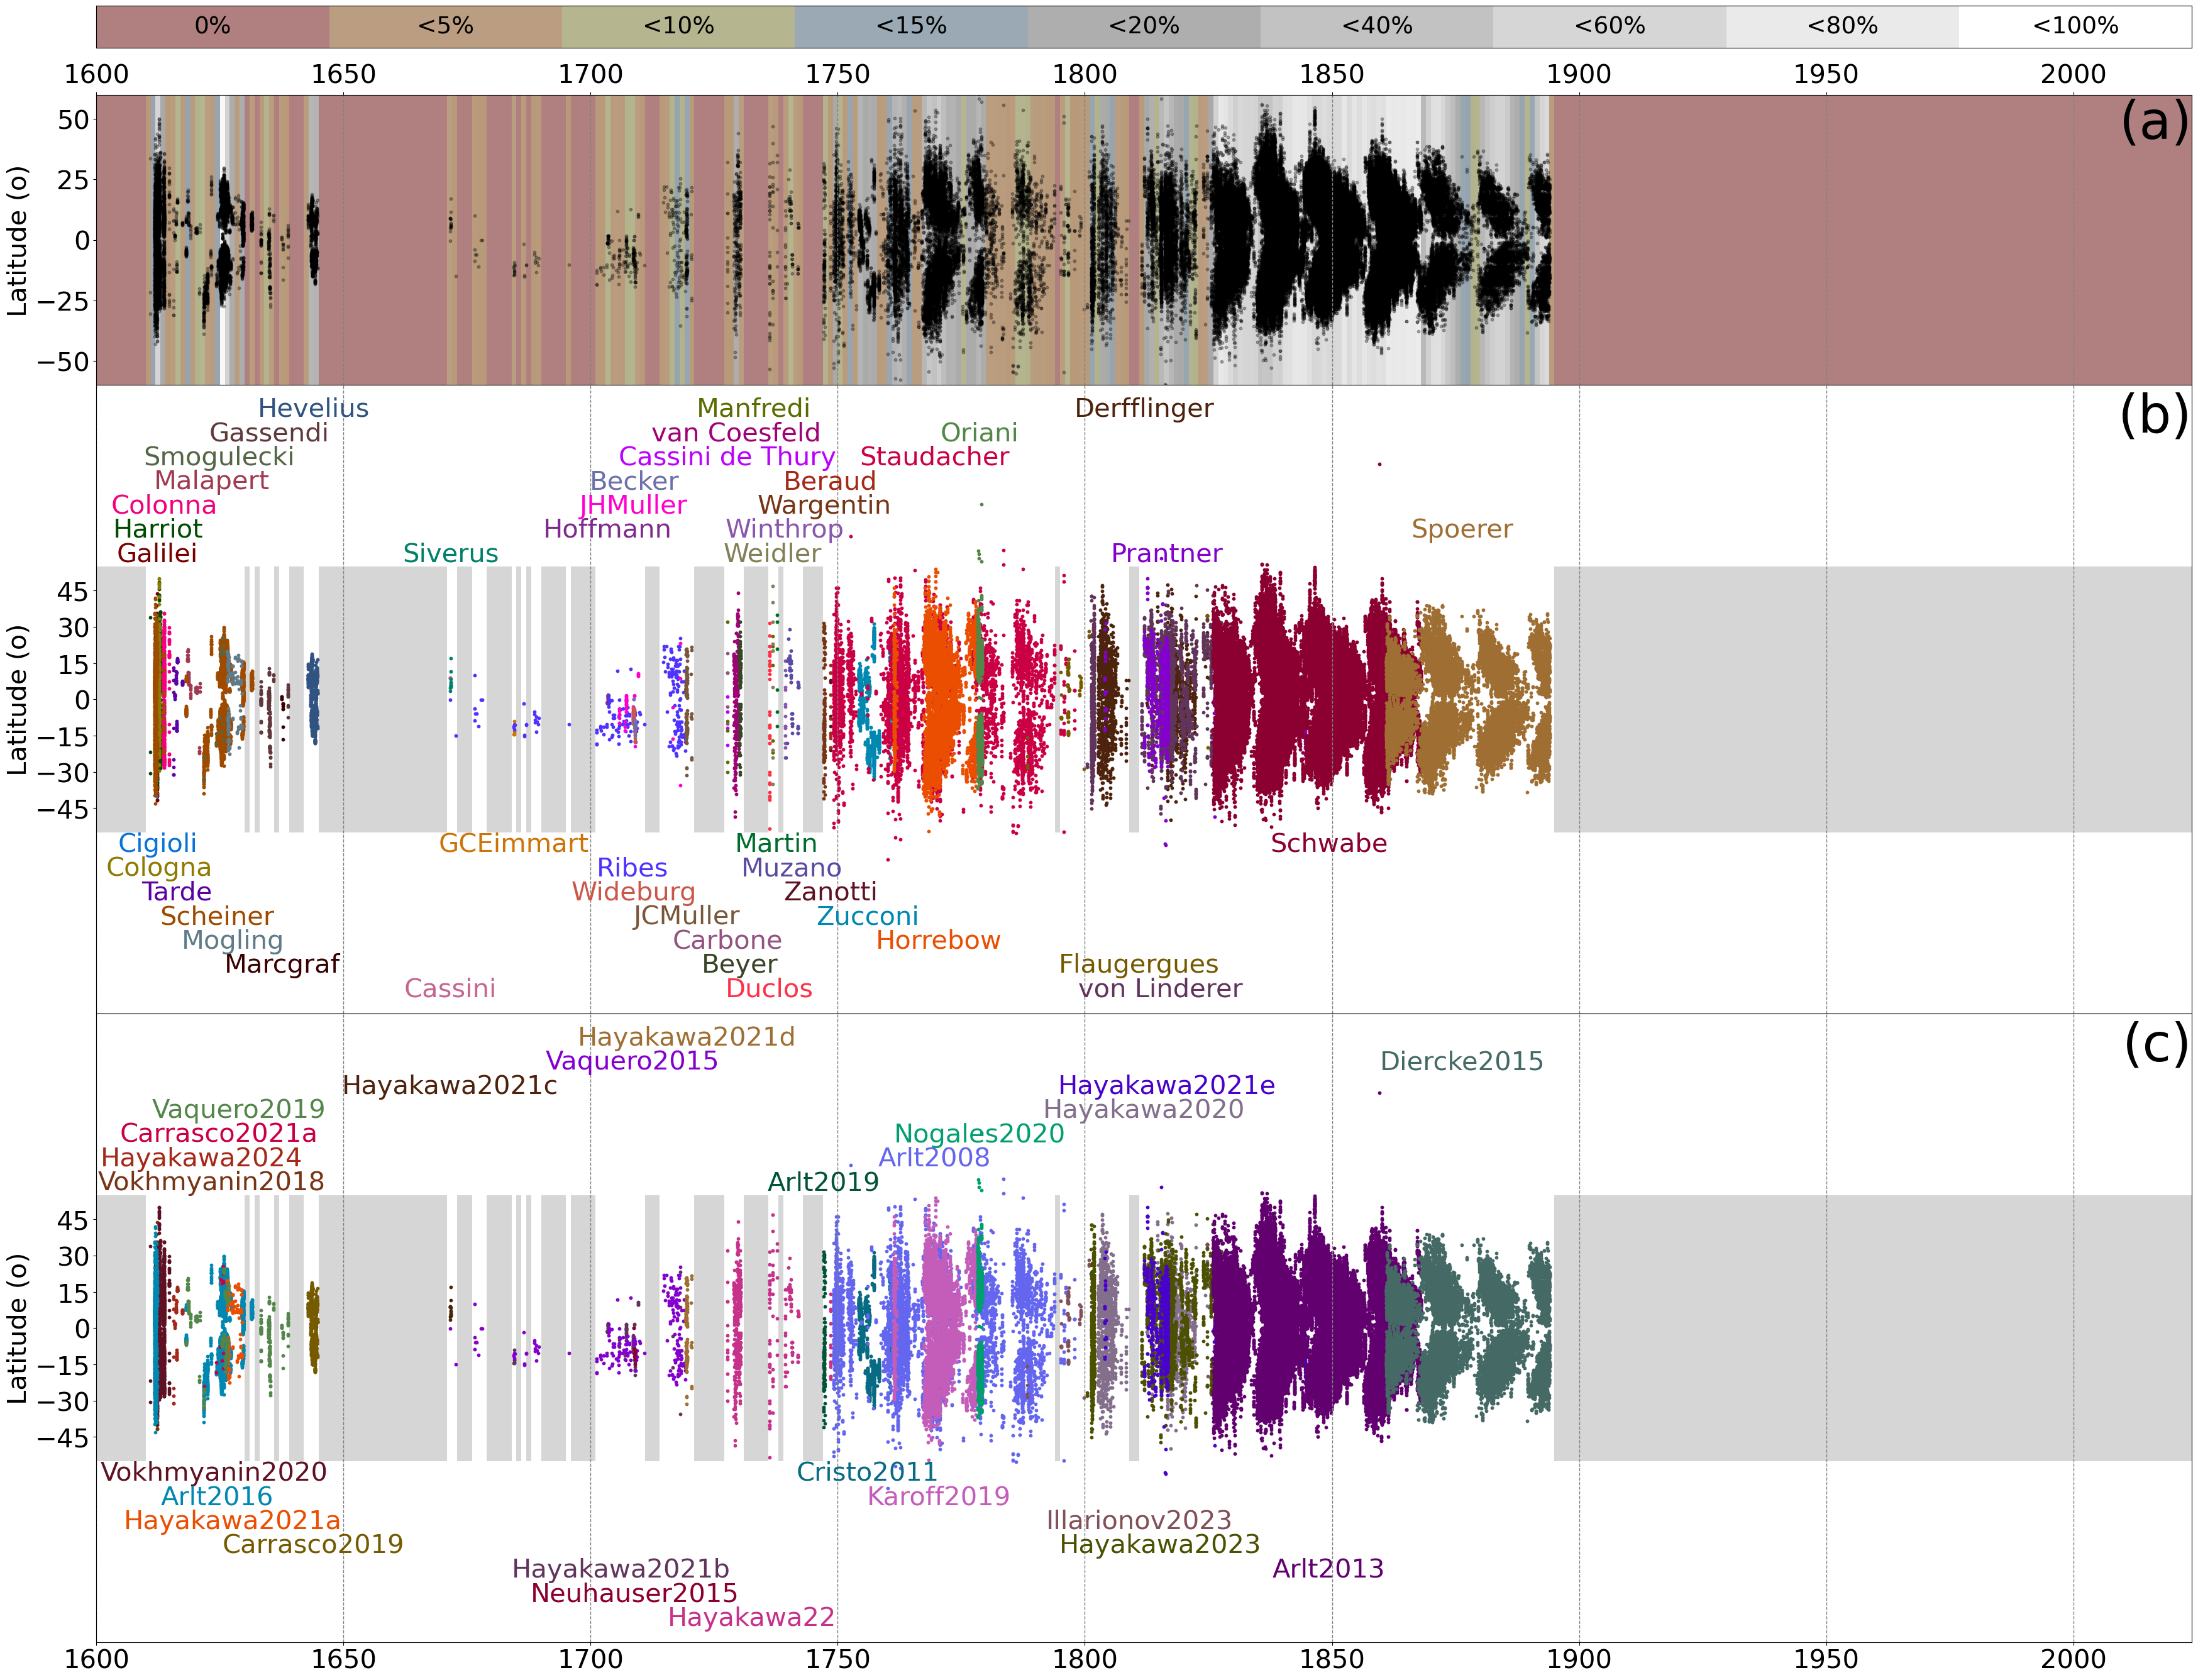

In [37]:
MaskMaxAl = 0.8
latlim = 130

# Size definitions
dpi = 300
pxx = 10000  # Horizontal size of each panel
pxy = 3000  # Vertical size of each panel

nph = 1  # Number of horizontal panels
npv = 3  # Number of vertical panels

# Padding
padv = 300  # Vertical padding in pixels
padv2 = 0  # Vertical padding in pixels between panels
padh = 600  # Horizontal padding in pixels at the edge of the figure
padh2 = 350  # Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = npv * pxy + 2 * padv + (npv - 1) * padv2  # Vertical size of figure in pixels
fszh = nph * pxx + 2 * padh + (nph - 1) * padh2  # Horizontal size of figure in pixels

# Conversion to relative unites
ppxx = pxx / fszh
ppxy = pxy / fszv
ppadv = padv / fszv  # Vertical padding in relative units
ppadv2 = padv2 / fszv  # Vertical padding in relative units
ppadh = padh / fszh  # Horizontal padding the edge of the figure in relative units
ppadh2 = padh2 / fszh  # Horizontal padding between panels in relative units

cmap = cc.cm.glasbey_dark
## Start Figure
Y1 = 1600
Y2 = 2024

fig = plt.figure(figsize=(fszh / dpi, fszv / dpi))

plt.rc("font", **font)

ax2 = fig.add_axes([ppadh, ppadv, ppxx, ppxy])

# Plot transparency mask
for i in np.arange(0, BfObsYr.shape[0]):
    if BfObsCv[i] == 0:
        clr = '0.8'
        ax2.fill(
            [BfObsYr[i], BfObsYr[i], BfObsYr[i] + YRCUM, BfObsYr[i] + YRCUM],
            [-55, 55, 55, -55],
            color=clr,
            alpha=(1 - BfObsCv[i]) * MaskMaxAl,
            zorder=0,
            edgecolor="none",
        )

color_offset = 15
light_lim = 0.5

observers = BflyAllDF.groupby('Source', as_index=False)['FractionalYear'].mean().sort_values('FractionalYear').reset_index(drop=True)
for index, row in observers.iterrows():

    c = cmap.colors[index+color_offset]
    luma = (0.212 * c[0] + 0.701 * c[1] + 0.087 * c[2])

    # search for the next color that is dark enough
    if luma > light_lim:

        while luma > light_lim:
            color_offset = color_offset + 1
            c = cmap.colors[index+color_offset]
            luma = (0.212 * c[0] + 0.701 * c[1] + 0.087 * c[2])


    mask = BflyAllDF['Source']==row['Source']
    ax2.scatter(BflyAllDF.loc[mask, "FractionalYear"], BflyAllDF.loc[mask, "Lat"], MZ, alpha=1, color=c)

    text_lat_pos = np.power(-1, index%2)*(60 + 10*((index//2)%7))
    ax2.text(row['FractionalYear'], text_lat_pos, row['Source'], va="center", ha="center", color=c)

ax2.annotate(
    "(b)", xy=(1, 0.99), xycoords="axes fraction", fontsize=60, va="top", ha="right"
)
ax2.set_xticklabels([])


ax4 = fig.add_axes([ppadh, ppadv + ppxy, ppxx, ppxy*120/(2*latlim)])

# Plot transparency mask
for i in np.arange(0, BfObsYr.shape[0]):
    if BfObsCv[i] == 0:
        clr = color0
    else:
        clr = colorsMsk[(int(np.min([3, np.floor(BfObsCv[i] / 0.05)])))]
    ax4.fill(
        [BfObsYr[i], BfObsYr[i], BfObsYr[i] + YRCUM, BfObsYr[i] + YRCUM],
        [-60, 60, 60, -60],
        color=clr,
        alpha=(1 - BfObsCv[i]) * MaskMaxAl,
        zorder=0,
        edgecolor="none",
    )

ax4.scatter(BflyAllDF["FractionalYear"], BflyAllDF["Lat"], MZ, alpha=0.3, color="k")

ax4.set_xlim(left=Y1, right=Y2)
ax4.set_ylim(top=60, bottom=-60)
ax4.set_ylabel("Latitude (o)")
ax4.grid(color=(0.5, 0.5, 0.5), linestyle="--", linewidth=1, axis="x", which="both")
ax4.xaxis.tick_top()
ax4.xaxis.set_label_position("top")


ax2.set_xlim(left=Y1, right=Y2)
ax2.set_ylim(top=latlim, bottom=-latlim)
ax2.set_yticks(np.arange(-45, 45+15,15))
ax2.set_ylabel("Latitude (o)")
ax2.grid(color=(0.5, 0.5, 0.5), linestyle="--", linewidth=1, axis="x", which="both")

ax4.annotate(
    "(a)", xy=(1, 0.99), xycoords="axes fraction", fontsize=60, va="top", ha="right"
)

# Add Colorbar
axcb3 = fig.add_axes([ppadh, ppadv + ppxy*120/(2*latlim)+ppxy*1.075, ppxx, ppxy/15])


axcb3.set_xticks([])
axcb3.set_yticks([])


axcb3.fill([0, 0, 1, 1], [0, 1, 1, 0], color=color0, alpha=MaskMaxAl, edgecolor="none")
axcb3.annotate(
    "0%",
    xy=(0.5, 0.5),
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=27,
    zorder=3,
)
for i in range(1, 4):
    clr = colorsMsk[i - 1]
    axcb3.fill(
        [i, i + 1, i + 1, i],
        [0, 0, 1, 1],
        color=clr,
        alpha=(1 - i / 20) * MaskMaxAl,
        edgecolor="none",
    )
    axcb3.annotate(
        "<" + str(5 * i) + "%",
        xy=(i + 0.5, 0.5),
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=27,
        zorder=3,
    )

for i in range(1, 6):
    axcb3.fill(
        np.array([i, i + 1, i + 1, i])+3,
        [0, 0, 1, 1],
        color=(0.5, 0.5, 0.5),
        alpha=(1 - i / 5) * MaskMaxAl,
        edgecolor="none",
    )
    axcb3.annotate(
        "<"+str(20 * i) + "%",
        xy=(i + 0.5+3, 0.5),
        horizontalalignment="center",
        verticalalignment="center",
        fontsize=27,
        zorder=3,
    )    

axcb3.set_ylim(bottom=0, top=1)
axcb3.set_xlim(left=0, right=9)

# axcb3.set_xticks([])
# axcb3.set_yticks([])
# axcb3.set_xlabel("Obsv.\nCoverage")


# # Add Colorbar
# axcb2 = fig.add_axes([ppadh + ppxx, ppadv + ppxy, ppadh2, ppxy])
# for i in range(1, 6):
#     axcb2.fill(
#         [0, 0, 1, 1],
#         [i, i + 1, i + 1, i],
#         color=(0.5, 0.5, 0.5),
#         alpha=(1 - i / 5) * MaskMaxAl,
#         edgecolor="none",
#     )
#     axcb2.annotate(
#         str(20 * i) + "%",
#         xy=(0.5, i + 0.5),
#         horizontalalignment="center",
#         verticalalignment="center",
#         fontsize=27,
#         zorder=3,
#     )

# axcb2.set_ylim(bottom=1, top=6)
# axcb2.set_xlim(left=0, right=1)

# axcb2.set_xticks([])
# axcb2.set_yticks([])

ax3 = fig.add_axes([ppadh, ppadv-ppxy, ppxx, ppxy])

# Plot transparency mask
for i in np.arange(0, BfObsYr.shape[0]):
    if BfObsCv[i] == 0:
        clr = '0.8'
        ax3.fill(
            [BfObsYr[i], BfObsYr[i], BfObsYr[i] + YRCUM, BfObsYr[i] + YRCUM],
            [-55, 55, 55, -55],
            color=clr,
            alpha=(1 - BfObsCv[i]) * MaskMaxAl,
            zorder=0,
            edgecolor="none",
        )
color_offset = color_offset+25
observers = BflyAllDF.groupby('Origin', as_index=False)['FractionalYear'].mean().sort_values('FractionalYear').reset_index(drop=True)
for index, row in observers.iterrows():

    c = cmap.colors[index+color_offset]
    luma = (0.212 * c[0] + 0.701 * c[1] + 0.087 * c[2])

    # search for the next color that is dark enough
    if luma > light_lim:

        while luma > light_lim:
            color_offset = color_offset + 1
            c = cmap.colors[index+color_offset]
            luma = (0.212 * c[0] + 0.701 * c[1] + 0.087 * c[2])


    mask = BflyAllDF['Origin']==row['Origin']
    ax3.scatter(BflyAllDF.loc[mask, "FractionalYear"], BflyAllDF.loc[mask, "Lat"], MZ, alpha=1, color=c)

    text_lat_pos = np.power(-1, index%2)*(60 + 10*((index//2)%7))
    offset=0
    if 'Vokhmyanin' in row['Origin']:
        offset=11
    if row['Origin'] == 'Hayakawa2024':
        offset=5
    ax3.text(row['FractionalYear']+offset, text_lat_pos, row['Origin'], va="center", ha="center", color=c)

ax3.annotate(
    "(c)", xy=(1, 0.99), xycoords="axes fraction", fontsize=60, va="top", ha="right"
)

ax3.set_xlim(left=Y1, right=Y2)
ax3.set_ylim(top=latlim, bottom=-latlim)
ax3.set_yticks(np.arange(-45, 45+15,15))
ax3.set_ylabel("Latitude (o)")
ax3.grid(color=(0.5, 0.5, 0.5), linestyle="--", linewidth=1, axis="x", which="both")


# fig.savefig('F3_Bfly_GN_Coverage.png',dpi=figDPI)

In [38]:
BflyAllDF.to_csv(OUTPUT_FOLDER + "1_Bfly400.csv", index=False)